# STATISTICAL ANALYSIS OF WHOLE DATA

## Table Content <a class="anchor" id="content"></a>
* [Ön hazırlık (Preprocessing)](#onhazirlik)
* [Normal Dağılım](#normal)
* [Normal Dağılıma Uygunluk Testleri](#uygunluk)
* [Normal Dağılmayan Verileri Normale Dönüştürme](#donusturme)
* [Varyans Analizi - ANOVA](#varyans)
* [Korelasyon Analizi](#korelasyon)
* [Effect Size](#effect)

## Ön hazırlık (Preprocessing) <a class="anchor" id="onhazirlik"></a>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.special
import scipy.stats as stats
from scipy.stats import skew, kurtosis, shapiro

# import hvplot.pandas

# pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_whole = pd.read_excel("tum_data.xlsx")
df = df_whole.copy()
df.head()

Order Date Marketplace  \
0  2017-07-21 14:34:00     PERGAMO   
1  2017-09-05 12:05:31     PERGAMO   
2  2017-09-10 12:53:04     PERGAMO   
3  2017-09-10 12:53:04     PERGAMO   
4  2017-09-10 12:53:04     PERGAMO   

                                           Item Name       Category  \
0  COLMENEROS DE GRANADA KASTANIEN-BLUTEN-HONIG 4...  BAL CESITLERI   
1  KALTGEPRESSTES EXTRA NATIVES OLIVENOL ROYAL CA...     ZEYTINYAGI   
2                          BIO HONIG LAVANDEL 450 GR  BAL CESITLERI   
3                     BIO HONIG ORANGENBLUTEN 450 GR  BAL CESITLERI   
4                           BIO HONIG ZITRONE 450 GR  BAL CESITLERI   

  Subcategory  Quantity  Total  
0       HONIG      1.00  11.68  
1  ZEYTINYAGI      1.00  20.56  
2       HONIG      1.00   8.40  
3       HONIG      1.00   8.40  
4       HONIG      1.00   8.97

In [3]:
df.shape

(60115, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60115 entries, 0 to 60114
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order Date   60115 non-null  object 
 1   Marketplace  60115 non-null  object 
 2   Item Name    60115 non-null  object 
 3   Category     60115 non-null  object 
 4   Subcategory  60115 non-null  object 
 5   Quantity     60115 non-null  float64
 6   Total        60115 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [5]:
df.Quantity.mean()

1.1886200282791317

In [6]:
df.select_dtypes(include="float").columns

Index(['Quantity', 'Total'], dtype='object')

In [7]:
df.columns

Index(['Order Date', 'Marketplace', 'Item Name', 'Category', 'Subcategory',
       'Quantity', 'Total'],
      dtype='object')

In [8]:
df.describe(include="all").T

count unique                       top   freq  mean   std  min  \
Order Date     60115   4392                2021-04-09    760   NaN   NaN  NaN   
Marketplace    60115     11                    Amazon  18072   NaN   NaN  NaN   
Item Name      60115   4716  FERSAN NAR EKSISI 330 ML   2448   NaN   NaN  NaN   
Category       60115     20                  CEREZLER  13569   NaN   NaN  NaN   
Subcategory    60115     42                     SIRUP   4918   NaN   NaN  NaN   
Quantity    60115.00    NaN                       NaN    NaN  1.19  0.65 0.20   
Total       60115.00    NaN                       NaN    NaN 14.23 12.55 0.04   

             25%   50%   75%    max  
Order Date   NaN   NaN   NaN    NaN  
Marketplace  NaN   NaN   NaN    NaN  
Item Name    NaN   NaN   NaN    NaN  
Category     NaN   NaN   NaN    NaN  
Subcategory  NaN   NaN   NaN    NaN  
Quantity    1.00  1.00  1.00  20.00  
Total       7.47 11.21 17.35 658.95

In [9]:
df.describe().T

count  mean   std  min  25%   50%   75%    max
Quantity 60115.00  1.19  0.65 0.20 1.00  1.00  1.00  20.00
Total    60115.00 14.23 12.55 0.04 7.47 11.21 17.35 658.95

In [10]:
df["Item Name"].nunique()

4716

In [11]:
df.duplicated().sum()

15354

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
from datetime import datetime
#The day of the week with Monday=0, Sunday=6.
df["Day_of_Week"] = pd.DatetimeIndex(df['Order Date']).weekday
df['Month_of_Year'] = pd.DatetimeIndex(df['Order Date']).month

In [14]:
df.set_index('Order Date', inplace = True)

In [15]:
days = {0:1,1:2,2:3,3:4,4:5,5:6,6:7}
df['Day_of_Week'] = df['Day_of_Week'].map(days)

In [16]:
df.describe().T

count  mean   std  min  25%   50%   75%    max
Quantity      44761.00  1.24  0.73 0.20 1.00  1.00  1.00  20.00
Total         44761.00 14.14 13.63 0.04 6.54 10.79 17.66 658.95
Day_of_Week   44761.00  3.67  1.99 1.00 2.00  4.00  5.00   7.00
Month_of_Year 44761.00  5.85  3.37 1.00 3.00  5.00  9.00  12.00

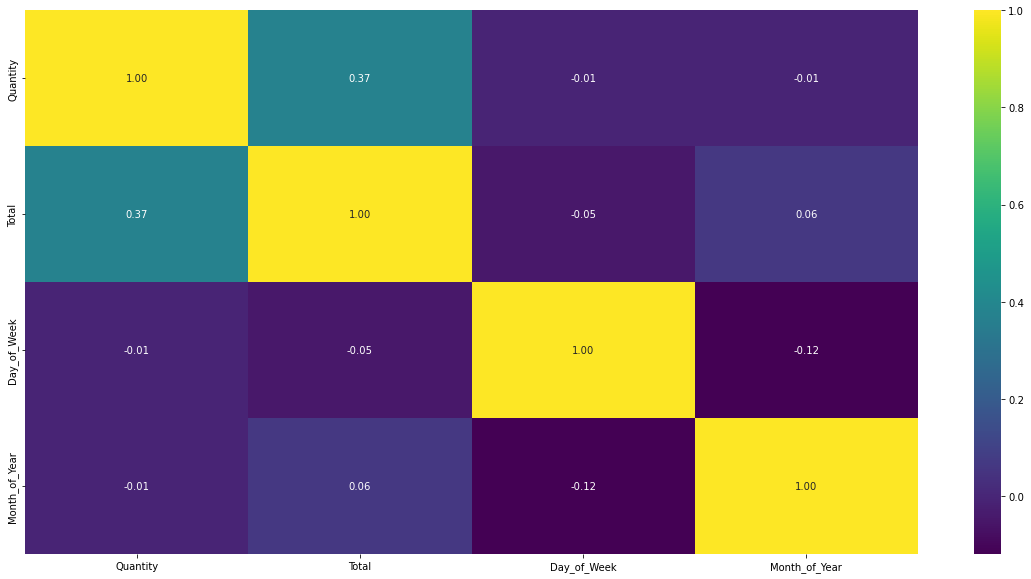

In [17]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "viridis");

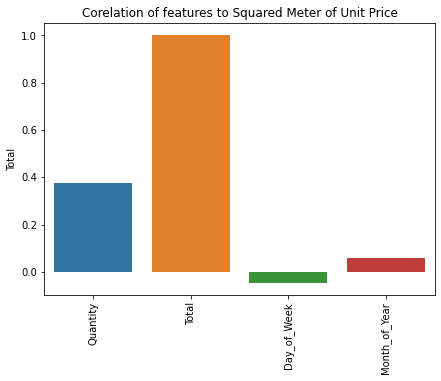

In [18]:
corr = df.corr().Total
plt.figure(figsize = (7,5))
sns.barplot(x = corr.index, y = corr)
plt.title("Corelation of features to Squared Meter of Unit Price")
plt.xticks(rotation=90);

In [19]:
corr = df.corr().Total
corr[np.argsort(corr, axis= 0)[:-1]]

Day_of_Week     -0.05
Month_of_Year    0.06
Quantity         0.37
Name: Total, dtype: float64

<AxesSubplot:>

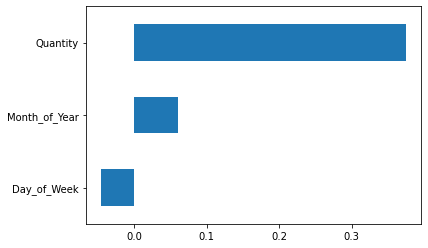

In [20]:
df.corr()['Total'].drop('Total').sort_values().plot.barh()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44761 entries, 2017-07-21 14:34:00 to 2022-03-03 00:00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Marketplace    44761 non-null  object 
 1   Item Name      44761 non-null  object 
 2   Category       44761 non-null  object 
 3   Subcategory    44761 non-null  object 
 4   Quantity       44761 non-null  float64
 5   Total          44761 non-null  float64
 6   Day_of_Week    44761 non-null  int64  
 7   Month_of_Year  44761 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [22]:
# sns.pairplot(df, corner=True);

In [23]:
def check_dist(df, var):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 4, 1)
    sns.histplot(x=var, data=df)
    plt.title("histplot")
    plt.subplot(1, 4, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.subplot(1, 4, 3)    
    sns.scatterplot(x = df[var], y = "Total", data = df)
    plt.title("scatterplot")
    plt.subplot(1, 4, 4)     
    sns.regplot(x = df[var], y = "Total", data = df)
    plt.title("regplot")
    plt.show()

In [24]:
df.columns

Index(['Marketplace', 'Item Name', 'Category', 'Subcategory', 'Quantity',
       'Total', 'Day_of_Week', 'Month_of_Year'],
      dtype='object')

In [25]:
# for col in df[["Quantity", "Total", "Day_of_Week", "Month_of_Year"]].columns:
#     check_dist(df, col)

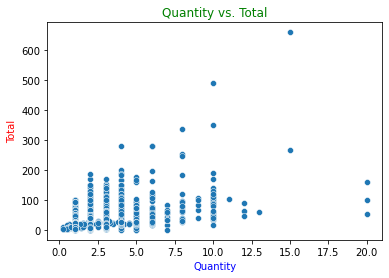

In [26]:
sns.scatterplot(x="Quantity", y= "Total", data=df)
plt.xlabel("Quantity", c='b')
plt.ylabel("Total", c= 'r')
plt.title('Quantity vs. Total', c='g')
plt.show()

### Outlier Detection

In [27]:
dff = df.copy()
dff.reset_index(inplace = True)

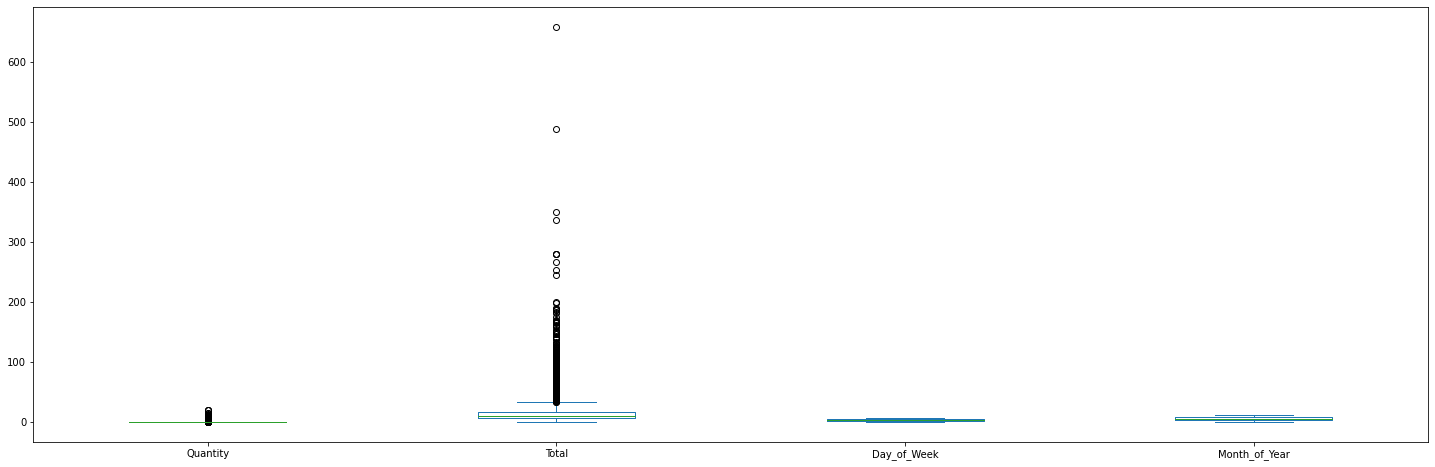

In [28]:
dff.plot(kind='box', return_type='axes', figsize=(25,8))
plt.show()

In [29]:
def outlier_detect_function(col):
    Q1 = np.percentile(dff[col], 25)
    Q3 = np.percentile(dff[col], 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - IQR*1.5
    upper_limit = Q3 + IQR*1.5
    lower_outlier = (dff[col] < (lower_limit)) # outliers that under the lower limit
    upper_outlier = (dff[col] > (upper_limit)) # outliers that above the upper limit
    all_outlier = (dff[col] > (upper_limit)) | (dff[col] > (upper_limit)) # all outliers
    print(f"********* ({col}) *********")
    print("Total Object Count \t: ", dff[col].shape[0])
    print("Lower Limit \t\t: " + "%.2f" % (lower_limit))
    print("Upper Limit \t\t: " + "%.2f" % (upper_limit))
    print("Total Lower Outliers \t: ", dff[lower_outlier].shape[0])
    print("Total Upper Outliers \t: ", dff[upper_outlier].shape[0])
    print("Total Outliers \t\t: ", dff[lower_outlier].shape[0] + dff[upper_outlier].shape[0])
    print("") 

In [30]:
col = "Total"
outlier_detect_function(col)

********* (Total) *********
Total Object Count 	:  44761
Lower Limit 		: -10.14
Upper Limit 		: 34.35
Total Lower Outliers 	:  0
Total Upper Outliers 	:  2402
Total Outliers 		:  2402



In [31]:
Q1 = np.percentile(dff[col], 25)
Q3 = np.percentile(dff[col], 75)
IQR = Q3 - Q1
lower_limit = Q1 - IQR*1.5
upper_limit = Q3 + IQR*1.5
all_outlier = (dff[col] > (upper_limit)) | (dff[col] > (upper_limit)) # all outliers
dff[all_outlier]

Order Date Marketplace  \
26829  2022-04-15 00:00:00        Ebay   
26851  2022-04-26 00:00:00    Kaufland   
26882  2021-07-29 00:00:00      Amazon   
26958  2021-10-05 00:00:00  Wocommerce   
26959  2021-11-07 00:00:00        Ebay   
...                    ...         ...   
44578  2021-08-24 00:00:00      Amazon   
44646  2021-07-12 00:00:00  Wocommerce   
44735  2021-09-15 00:00:00      Amazon   
44738  2021-10-07 00:00:00      Amazon   
44740  2021-10-11 00:00:00      Amazon   

                                               Item Name  \
26829   NATURBELASSENE HASELNUSSE/ GANZE HASELNUSS KE...   
26851  JOHANNISBROT EXTRAKT - KECIBOYNUZU OZU /VEGAN/...   
26882  JOHANNISBROTSIRUP /KECI BOYNUZU PEKMEZI / VEGA...   
26958  KAKI GETROCKNETE  NATURAL OHNE ZUCKER TROCKENF...   
26959  KAKI GETROCKNETE  NATURAL OHNE ZUCKER TROCKENF...   
...                                                  ...   
44578                  3 X SERA - JOHANNISBROTSIRUP 680G   
44646  HAUSGEMACHTE WEIDORNESSIG  VINEGAR / ZEYTIN AN...   
44735  JOHANNISBROT EXTRAKT - KECIBOYNUZU OZU /VEGAN/...   
44738  JOHANNISBROT EXTRAKT - KECIBOYNUZU OZU /VEGAN/...   
44740  JOHANNISBROT EXTRAKT - KECIBOYNUZU OZU /VEGAN/...   

                           Category                   Subcategory  Quantity  \
26829                      CEREZLER                     HASELNUSS      1.00   
26851              RECEL KREMA EZME                         RECEL      1.00   
26882    PEKMEZ-TAHIN-TAHIN HELVASI    PEKMEZ-TAHIN-TAHIN HELVASI      4.00   
26958         SEBZE VE MEYVE KURUSU         SEBZE VE MEYVE KURUSU      2.00   
26959         SEBZE VE MEYVE KURUSU         SEBZE VE MEYVE KURUSU      2.00   
...                             ...                           ...       ...   
44578    PEKMEZ-TAHIN-TAHIN HELVASI    PEKMEZ-TAHIN-TAHIN HELVASI      2.00   
44646  MUTFAK ICIN YEMEKLIK URUNLER  MUTFAK ICIN YEMEKLIK URUNLER     10.00   
44735              RECEL KREMA EZME                         RECEL      2.00   
44738              RECEL KREMA EZME                         RECEL      3.00   
44740              RECEL KREMA EZME                         RECEL      2.00   

       Total  Day_of_Week  Month_of_Year  
26829  44.38            5              4  
26851  46.60            2              4  
26882  39.96            4              7  
26958  37.86            2             10  
26959  41.38            7             11  
...      ...          ...            ...  
44578  39.84            2              8  
44646  63.50            1              7  
44735  39.98            3              9  
44738  59.97            4             10  
44740  39.98            1             10  

[2402 rows x 9 columns]

In [32]:
dff[all_outlier].Marketplace.value_counts()

Amazon        2022
Wocommerce     238
Ebay           100
Kaufland        26
other           16
Name: Marketplace, dtype: int64

In [33]:
dff.dtypes

Order Date        object
Marketplace       object
Item Name         object
Category          object
Subcategory       object
Quantity         float64
Total            float64
Day_of_Week        int64
Month_of_Year      int64
dtype: object

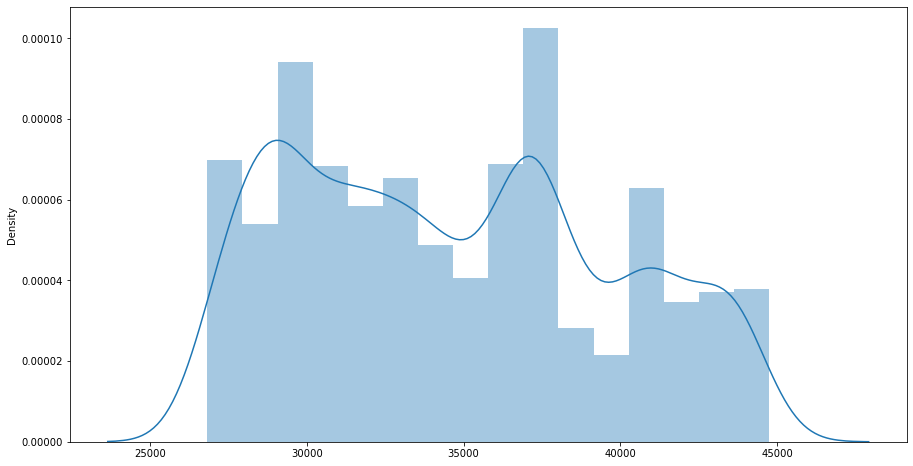

In [34]:
plt.figure(figsize=(15,8))
ax = sns.distplot(dff[all_outlier].index)

In [35]:
dff_outlier_detected = dff.drop(dff[all_outlier].index)

dff_outlier_detected.to_csv("tumdata_df_outlier_detected.csv") 

In [36]:
dff.drop(dff[all_outlier].index, inplace = True)

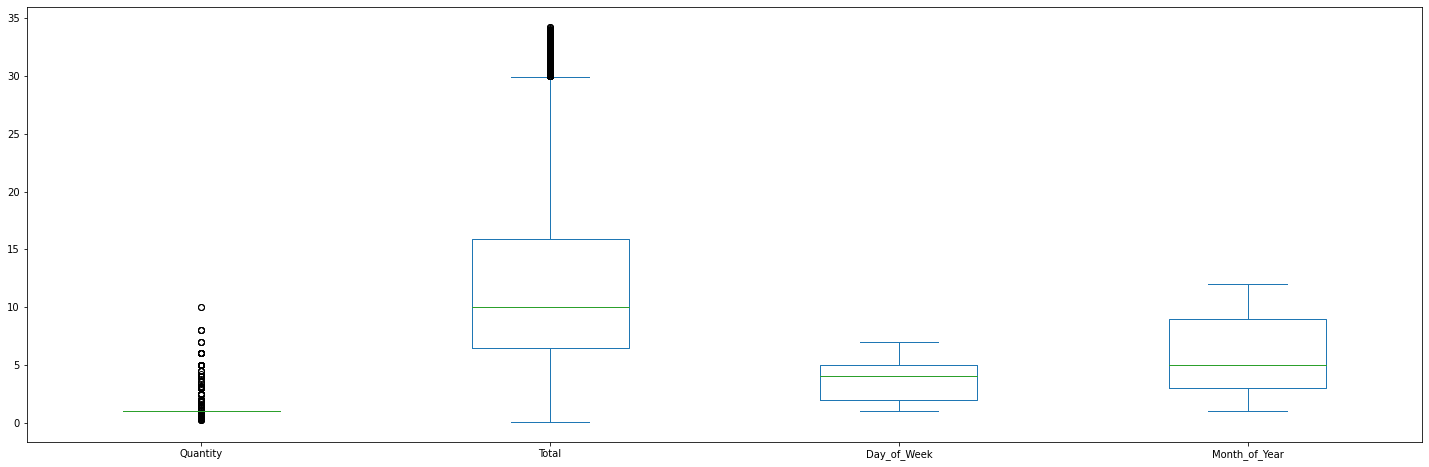

In [37]:
dff.plot(kind='box', return_type='axes', figsize=(25,8))
plt.show()

### Skewness

In [38]:
# print skewness of each attribute
for (colName, colData) in dff[["Quantity", "Total", "Day_of_Week", "Month_of_Year"]].iteritems():
    print("Feature name: {0}, Skewness: {1}".format(colName, stats.skew(colData)))

Feature name: Quantity, Skewness: 3.930620819535515
Feature name: Total, Skewness: 0.9262711971201816
Feature name: Day_of_Week, Skewness: 0.18787943552954048
Feature name: Month_of_Year, Skewness: 0.4336533578500487


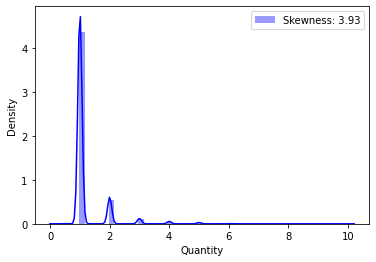

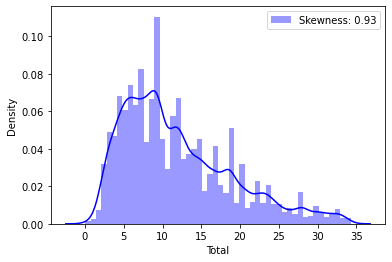

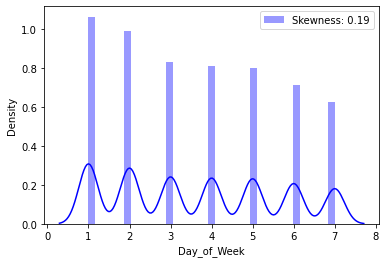

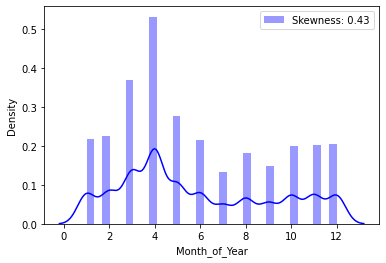

In [39]:
for j in dff[["Quantity", "Total", "Day_of_Week", "Month_of_Year"]].columns:
    g = sns.distplot(dff[j], color= "b", label= "Skewness: %.2f"%(dff[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

### Kurtosis

In [40]:
# print kurtosis of each attribute
for (colName, colData) in dff[["Quantity", "Total", "Day_of_Week", "Month_of_Year"]].iteritems():
    print("Feature name: {0}, Kurtosis: {1}".format(colName, stats.kurtosis(colData)))

Feature name: Quantity, Kurtosis: 20.22268642146085
Feature name: Total, Kurtosis: 0.30249677733117286
Feature name: Day_of_Week, Kurtosis: -1.214996697855671
Feature name: Month_of_Year, Kurtosis: -1.0358206125597162


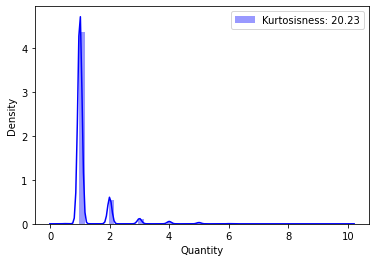

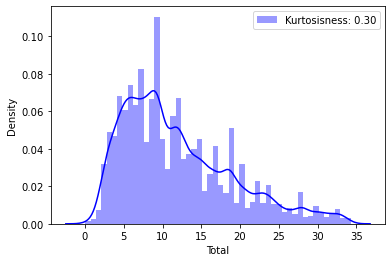

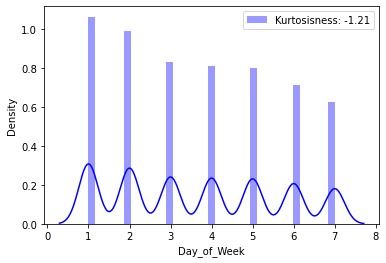

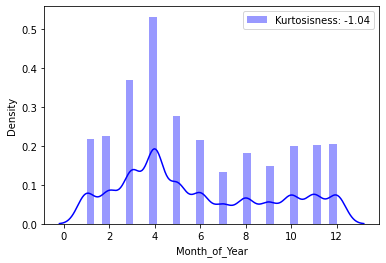

In [41]:
for j in dff[["Quantity", "Total", "Day_of_Week", "Month_of_Year"]].columns:
    g = sns.distplot(dff[j], color= "b", label= "Kurtosisness: %.2f"%(dff[j].kurtosis()))
    g = g.legend(loc= "best")
    plt.show()

## Normal Dağılım <a class="anchor" id="normal"></a>

* Normal dağılım, istatistik ve veri bilimi için önemli bir yere sahiptir. Normallik varsayımı, birçok istatistiksel sürecin temelini oluşturur. Günlük hayattaki birçok tesadüfi olay normal dağılıma uyar.
* Merkezi Limit Teoremi ile popülasyonun dağılımı ne olursa olsun, yeterli büyüklükte örneklemler oluşturulduğunda, örneklemlerin ortalamalarının dağılımı normal dağılıma sahip olacaktır. Bu sayede küçük örneklemler ile popülasyonun tamamı hakkında çıkarımlar yapmak mümkündür.
* Parametrik hipotez testleri verinin normal dağılıma sahip olduğu varsayımı ile çalışır.
* Lineer ve non-lineer regresyon, kalıntıların (residuals) normal dağılıma sahip olduğunu varsayar.
* Least Square-based regression, Gaussian Naive Bayes Classifier, Linear and Quadratic Discriminant Analyses gibi bazı makine öğrenmesi modelleri verinin normal dağılıma sahip olduğunu varsayar.
* Normal dağılım, istatistiksel hesaplamaları daha kolaylaştırır.

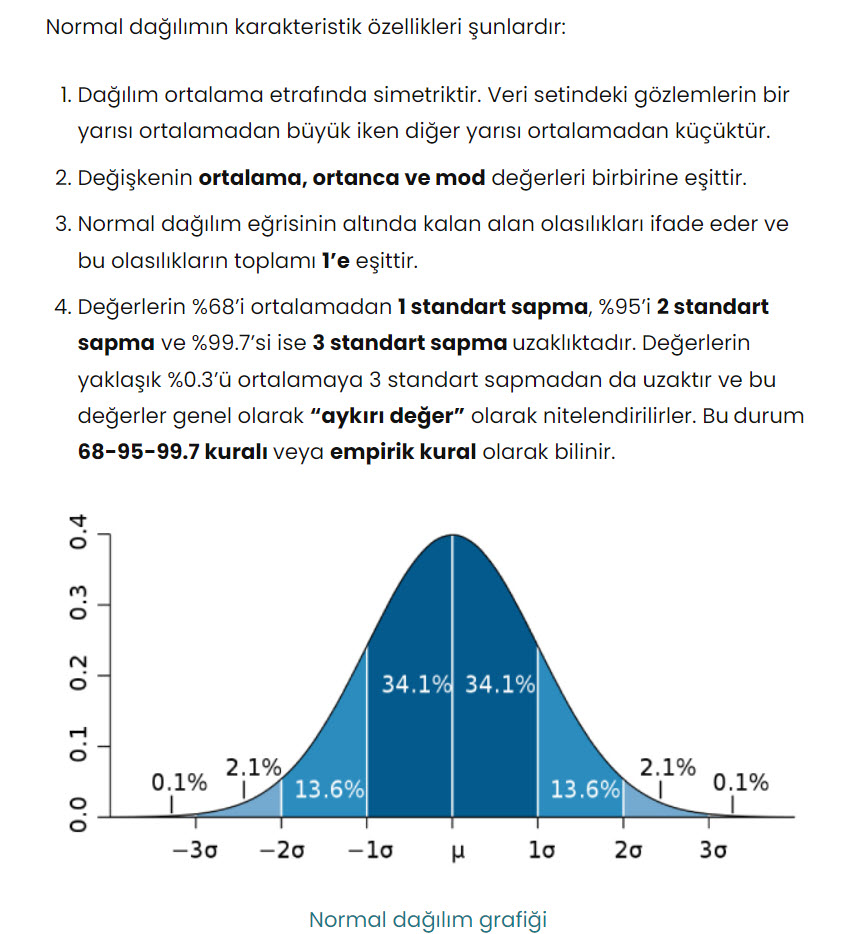

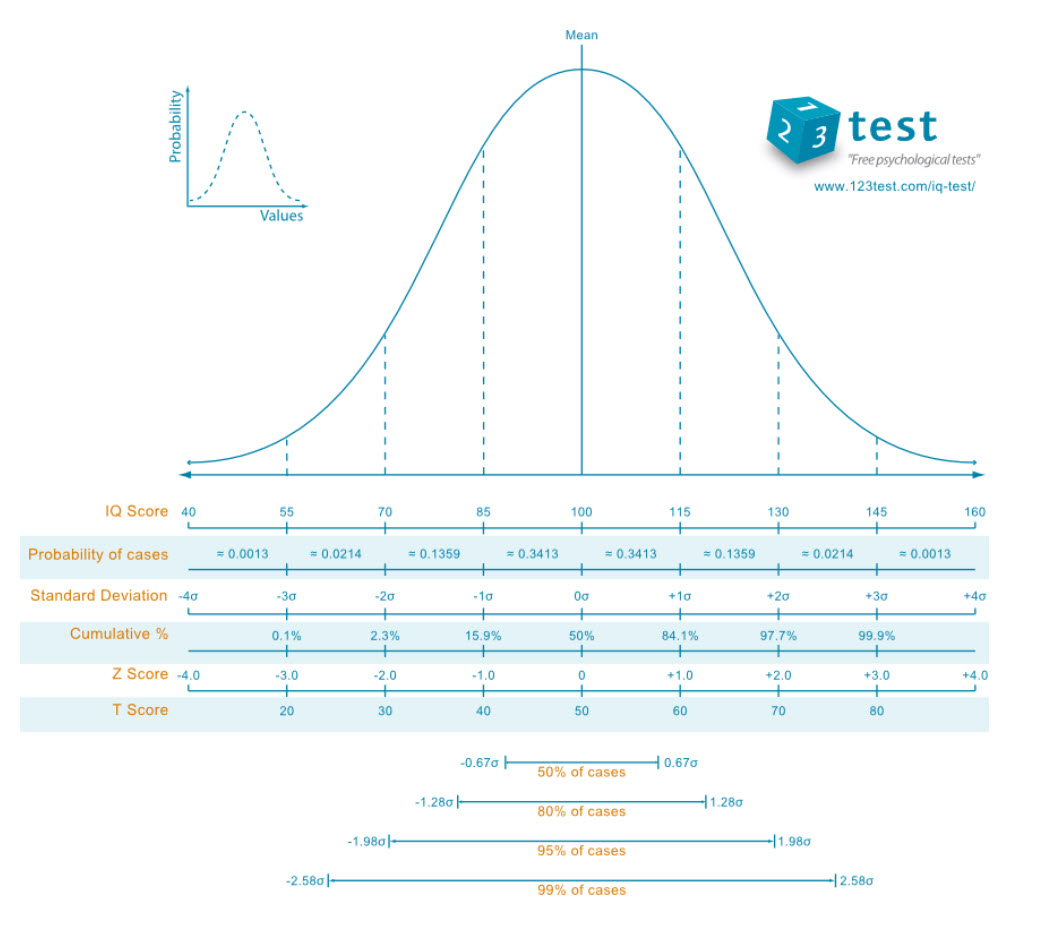

### Verinin dağılımı
* Her değişkenin değerleri bir dağılım oluşturur. Dağılımın şeklini çarpıklık (skewness) ve basıklık (kurtosis) değerleri ile karakterize edilebilir.

### Çarpıklık (Skewness)

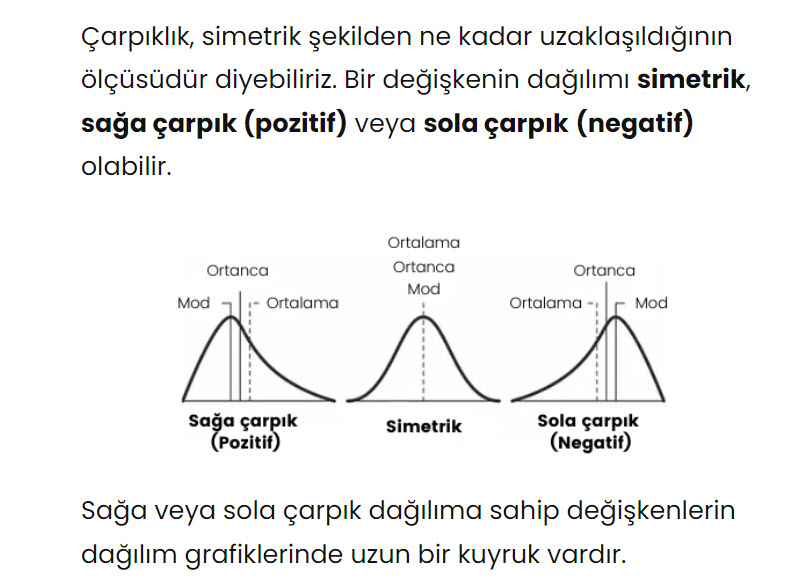

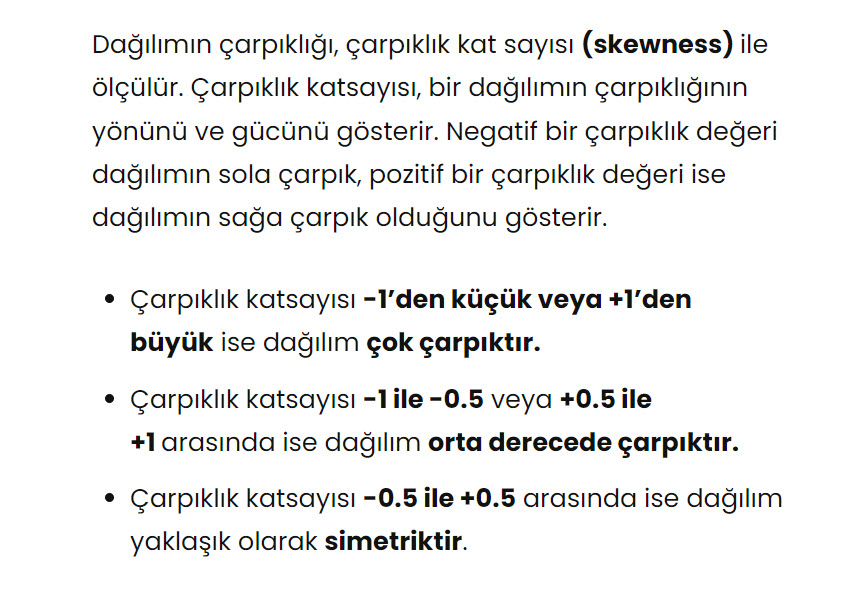

### Basıklık (Kurtosis)

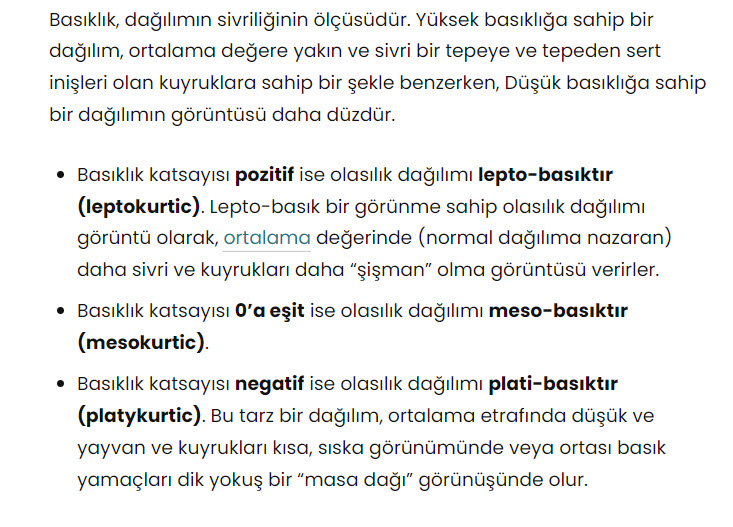

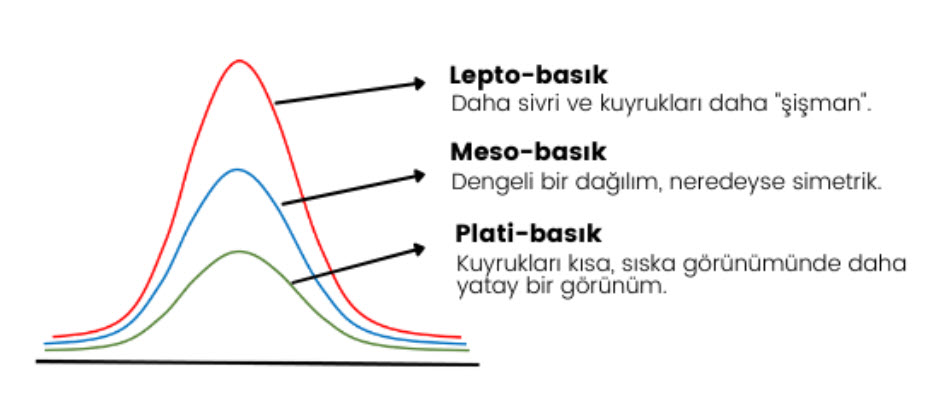

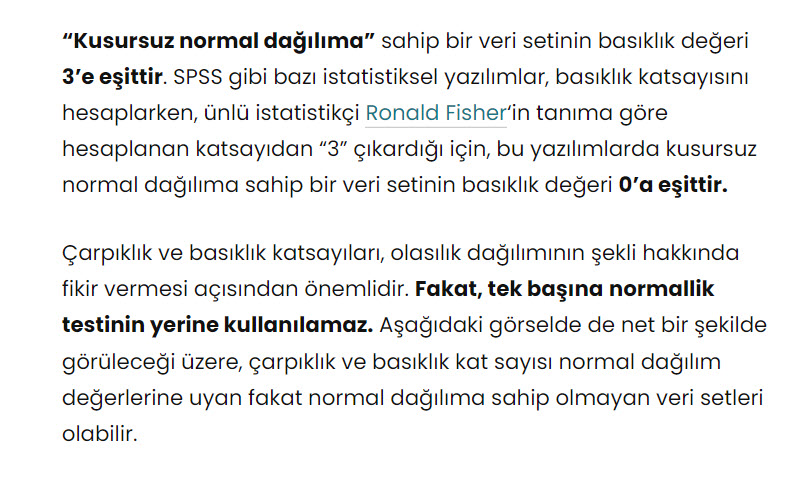

## Normal Dağılıma Uygunluk Testleri <a class="anchor" id="uygunluk"></a>

### Grafik yöntemler

#### 1- Histogram

#### 2- Kernel yoğunluk grafiği (KDEPlot)

* Histograma kıyasla KDEPlot grafiğinde dağılımın şeklini daha net bir şekilde görebiliyoruz.

#### 3- Kutu grafiği (Boxplot)

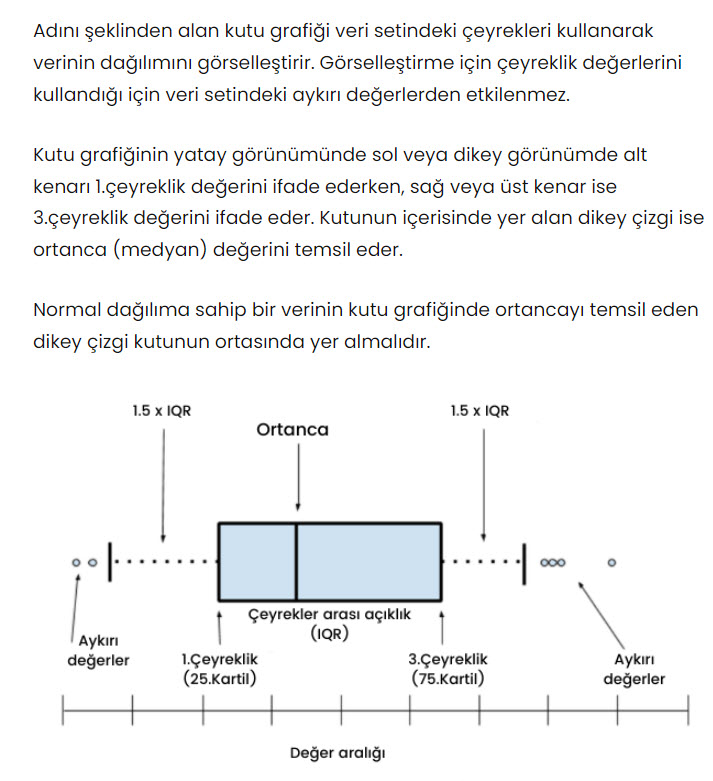

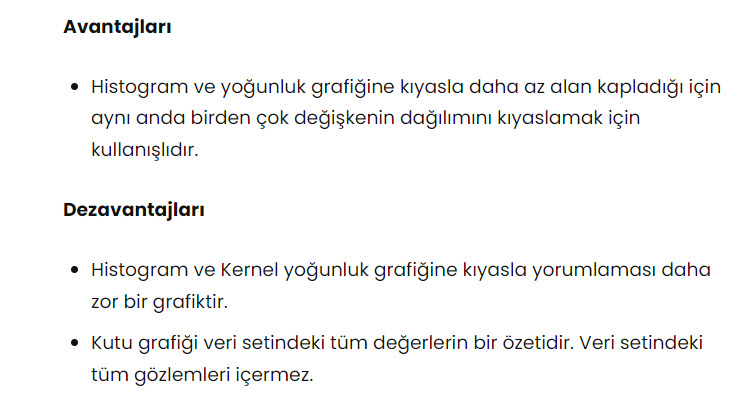

#### 4- Q-Q grafiği (Quantile-Quantile plot)

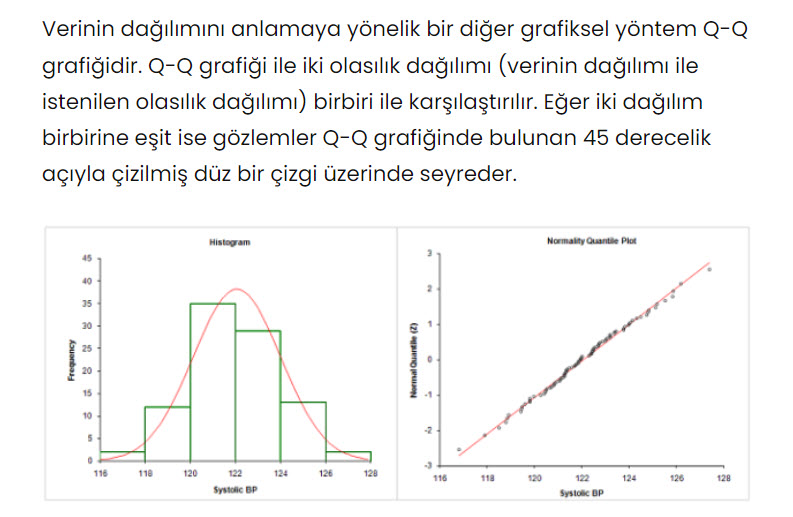

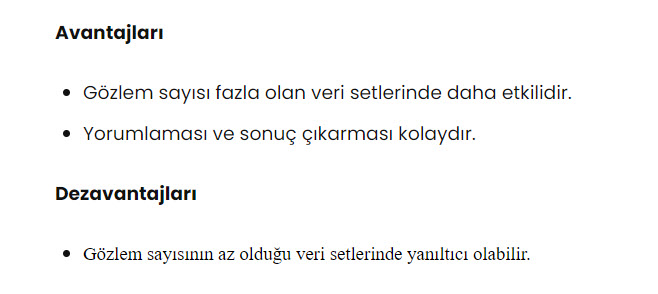

#### 5-Violin Plot

* Violin (keman) grafiği verilerin dağılımını ve olasılık yoğunluğunu görselleştirmek için en efektif yöntemlerden birisidir.
* Violin grafiği box plot ve KDE’nin kombinasyonundan doğmuştur. Box plot, görsel basitliği ve verilerdeki değerlerin nasıl dağıldığına ilişkin önemli ayrıntıları gizleme eğiliminde olduğundan, değişken değerlerinin dağılımının gösterilmesinde sınırları bulunmaktadır.
* Yukarıda şekilde, violin grafiğinin anatomisi yansıtılmıştır. Görüldüğü üzere hem box plotta yer alan quartile mantığını hem de KDE’de gelen yoğunlaşmayı bir arada göstererek değişkenin dağılımına yönelik oldukça fazla bilgi barındırabilmektedir.

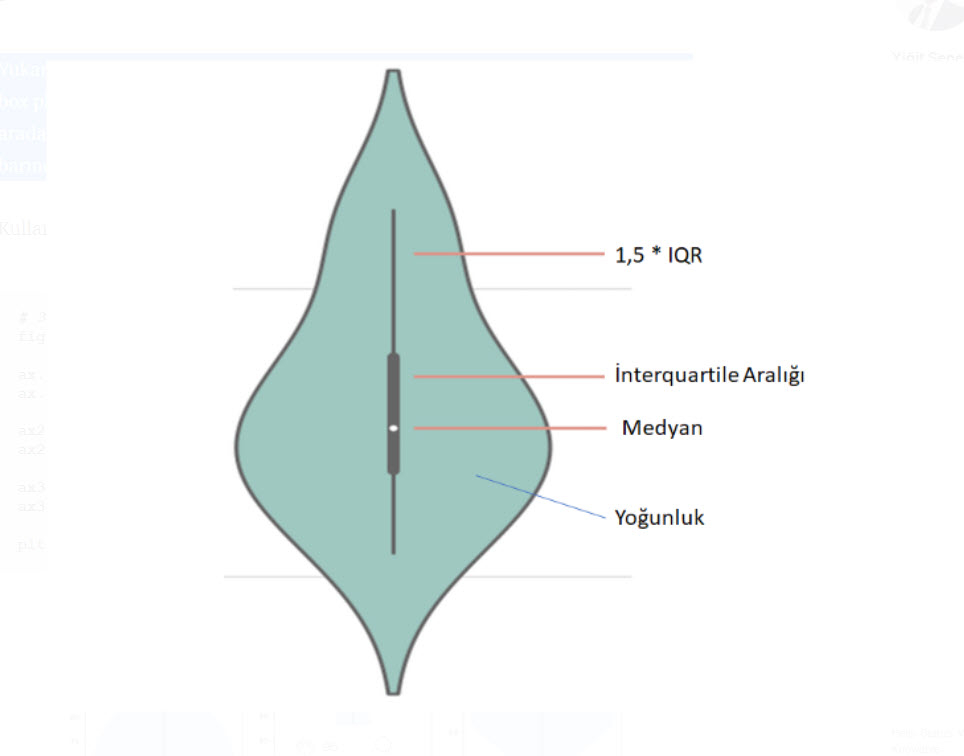

#### Kümülatif Gösterim

In [42]:
def check_dist(df, var):
    plt.figure(figsize=(20,5))
    
    plt.subplot(1, 5, 1)
    sns.histplot(x=var, data=df)
    plt.title("histplot")
    
    plt.subplot(1, 5, 2)
    sns.kdeplot(df[var])
    plt.title("kdebplot")
    
    plt.subplot(1, 5, 3)    
    sns.boxplot(x = df[var], data=df)
    plt.title("boxplot")
    
    plt.subplot(1, 5, 4)     
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.xlabel(var)
    
    plt.subplot(1, 5, 5)     
    plt.violinplot(df[var])
    plt.title("violinplot")
    plt.xlabel(var)
    
    plt.show()

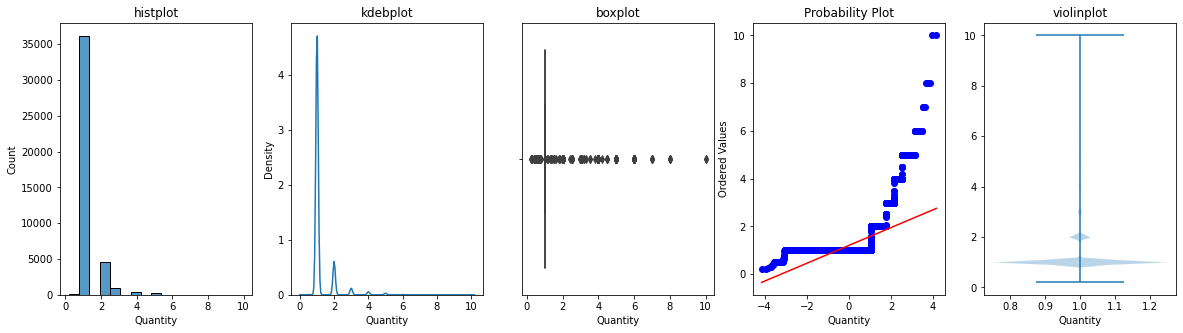

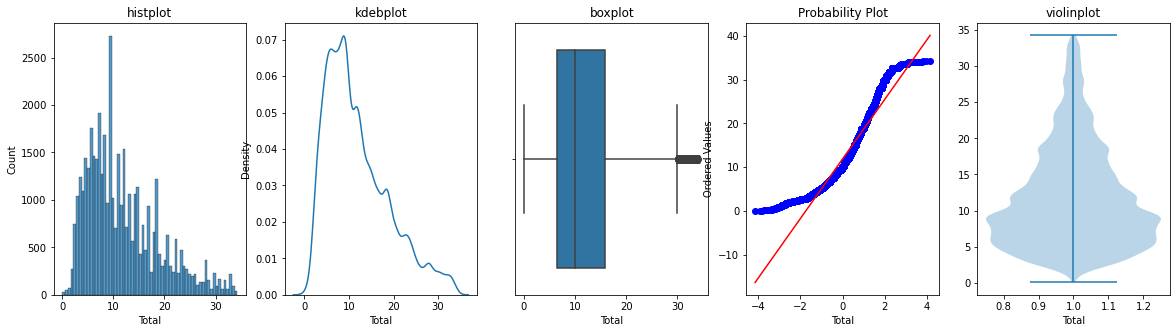

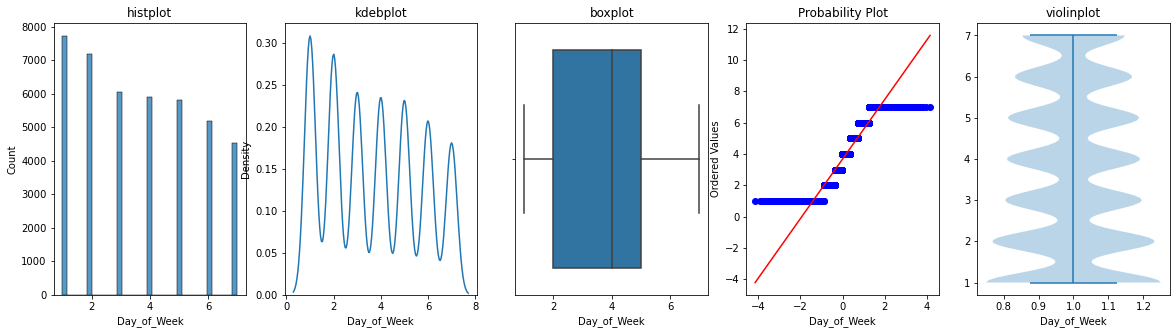

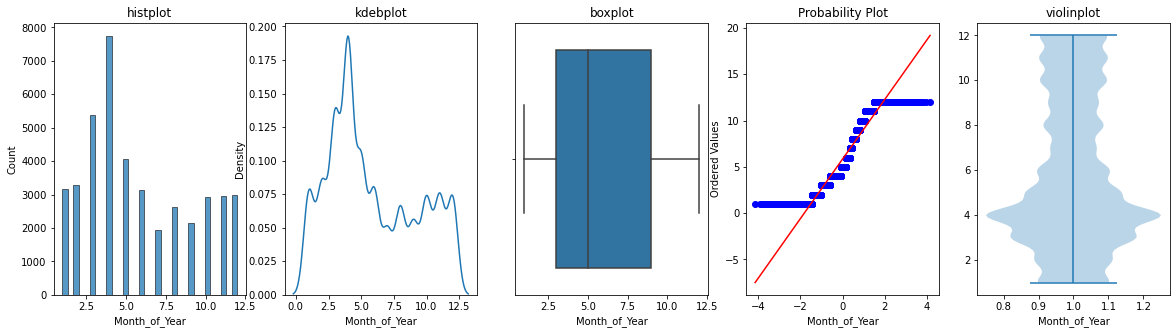

In [43]:
for col in dff[["Quantity", "Total", "Day_of_Week","Month_of_Year"]].columns:
    check_dist(dff, col)

### Normallik Testleri - Hipotez Testleri

* Bir dağılımın normal dağılıma uygunluğunu test etmenin ileri seviye fakat daha etkili bir yolu da normallik testi olarak da isimlendirilen istatistiksel hipotez testleridir. 
* Normallik testi, verinin dağılımının normallik varsayımını ihlal edip etmediğini sınamak için kullanılır.
* Tüm normallik testlerinde test edilecek hipotezler şöyledir:
    * H0: Örneklemin dağılımı normal dağılımdan anlamlı (significant-önemli) derecede farklı değildir.
    * H1: Örneklemin dağılımı normal dağılımdan anlamlı (significant-önemli) derecede farklıdır.
* Genelde istatistiksel testler %90, %95, %99 güven seviyelerinde gerçekleştirilir. En yaygın olarak kullanılan güven seviyesi %95’tir.
* p değerinin 0.05’ten küçük olması durumunda: H0 hipotezi red edilir yani verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
* p değerinin 0.05’ten büyük olması durumunda: H0 hipotezi red edilemez yani verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur..



#### 1- Shapiro-Wilk Testi

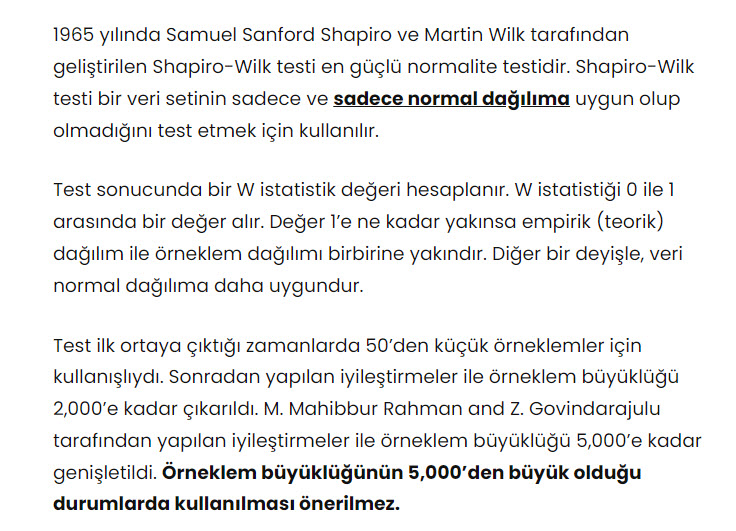

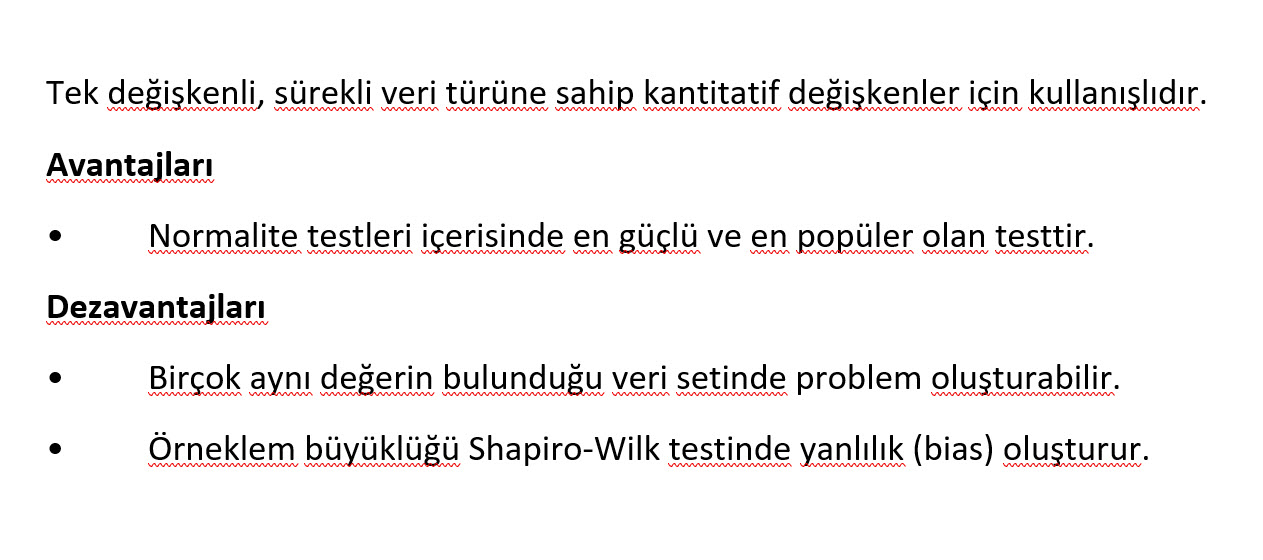

In [44]:
# stats.shapiro(dff["Total"])

In [45]:
# stats.shapiro(dff["Quantity"])

In [46]:
# stats.shapiro(dff["Profit"])

* Gözlem sayılarımız 5000 den çok fazla olduğundan Shapiro-Wilk Testi uygulanmamıştır.

#### 2- Kolmogorov-Smirnov testi

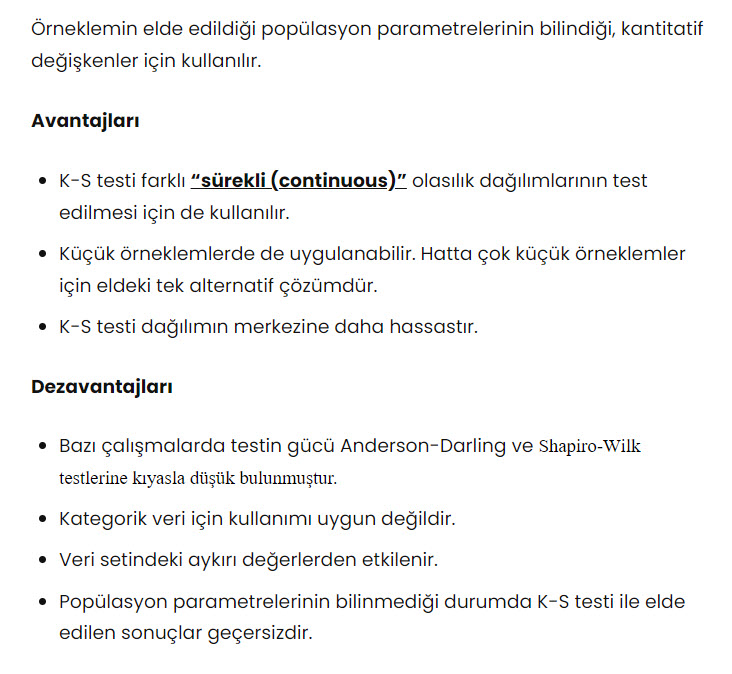

In [47]:
# stats.kstest(dff["Total"], "norm")

In [48]:
# stats.kstest(dff["Quantity"], "norm")

In [49]:
# stats.kstest(dff["Profit"], "norm")

* Veri setimizdeki gözlem sayılarımız çok fazla olduğundan, küçük örneklemler için kullanılan Kolmogorov-Smirnov Testi uygulanmamıştır.

#### 3- Lilliefors Testi

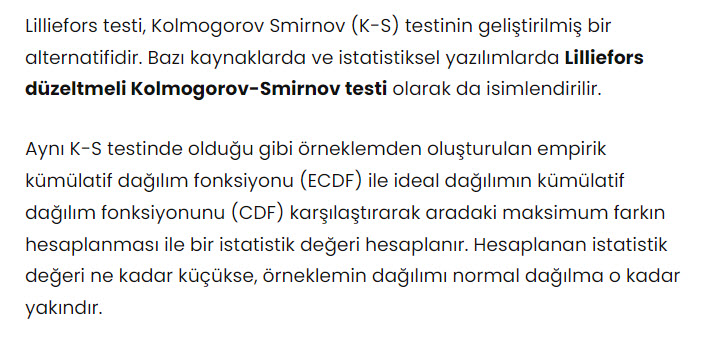

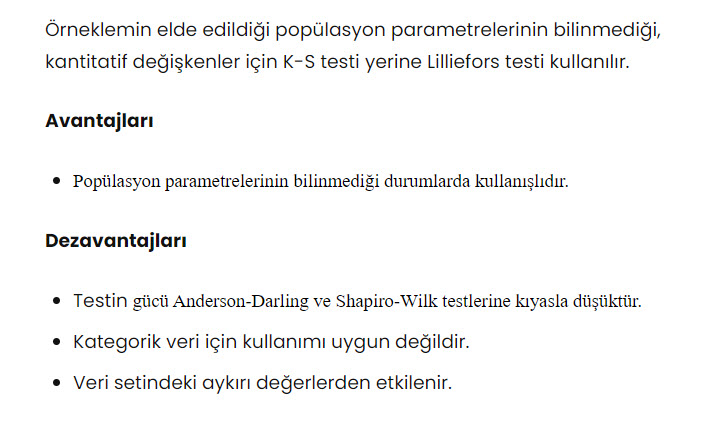

In [50]:
# from statsmodels.stats.diagnostic import lilliefors

* Veri setimizdeki gözlem sayılarımız çok fazla olduğundan, küçük örneklemler için kullanılan Lilliefors Testi uygulanmamıştır.

#### 4- Anderson-Darling testi

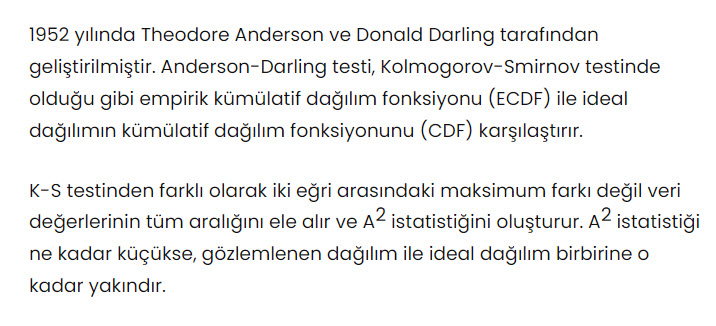

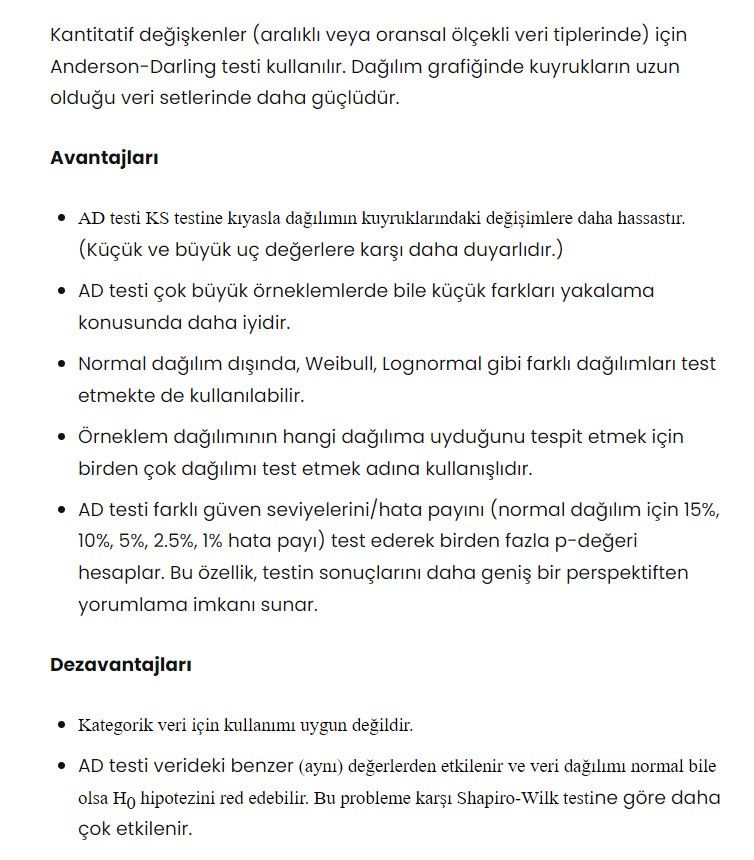

* AD istatistiklerin çok büyük olduğunu görüyoruz. Farklı güven seviyelerinde p-değeri hata payından büyük olmasına rağmen AD istatistiğinin çok yüksek olmasından dolayı testin bu veri seti üzerindeki sonuçlarına şüpheyle yaklaşmakta fayda var.

#### 5- Jarque-Bera Testi

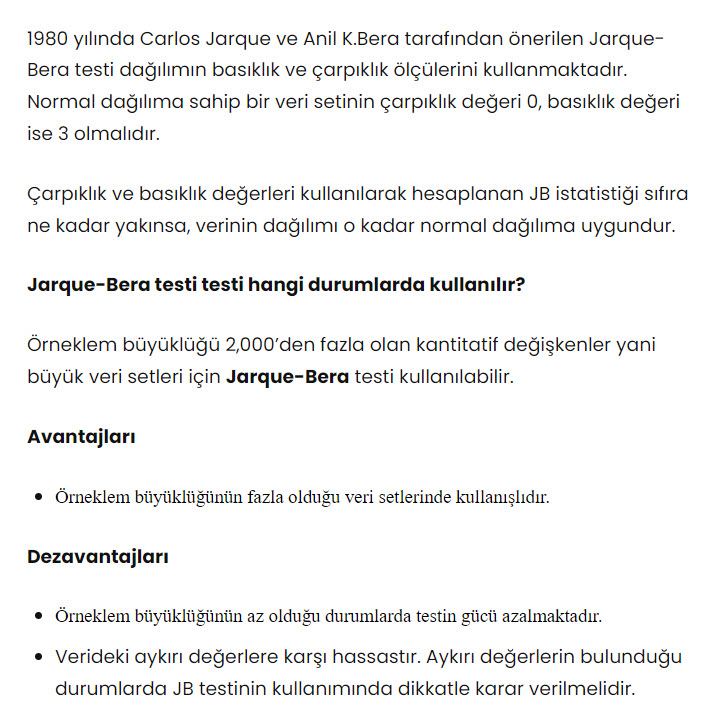

In [51]:
# Total

jb, p = stats.jarque_bera(dff["Total"])
 
alpha = 0.05
 
print("jb istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))
 
if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')


jb istatistik değeri = 6218.685295092421
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


In [52]:
# Quantity

jb, p = stats.jarque_bera(dff["Quantity"])
 
alpha = 0.05
 
print("jb istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))
 
if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')


jb istatistik değeri = 830865.0185179227
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


In [53]:
# Day_of_Week

jb, p = stats.jarque_bera(dff["Day_of_Week"])
 
alpha = 0.05
 
print("jb istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))
 
if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')


jb istatistik değeri = 2854.664267134937
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


In [54]:
# Month_of_Year

jb, p = stats.jarque_bera(dff["Month_of_Year"])
 
alpha = 0.05
 
print("jb istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))
 
if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')


jb istatistik değeri = 3221.3053723661437
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


* Jarque-Bera Testi büyük veriler için uygulandığından veri setimizde bu test kullanılmıştır.

## Normal Dağılmayan Verileri Normale Dönüştürme<a class="anchor" id="donusturme"></a>

### Total Column

#### 1- BOXCOX

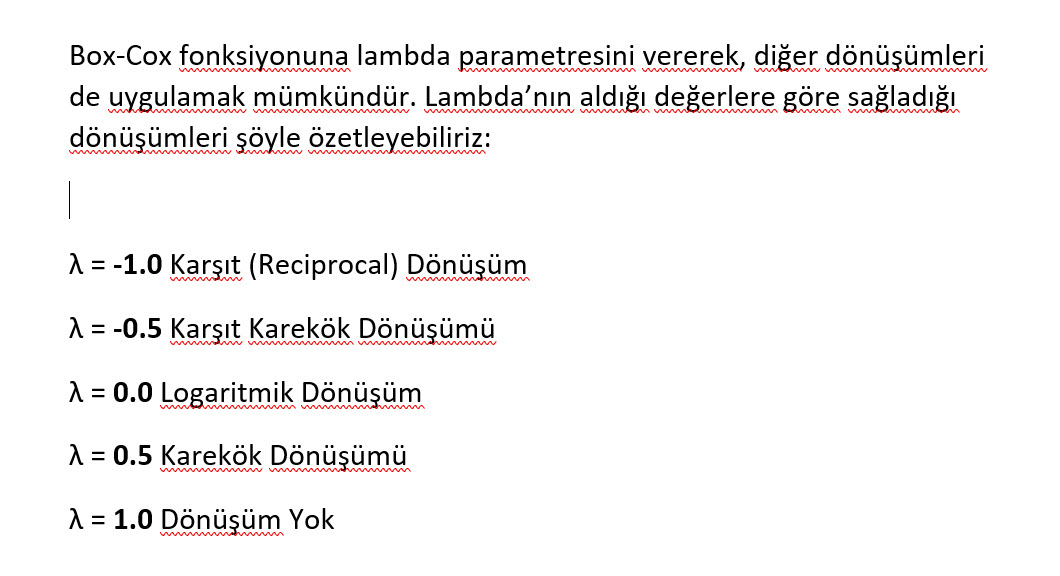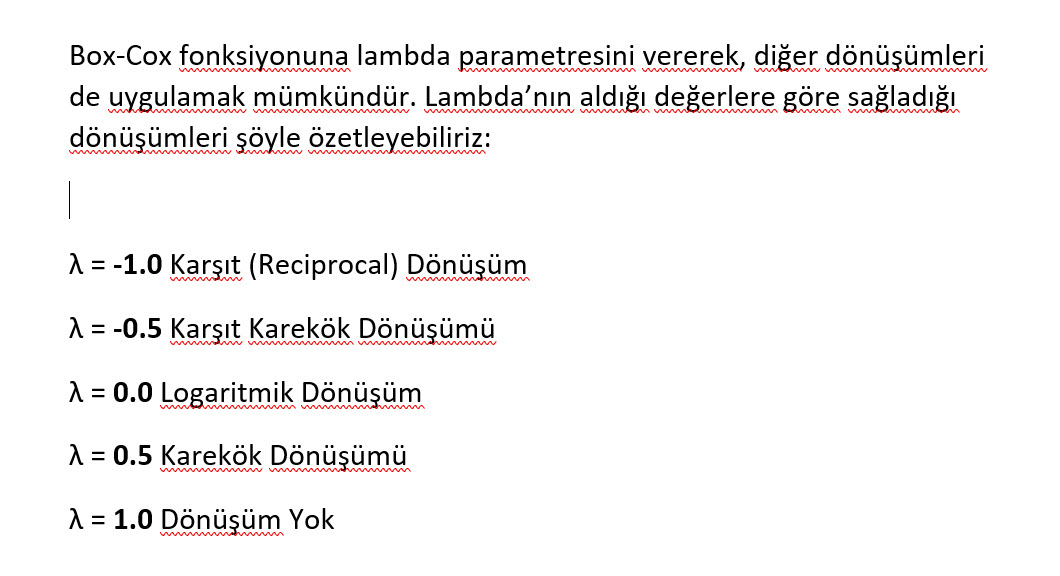

In [55]:
#Total

# total_box_duration, lam = stats.boxcox(dff["Total"], lmbda = 0.0)
total_box_duration, lam = stats.boxcox(dff["Total"])

print("Lamda:     %.4f" % lam) 
print("Skewness: %.4f" % stats.skew(total_box_duration))
print("kurtosis: %.4f" % stats.kurtosis(total_box_duration))
# print(Total_box_duration)

Lamda:     0.2478
Skewness: -0.0200
kurtosis: -0.4426


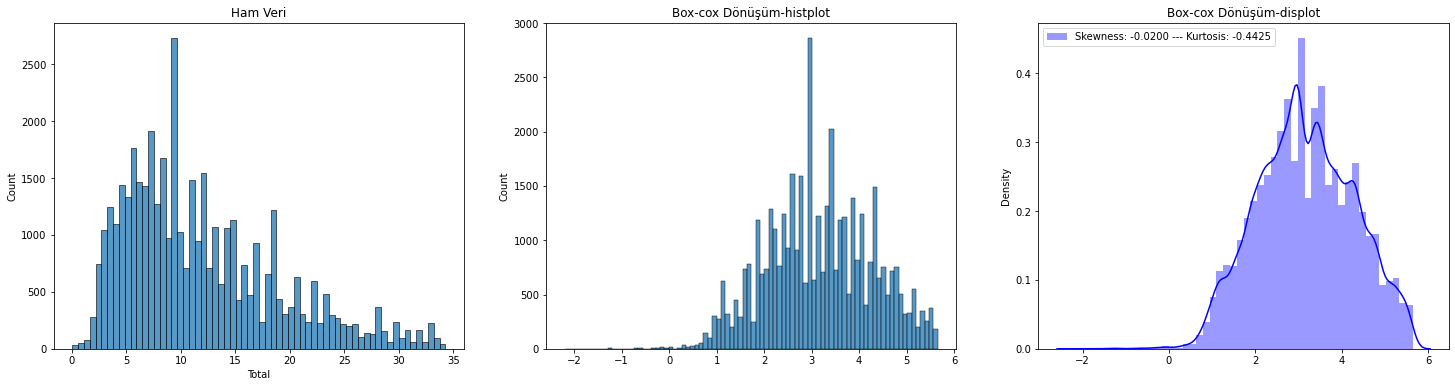

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Total"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = total_box_duration)
ax2.set_title("Box-cox Dönüşüm-histplot")

g = sns.distplot(total_box_duration, color= "b", label= "Skewness: %.4f"%(pd.Series(total_box_duration).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(total_box_duration).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Box-cox Dönüşüm-displot")
 
plt.show()

#### 2-Logaritma

In [57]:
total_log = np.log(dff["Total"])

print("Skewness: "+ "%.4f" % stats.skew(total_log))
print("kurtosis: "+ "%.4f" % stats.kurtosis(total_log))

Skewness: -0.4695
kurtosis: 0.5667


In [58]:
# Alternatif: Boxcox lmbda:0.0
total_log_box_duration = stats.boxcox(dff["Total"], lmbda = 0.0)

print("Skewness: "+ "%.4f" % stats.skew(total_log_box_duration))
print("kurtosis: "+ "%.4f" % stats.kurtosis(total_log_box_duration))

Skewness: -0.4695
kurtosis: 0.5667


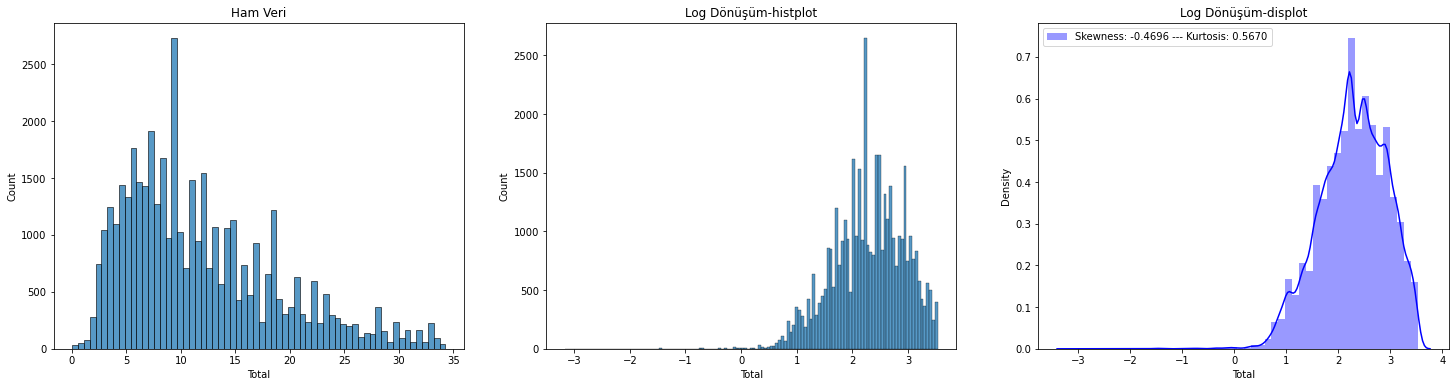

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Total"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = total_log)
ax2.set_title("Log Dönüşüm-histplot")

g = sns.distplot(total_log, color= "b", label= "Skewness: %.4f"%(pd.Series(total_log).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(total_log).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Log Dönüşüm-displot")
 
plt.show()

#### 3- Square Root

In [60]:
total_sqrt = np.sqrt(dff["Total"])

print("Skewness: "+ "%.4f" % stats.skew(total_sqrt))
print("kurtosis: "+ "%.4f" % stats.kurtosis(total_sqrt))

Skewness: 0.3317
kurtosis: -0.4920


In [61]:
# Alternatif: Boxcox lmbda:0.5
# total_sqrt_box_duration = stats.boxcox(dff["Total"], lmbda = 0.5)
total_sqrt_box_duration = scipy.special.boxcox1p(dff["Total"], 0.5)


print("Skewness: "+ "%.4f" % stats.skew(total_sqrt_box_duration))
print("kurtosis: "+ "%.4f" % stats.kurtosis(total_sqrt_box_duration))

Skewness: 0.3954
kurtosis: -0.4838


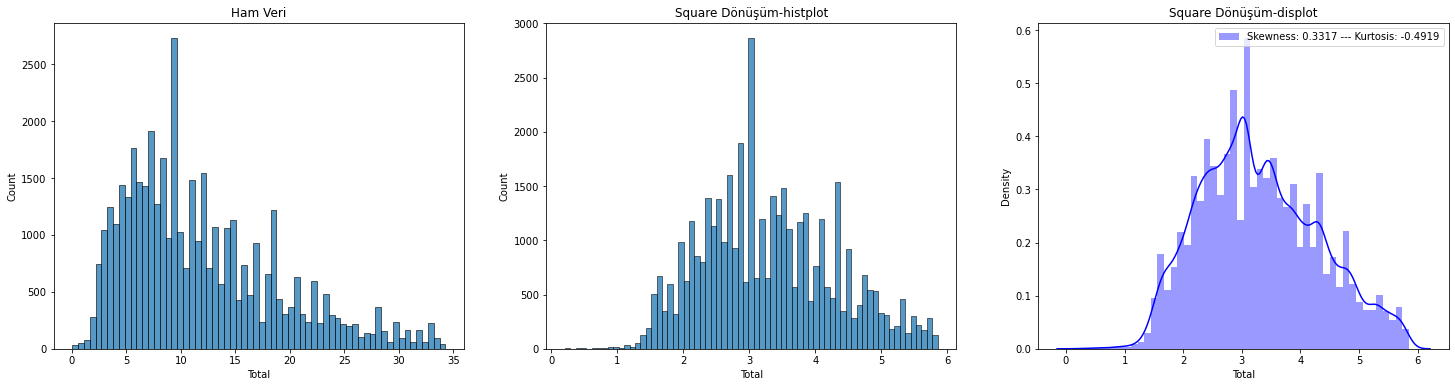

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Total"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = total_sqrt)
ax2.set_title("Square Dönüşüm-histplot")

g = sns.distplot(total_sqrt, color= "b", label= "Skewness: %.4f"%(pd.Series(total_sqrt).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(total_sqrt).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Square Dönüşüm-displot")
 
plt.show()

#### 4- Karşıt dönüşüm (Reciprocal)

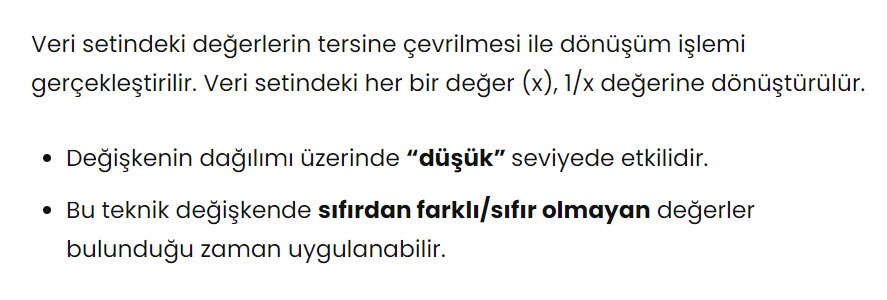

In [63]:
total_reciprocal = 1/dff["Total"]

print("Skewness: "+ "%.4f" % stats.skew(total_reciprocal))
print("kurtosis: "+ "%.4f" % stats.kurtosis(total_reciprocal))

Skewness: 60.7514
kurtosis: 5430.6824


In [64]:
# Alternatif: Boxcox lmbda:-1
# total_reciprocal_box_duration = stats.boxcox(dff["Total"], lmbda = -1)
total_reciprocal_box_duration = scipy.special.boxcox1p(dff["Total"], -1)


print("Skewness: "+ "%.4f" % stats.skew(total_reciprocal_box_duration))
print("kurtosis: "+ "%.4f" % stats.kurtosis(total_reciprocal_box_duration))

Skewness: -2.2071
kurtosis: 11.1067


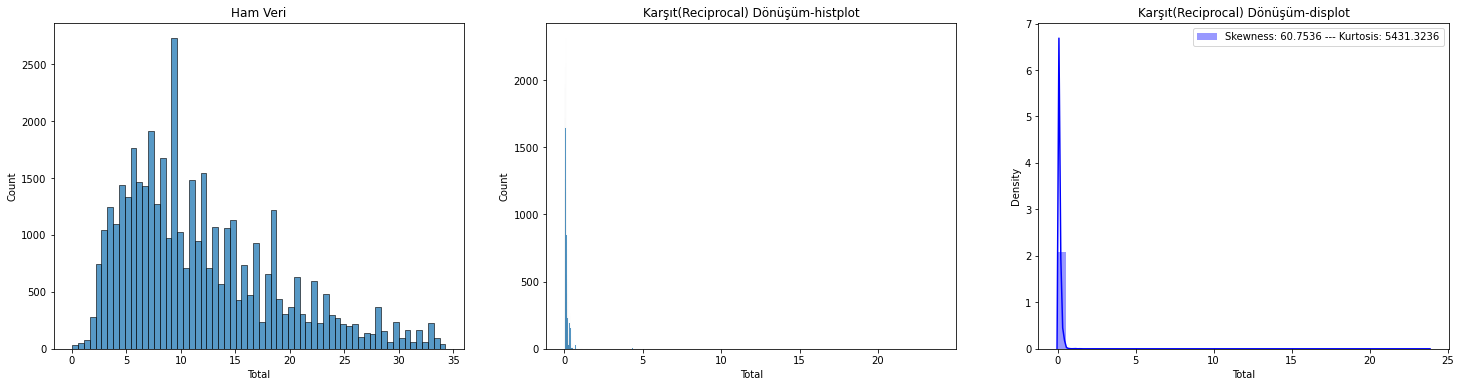

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Total"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = total_reciprocal)
ax2.set_title("Karşıt(Reciprocal) Dönüşüm-histplot")

g = sns.distplot(total_reciprocal, color= "b", label= "Skewness: %.4f"%(pd.Series(total_reciprocal).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(total_reciprocal).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Karşıt(Reciprocal) Dönüşüm-displot")
 
plt.show()

* Bu dönüşüm metoduyla verilerimiz ham halinden çok daha fazla çarpıklık ve basıklık gösterdi.

#### 5- Karşıt Karekök (Reciprocal Square Root) Dönüşüm

In [66]:
# Alternatif: Boxcox lmbda:-0.5
total_rsr_box_duration = stats.boxcox(dff["Total"], lmbda = -0.5)

print("Skewness: "+ "%.4f" % stats.skew(total_rsr_box_duration))
print("kurtosis: "+ "%.4f" % stats.kurtosis(total_rsr_box_duration))

Skewness: -4.9499
kurtosis: 107.2343


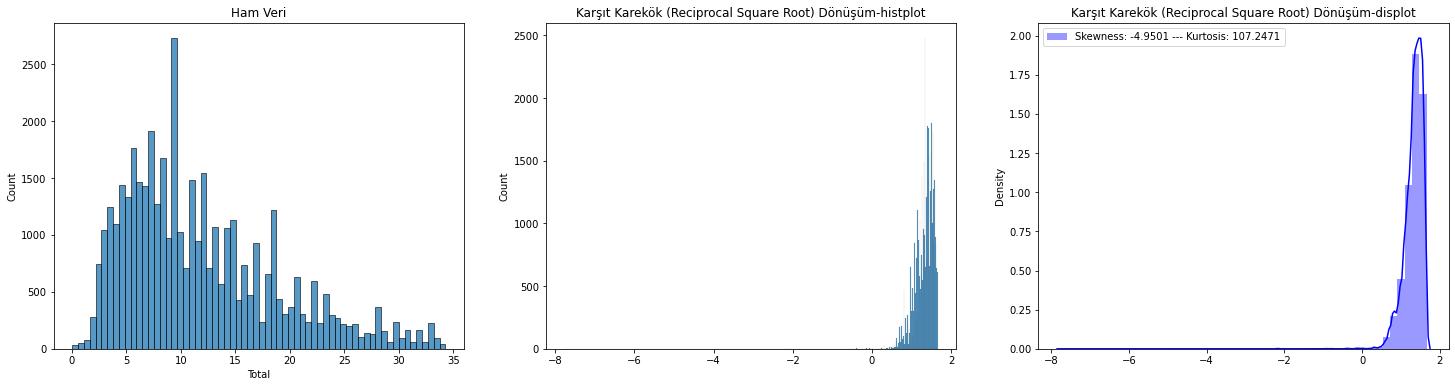

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Total"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = total_rsr_box_duration)
ax2.set_title("Karşıt Karekök (Reciprocal Square Root) Dönüşüm-histplot")

g = sns.distplot(total_rsr_box_duration, color= "b", label= "Skewness: %.4f"%(pd.Series(total_rsr_box_duration).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(total_rsr_box_duration).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Karşıt Karekök (Reciprocal Square Root) Dönüşüm-displot")
 
plt.show()

* Bu dönüşüm metoduyla verilerimiz ham halinden çok daha fazla çarpıklık ve basıklık gösterdi.

#### 6- Yeo-Johnson dönüşümü

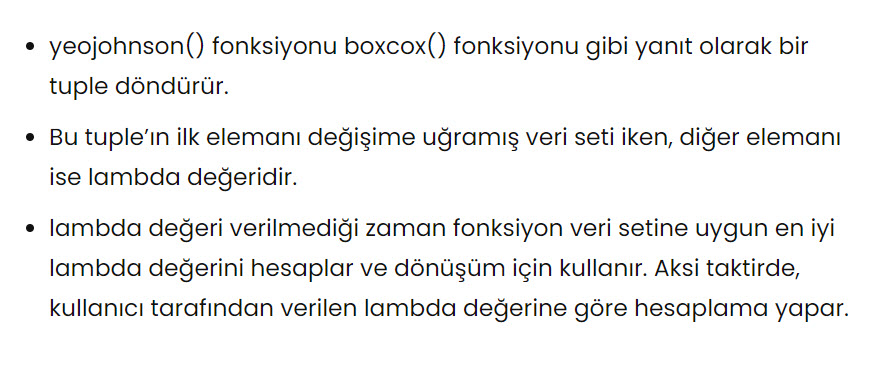

In [68]:
#Total

# total_yeo_box_duration, lam = stats.yeojohnson(dff["Total"], lmbda = 0.0)
total_yeo_box_duration, lam = stats.yeojohnson(dff["Total"])

print("Lamda:     "+ "%.4f" % lam) 
print("Skewness: "+ "%.4f" % stats.skew(total_yeo_box_duration))
print("kurtosis: "+ "%.4f" % stats.kurtosis(total_yeo_box_duration))

Lamda:     0.1461
Skewness: -0.0152
kurtosis: -0.5643


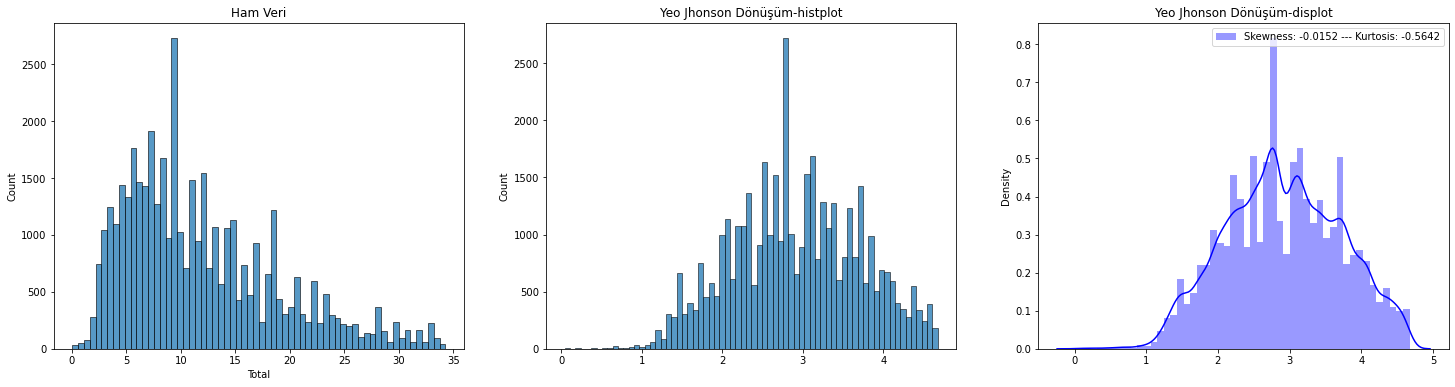

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Total"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = total_yeo_box_duration)
ax2.set_title("Yeo Jhonson Dönüşüm-histplot")

g = sns.distplot(total_yeo_box_duration, color= "b", label= "Skewness: %.4f"%(pd.Series(total_yeo_box_duration).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(total_yeo_box_duration).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Yeo Jhonson Dönüşüm-displot")
 
plt.show()

#### Evuluation

In [70]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [71]:
print("Evaluation for Total Column")
skew_total = pd.concat([pd.Series(dff["Total"].skew()),pd.Series(pd.Series(total_box_duration).skew()), pd.Series(total_log.skew()),pd.Series(total_sqrt.skew()), pd.Series(total_reciprocal.skew()), pd.Series(stats.skew(total_yeo_box_duration))],
            axis = 1, keys = ["None","boxcox","logaritma","square_root", "reciprocal", "yeo_jhonson"]).T

kurtosis_total = pd.concat([pd.Series(dff["Total"].kurtosis()),pd.Series(pd.Series(total_box_duration).kurtosis()),pd.Series(total_log.kurtosis()),pd.Series(total_sqrt.kurtosis()), pd.Series(total_reciprocal.kurtosis()), pd.Series(pd.Series(total_yeo_box_duration).kurtosis())],
          axis = 1, keys = ["None","boxcox","logaritma","square_root", "reciprocal", "yeo_jhonson"]).T

pd.concat([skew_total,kurtosis_total], axis = 1, keys = ["Skewness","Kurtosis"]).T

Evaluation for Total Column


None  boxcox  logaritma  square_root  reciprocal  yeo_jhonson
Skewness 0 0.9263 -0.0200    -0.4696       0.3317     60.7536      -0.0152
Kurtosis 0 0.3027 -0.4425     0.5670      -0.4919   5431.3236      -0.5642

* Total sütunundaki verileri normal dağılımı en yakın dönüştüren test boxcox testidir.

In [72]:
dff["Total"] = stats.boxcox(dff["Total"])[0]

### Quantity Column

#### 1- BOXCOX

In [73]:
#Quantity

from scipy.special import boxcox1p

# Quantity_box_duration = scipy.special.boxcox1p(dff["Quantity"], -1.5)

# Quantity_box_duration, lam = stats.boxcox(dff["Quantity"], lmbda = 0.0)
Quantity_box_duration, lam = stats.boxcox(dff["Quantity"])

print("Lamda:     "+ "%.4f" % lam) 
print("Skewness: "+ "%.4f" % stats.skew(Quantity_box_duration))
print("Kurtosis: "+ "%.4f" % stats.kurtosis(Quantity_box_duration))
# print(Quantity_box_duration)

Lamda:     -1.6164
Skewness: -3.9291
Kurtosis: 210.9622


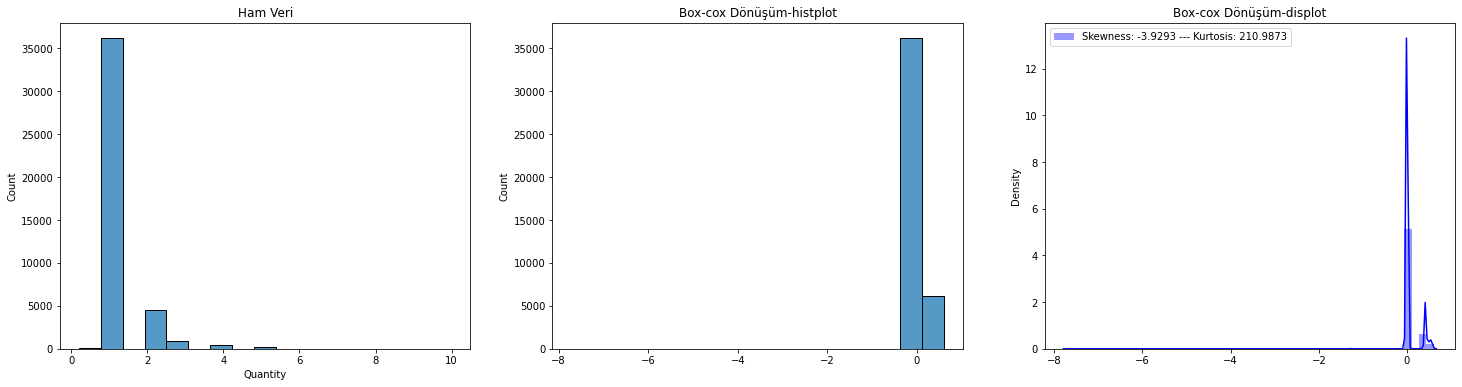

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Quantity"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = Quantity_box_duration)
ax2.set_title("Box-cox Dönüşüm-histplot")

g = sns.distplot(Quantity_box_duration, color= "b", label= "Skewness: %.4f"%(pd.Series(Quantity_box_duration).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(Quantity_box_duration).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Box-cox Dönüşüm-displot")
 
plt.show()

#### 2-Logaritma

In [75]:
Quantity_log = np.log(dff["Quantity"])

print("Skewness: "+ "%.4f" % stats.skew(Quantity_log))
print("kurtosis: "+ "%.4f" % stats.kurtosis(Quantity_log))

Skewness: 2.5505
kurtosis: 6.3065


In [76]:
# Alternatif: Boxcox lmbda:0.0
Quantity_log_box_duration = stats.boxcox(dff["Quantity"], lmbda = 0.0)

print("Skewness: "+ "%.4f" % stats.skew(Quantity_log_box_duration))
print("kurtosis: "+ "%.4f" % stats.kurtosis(Quantity_log_box_duration))

Skewness: 2.5505
kurtosis: 6.3065


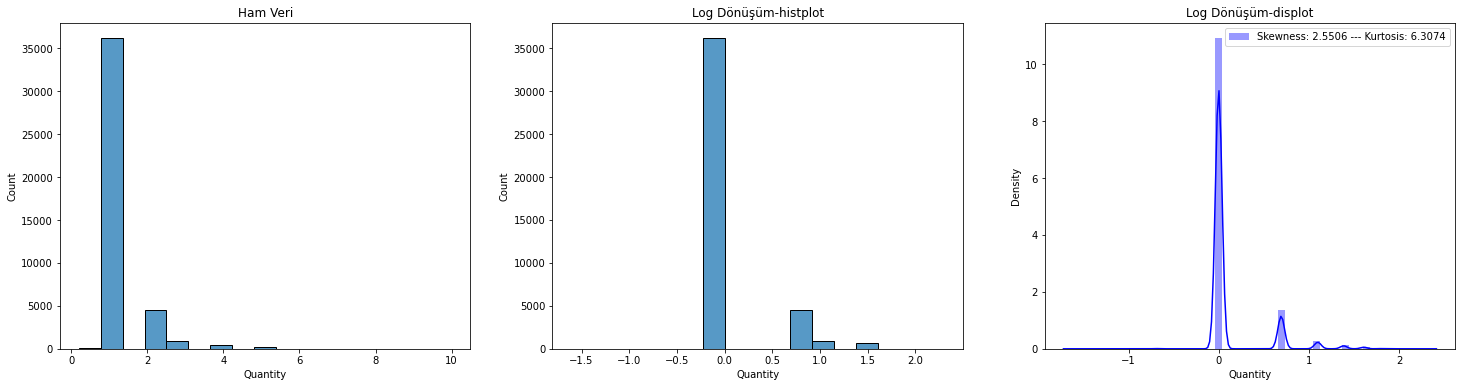

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Quantity"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = Quantity_log)
ax2.set_title("Log Dönüşüm-histplot")

g = sns.distplot(Quantity_log, color= "b", label= "Skewness: %.4f"%(pd.Series(Quantity_log).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(Quantity_log).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Log Dönüşüm-displot")
 
plt.show()

#### 3- Square Root

In [78]:
Quantity_sqrt = np.sqrt(dff["Quantity"])

print("Skewness: "+ "%.4f" % stats.skew(Quantity_sqrt))
print("kurtosis: "+ "%.4f" % stats.kurtosis(Quantity_sqrt))

Skewness: 3.0757
kurtosis: 10.6504


In [79]:
# Alternatif: Boxcox lmbda:0.5
Quantity_sqrt_box_duration = stats.boxcox(dff["Quantity"], lmbda = 0.5)

print("Skewness: "+ "%.4f" % stats.skew(Quantity_sqrt_box_duration))
print("kurtosis: "+ "%.4f" % stats.kurtosis(Quantity_sqrt_box_duration))

Skewness: 3.0757
kurtosis: 10.6504


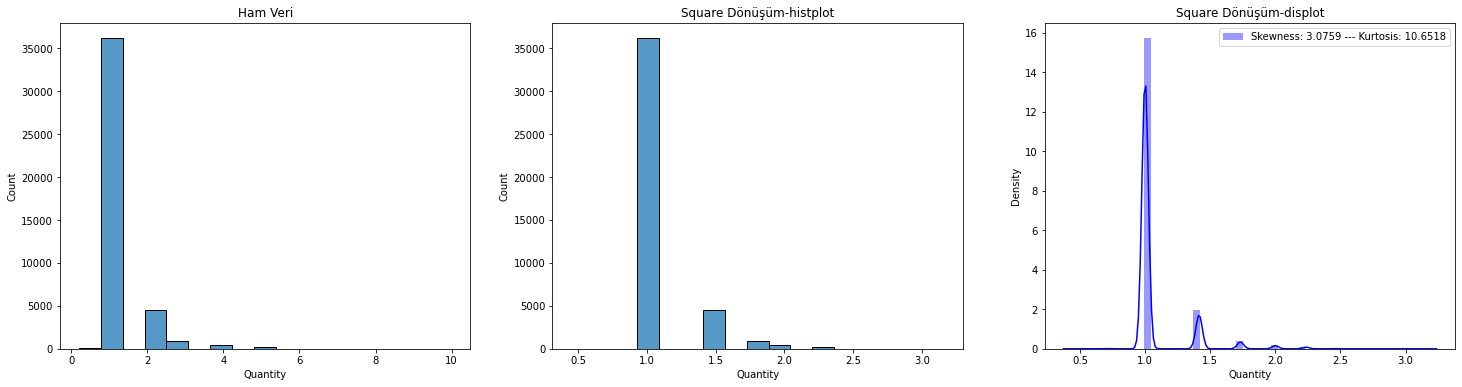

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Quantity"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = Quantity_sqrt)
ax2.set_title("Square Dönüşüm-histplot")

g = sns.distplot(Quantity_sqrt, color= "b", label= "Skewness: %.4f"%(pd.Series(Quantity_sqrt).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(Quantity_sqrt).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Square Dönüşüm-displot")
 
plt.show()

#### Evuluation

In [81]:
print("Evaluation for Quantity Column")
skew_Quantity = pd.concat([pd.Series(dff["Quantity"].skew()),pd.Series(pd.Series(Quantity_box_duration).skew()),pd.Series(Quantity_log.skew()),pd.Series(Quantity_sqrt.skew())],
          axis = 1, keys = ["None","boxcox","logaritma","square_root"]).T

kurtosis_Quantity = pd.concat([pd.Series(dff["Quantity"].kurtosis()),pd.Series(pd.Series(Quantity_box_duration).kurtosis()),pd.Series(Quantity_sqrt.kurtosis()),pd.Series(total_sqrt.kurtosis())],
          axis = 1, keys = ["None","boxcox","logaritma","square_root"]).T

pd.concat([skew_Quantity,kurtosis_Quantity], axis = 1, keys = ["Skewness","Kurtosis"]).T

Evaluation for Quantity Column


None   boxcox  logaritma  square_root
Skewness 0  3.9308  -3.9293     2.5506       3.0759
Kurtosis 0 20.2252 210.9873    10.6518      -0.4919

* Quantity sütunundaki verileri uyguladığımız hiçbir test normal dağılımı yaklaştıramadı. En uygunun square_root dönüşümü olduğu kanaatiyle dönüşüm uyguladık.

In [82]:
# dff["Quantity"] = np.log(dff["Quantity"])
dff["Quantity"] = np.sqrt(dff["Quantity"])
# dff["Quantity"] = scipy.special.boxcox1p(dff["Quantity"], -1.5)

### Day_of_Week Column

#### 1- BOXCOX

In [83]:
# Day_of_Week

profit_box_duration = scipy.special.boxcox1p(dff["Day_of_Week"], 0.40)

# profit_box_duration, lam = stats.boxcox(dff["Profit"], lmbda = 0.0)
# profit_box_duration, lam = stats.boxcox(dff["Profit"])

# print("Lamda:     "+ "%.4f" % lam) 
print("Skewness: "+ "%.4f" % stats.skew(profit_box_duration))
print("kurtosis: "+ "%.4f" % stats.kurtosis(profit_box_duration))
# print(profit_box_duration)

Skewness: -0.1139
kurtosis: -1.2430


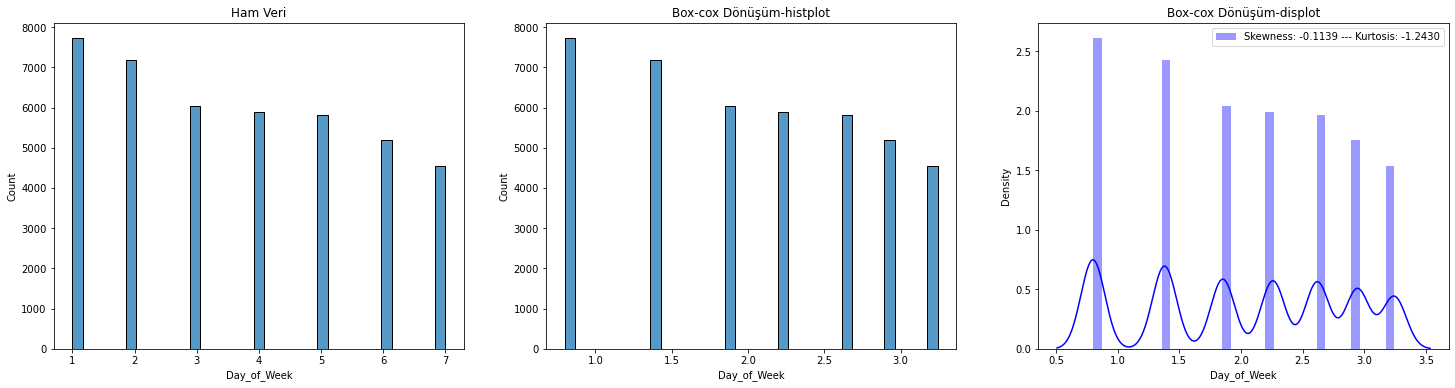

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Day_of_Week"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = profit_box_duration)
ax2.set_title("Box-cox Dönüşüm-histplot")

g = sns.distplot(profit_box_duration, color= "b", label= "Skewness: %.4f"%(pd.Series(profit_box_duration).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(profit_box_duration).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Box-cox Dönüşüm-displot")
 
plt.show()

#### 2-Logaritma

In [85]:
profit_log = np.log(dff["Day_of_Week"])

print("Skewness: "+ "%.4f" % stats.skew(profit_log))
print("kurtosis: "+ "%.4f" % stats.kurtosis(profit_log))

Skewness: -0.5204
kurtosis: -0.9882


In [86]:
# Alternatif: Boxcox lmbda:0.0
profit_log_box_duration = stats.boxcox(dff["Day_of_Week"], lmbda = 0.0)


print("Skewness: "+ "%.4f" % stats.skew(profit_log_box_duration))
print("kurtosis: "+ "%.4f" % stats.kurtosis(profit_log_box_duration))

Skewness: -0.5204
kurtosis: -0.9882


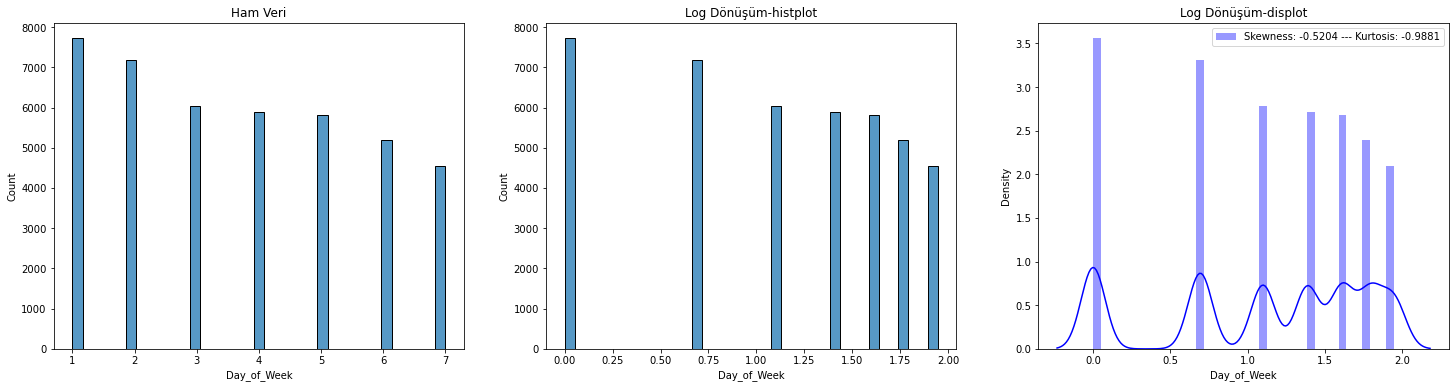

In [87]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Day_of_Week"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = profit_log)
ax2.set_title("Log Dönüşüm-histplot")

g = sns.distplot(profit_log, color= "b", label= "Skewness: %.4f"%(pd.Series(profit_log).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(profit_log).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Log Dönüşüm-displot")
 
plt.show()

#### 3- Square Root

In [88]:
profit_sqrt = np.sqrt(dff["Day_of_Week"])

print("Skewness: "+ "%.4f" % stats.skew(profit_sqrt))
print("kurtosis: "+ "%.4f" % stats.kurtosis(profit_sqrt))

Skewness: -0.1547
kurtosis: -1.2181


In [89]:
# Alternatif: Boxcox lmbda:0.5
profit_sqrt_box_duration = stats.boxcox(dff["Day_of_Week"], lmbda = 0.5)

print("Lamda:     "+ "%.4f" % lam) 
print("Skewness: "+ "%.4f" % stats.skew(profit_sqrt_box_duration))
print("kurtosis: "+ "%.4f" % stats.kurtosis(profit_sqrt_box_duration))

Lamda:     -1.6164
Skewness: -0.1547
kurtosis: -1.2181


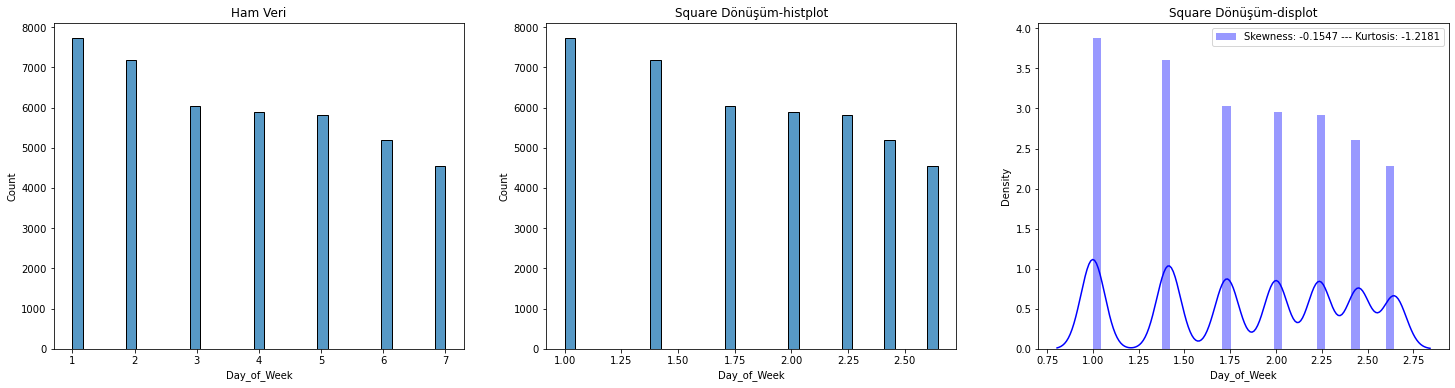

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 6))
 
sns.histplot(ax = ax1, data = dff["Day_of_Week"])
ax1.set_title("Ham Veri")
 
sns.histplot(ax = ax2, data = profit_sqrt)
ax2.set_title("Square Dönüşüm-histplot")

g = sns.distplot(profit_sqrt, color= "b", label= "Skewness: %.4f"%(pd.Series(profit_sqrt).skew())+" --- "
                 +"Kurtosis: %.4f"%(pd.Series(profit_sqrt).kurtosis()))
g = g.legend(loc= "best")
ax3.set_title("Square Dönüşüm-displot")
 
plt.show()

#### Evuluation

In [91]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [92]:
print("Evaluation for Day_of_Week Column")
skew_profit = pd.concat([pd.Series(dff["Day_of_Week"].skew()),pd.Series(pd.Series(profit_box_duration).skew()),pd.Series(profit_log.skew()),pd.Series(profit_sqrt.skew())],
          axis = 1, keys = ["None","boxcox","logaritma","square_root"]).T

kurtosis_profit = pd.concat([pd.Series(dff["Day_of_Week"].kurtosis()),pd.Series(pd.Series(profit_box_duration).kurtosis()),pd.Series(profit_log.kurtosis()),pd.Series(profit_sqrt.kurtosis())],
          axis = 1, keys = ["None","boxcox","logaritma","square_root"]).T

pd.concat([skew_profit,kurtosis_profit], axis = 1, keys = ["Skewness","Kurtosis"]).T

Evaluation for Day_of_Week Column


None  boxcox  logaritma  square_root
Skewness 0  0.1879 -0.1139    -0.5204      -0.1547
Kurtosis 0 -1.2150 -1.2430    -0.9881      -1.2181

* Day_of_Week sütunundaki verileri normal dağılıma en yakın dönüştüren dönüşüm square_root dönüşümüdür.

In [93]:
dff["Day_of_Week"] = np.sqrt(dff["Day_of_Week"])
# dff["Day_of_Week"] = stats.boxcox(dff["Day_of_Week"])[0]
# dff["Day_of_Week"] = scipy.special.boxcox1p(dff["Day_of_Week"], 0.40)

#### Final  - Jarque-Bera Testi

In [94]:
# Total

jb, p = stats.jarque_bera(dff["Total"])
 
alpha = 0.05
 
print("jb istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))
 
if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')


jb istatistik değeri = 348.5463824092386
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


In [95]:
# Quantity

jb, p = stats.jarque_bera(dff["Quantity"])
 
alpha = 0.05
 
print("jb istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))
 
if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')


jb istatistik değeri = 266986.83783321275
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


In [96]:
# Day_of_Week

jb, p = stats.jarque_bera(dff["Day_of_Week"])
 
alpha = 0.05
 
print("jb istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))
 
if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')


jb istatistik değeri = 2787.687024809289
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


* Hiçbir sütunu normal dağılıma yaklaştıramadık. Non-parametrik yöntemler uygulanacaktır.

## Varyans Analizi - ANOVA <a class="anchor" id="varyans"></a>

* Varsayımlar
    * 1- Gözlemlerin(grupların) birbirinden bağımsız olması
    * 2- Normallik
    * 3- Varyans Homojenliği  

In [97]:
dff_outlier_detected['Marketplace'].value_counts()

Amazon             11016
AMAZON              7641
PERGAMO             6826
MEMLEKET PAZARI     6605
B2B                 4663
Wocommerce          3692
EBAY                 935
Ebay                 536
Kaufland             246
WOCOMMERCE           158
other                 41
Name: Marketplace, dtype: int64

In [98]:
for i in range(len(dff_outlier_detected['Marketplace'])):
    if dff_outlier_detected['Marketplace'].iloc[i] == "Amazon":
        dff_outlier_detected['Marketplace'].iloc[i] = "AMAZON"
    elif dff_outlier_detected['Marketplace'].iloc[i] == "Ebay":
        dff_outlier_detected['Marketplace'].iloc[i] = "EBAY"
    
    elif dff_outlier_detected['Marketplace'].iloc[i] == "PERGAMO" or dff_outlier_detected['Marketplace'].iloc[i] == "MEMLEKET PAZARI" \
                                                    or dff_outlier_detected['Marketplace'].iloc[i] == "Wocommerce":
        dff_outlier_detected['Marketplace'].iloc[i] = "WOCOMMERCE"

H0: AMAZON, WOCOMMERCE, B2B, EBAY, KAUFLAND ve OTHER (Marketplace ortalamalari arasinda istatistiksel olarak anlamlı bir farklilik yoktur. )

H1: Fark vardir

In [99]:
dff_outlier_detected[['Marketplace', 'Total', "Subcategory", 'Day_of_Week',  "Month_of_Year"]]

Marketplace   Total Subcategory  Day_of_Week  Month_of_Year
0      WOCOMMERCE 11.6800       HONIG            5              7
1      WOCOMMERCE 20.5600  ZEYTINYAGI            2              9
2      WOCOMMERCE  8.4000       HONIG            7              9
3      WOCOMMERCE  8.4000       HONIG            7              9
4      WOCOMMERCE  8.9700       HONIG            7              9
...           ...     ...         ...          ...            ...
44756      AMAZON  9.3400       RECEL            4              2
44757      AMAZON  9.3400       RECEL            5              2
44758      AMAZON  9.3400       RECEL            5              2
44759    Kaufland  4.6600       RECEL            1              2
44760    Kaufland  4.6600       RECEL            4              3

[42359 rows x 5 columns]

## 1- Marketplace Anova Analizi

In [100]:
dff_outlier_detected.Marketplace.value_counts()

AMAZON        18657
WOCOMMERCE    17281
B2B            4663
EBAY           1471
Kaufland        246
other            41
Name: Marketplace, dtype: int64

In [101]:
dff_Total_AMAZON = dff_outlier_detected["Total"][dff_outlier_detected["Marketplace"] == "AMAZON"]
dff_Total_WOCOMMERCE = dff_outlier_detected["Total"][dff_outlier_detected["Marketplace"] == "WOCOMMERCE"]
dff_Total_B2B = dff_outlier_detected["Total"][dff_outlier_detected["Marketplace"] == "B2B"]
dff_Total_EBAY = dff_outlier_detected["Total"][dff_outlier_detected["Marketplace"] == "EBAY"]
dff_Total_KAUFLAND = dff_outlier_detected["Total"][dff_outlier_detected["Marketplace"] == "Kaufland"]
dff_Total_OTHER = dff_outlier_detected["Total"][dff_outlier_detected["Marketplace"] == "other"]

### Normallik Varsayımı

#### Total_AMAZON

In [102]:
dff_Total_AMAZON.shape

(18657,)

* Gözlem sayılarımız 5000 den çok fazla olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [103]:
# Total_AMAZON

jb, p = stats.jarque_bera(dff_Total_AMAZON) 
alpha = 0.05
print("Total_AMAZON")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')

Total_AMAZON
Test istatistik değeri = 1602.6987878615828
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total WOCOMMERCE

In [104]:
dff_Total_WOCOMMERCE.shape

(17281,)

* Gözlem sayılarımız 5000 den çok fazla olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [105]:
# Total_MEMLEKET_PAZARI

jb, p = stats.jarque_bera(dff_Total_WOCOMMERCE) 
alpha = 0.05
print("Total_WOCOMMERCE")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')

Total_WOCOMMERCE
Test istatistik değeri = 7868.1234924569135
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total B2B

In [106]:
dff_Total_B2B.shape

(4663,)

* Gözlem sayılarımız 5000 den az olduğundan "Shapiro Wilk" normallik testi uygulanmıştır.

In [107]:
# Total_B2B

jb, p = stats.shapiro(dff_Total_B2B) 
alpha = 0.05

print("Total_EBAY")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')

Total_EBAY
Test istatistik değeri = 0.884081244468689
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total EBAY

In [108]:
dff_Total_EBAY.shape

(1471,)

* Gözlem sayılarımız 5000 den az olduğundan "Shapiro Wilk" normallik testi uygulanmıştır.

In [109]:
# Total_EBAY

jb, p = stats.shapiro(dff_Total_EBAY) 
alpha = 0.05

print("Total_EBAY")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')

Total_EBAY
Test istatistik değeri = 0.9183749556541443
p değeri = 1.8162547822161937e-27
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total KAUFLAND

In [110]:
dff_Total_KAUFLAND.shape

(246,)

* Gözlem sayılarımız 5000 den az olduğundan "Shapiro Wilk" normallik testi uygulanmıştır.

In [111]:
# Total_Kaufland

jb, p = stats.shapiro(dff_Total_KAUFLAND) 
alpha = 0.05

print("Total_Kaufland")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')

Total_Kaufland
Test istatistik değeri = 0.8258953094482422
p değeri = 6.582794370738824e-16
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


### Varyans Homojenliği Varsayımı

H0: Varyanslar homojendir.

H1: Varyanslar homojen değildir.

#### Barttlett Testi

In [112]:
stats.bartlett(dff_Total_AMAZON, dff_Total_WOCOMMERCE, dff_Total_B2B, dff_Total_EBAY, dff_Total_KAUFLAND, dff_Total_OTHER)

BartlettResult(statistic=1117.8588917274847, pvalue=1.8138032178764913e-239)

In [113]:
test, p = stats.bartlett(dff_Total_AMAZON, dff_Total_WOCOMMERCE, dff_Total_B2B, dff_Total_EBAY, dff_Total_KAUFLAND, dff_Total_OTHER)
alpha = 0.05

print("Barttlett Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Barttlett Testi
Test istatistik değeri = 1117.8588917274847
p değeri = 1.8138032178764913e-239
H1: Varyanslar homojen değildir.


#### Levene Testi

In [114]:
stats.levene(dff_Total_AMAZON, dff_Total_WOCOMMERCE, dff_Total_B2B, dff_Total_EBAY, dff_Total_KAUFLAND, dff_Total_OTHER)

LeveneResult(statistic=252.38411495121204, pvalue=1.0932363351690684e-266)

In [115]:
test, p = stats.levene(dff_Total_AMAZON, dff_Total_WOCOMMERCE, dff_Total_B2B, dff_Total_EBAY, dff_Total_KAUFLAND, dff_Total_OTHER)
alpha = 0.05

print("Levene Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Levene Testi
Test istatistik değeri = 252.38411495121204
p değeri = 1.0932363351690684e-266
H1: Varyanslar homojen değildir.


* Normallik testleri sonucu AMAZON, WOCOMMERCE, B2B, EBAY, KAUFLAND ve OTHER platformları satış fiyatları dağılımının normal dağılıma yaklaşmadığı ve varyansların homojen olmadığı görülmüştür. Bu sebeple nonparametrik varyans analizi metodu olan Kruskal Wallis testini uygulayacağız.

* Varsayımlar gerçekleşseydi uygulayacağımız test şu olacaktı.

### Hipotez Testi

* Ho: AMAZON, WOCOMMERCE, B2B, EBAY, KAUFLAND ve OTHER Marketplacelerindeki satışların ortalamalari arasinda istatistiksel olarak anlamlı bir farklilik YOKTUR.
* H1: AMAZON, WOCOMMERCE, B2B, EBAY, KAUFLAND ve OTHER Marketplacelerindeki satışların ortalamalari arasinda istatistiksel olarak anlamlı bir farklilik VARDIR.

In [116]:
#Parametrik Hipotez Testi

from scipy.stats import f_oneway

f_oneway(dff_Total_AMAZON, dff_Total_WOCOMMERCE, dff_Total_B2B, dff_Total_EBAY, dff_Total_KAUFLAND, dff_Total_OTHER)

F_onewayResult(statistic=1939.8668962255622, pvalue=0.0)

* Varsayımlar gerçekleşmediğinden Kruskal Wallis testi uygulayacağız.

In [117]:
#Parametrik Hipotez Testi

from scipy.stats import kruskal

kruskal(dff_Total_AMAZON, dff_Total_WOCOMMERCE, dff_Total_B2B, dff_Total_EBAY, dff_Total_KAUFLAND, dff_Total_OTHER)

KruskalResult(statistic=9308.0320248752, pvalue=0.0)

* Ho hipotezi reddedilir. Yani AMAZON, WOCOMMERCE, B2B, EBAY, KAUFLAND ve OTHER Marketplacelerindeki satışların ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik VARDIR. 

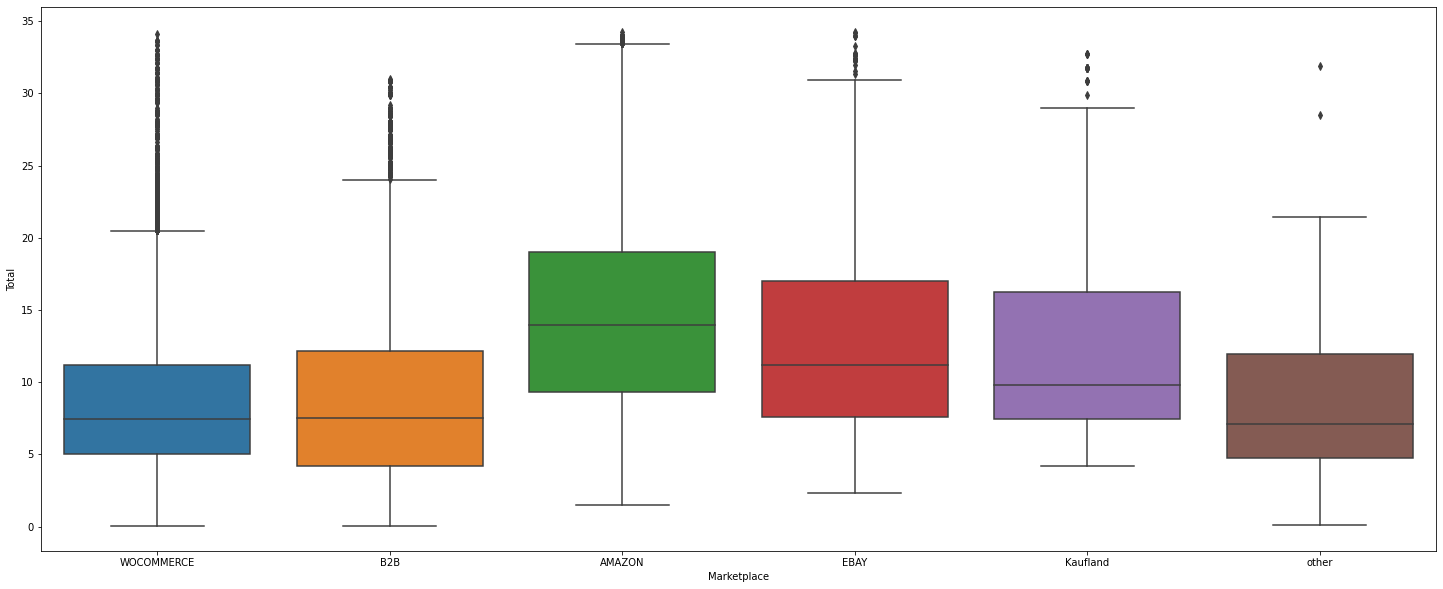

In [118]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Marketplace", y = "Total", data = dff_outlier_detected);
plt.savefig("marketplace_sales_boxplot.png")

In [119]:
# Mean
ll = ([dff_Total_AMAZON.mean(), dff_Total_WOCOMMERCE.mean(), dff_Total_B2B.mean(), dff_Total_EBAY.mean(), dff_Total_KAUFLAND.mean(), dff_Total_OTHER.mean()])

mean_marketplace_sales = pd.DataFrame(ll, index =["dff_Total_AMAZON", "dff_Total_WOCOMMERCE", "dff_Total_B2B", "dff_Total_EBAY", "dff_Total_KAUFLAND", "dff_Total_OTHER"], 
             columns = ["Mean"]).sort_values(by = "Mean", ascending = False)

import dataframe_image as dfi
df_styled = mean_marketplace_sales.style.background_gradient() #adding a gradient based on values in cell
dfi.export(mean_marketplace_sales,"mean_marketplace_sales.png")
mean_marketplace_sales

Mean
dff_Total_AMAZON     15.1885
dff_Total_KAUFLAND   13.2668
dff_Total_EBAY       13.0296
dff_Total_OTHER       9.3532
dff_Total_B2B         9.3169
dff_Total_WOCOMMERCE  8.8746

In [120]:
# Median
ll = ([dff_Total_AMAZON.median(), dff_Total_WOCOMMERCE.median(), dff_Total_B2B.median(), dff_Total_EBAY.median(), dff_Total_KAUFLAND.median(), dff_Total_OTHER.median()])

median_marketplace_sales = pd.DataFrame(ll, index =["dff_Total_AMAZON", "dff_Total_WOCOMMERCE", "dff_Total_B2B", "dff_Total_EBAY", "dff_Total_KAUFLAND", "dff_Total_OTHER"], 
             columns = ["Median"]).sort_values(by = "Median", ascending = False)
import dataframe_image as dfi
df_styled = median_marketplace_sales.style.background_gradient() #adding a gradient based on values in cell
dfi.export(median_marketplace_sales,"median_marketplace_sales.png")
median_marketplace_sales

Median
dff_Total_AMAZON     13.9600
dff_Total_EBAY       11.2056
dff_Total_KAUFLAND    9.8000
dff_Total_B2B         7.5048
dff_Total_WOCOMMERCE  7.4700
dff_Total_OTHER       7.1300

* İstatistiki olarak yorumladığımız bu sonucun genel açıklaması şudur;
    * Yukarıdaki grafikte de görüleceği üzere AMAZON, WOCOMMERCE, B2B, EBAY, KAUFLAND ve OTHER ciro ortalamaları birbirinden farklıdır. Amazon ve EBAY platformuna daha fazla yatırım yapılması önerilmektedir.

## 2- Day of Week Anova Analizi

### -- Total Bazlı Analiz

In [121]:
dff_outlier_detected["Day_of_Week"]

0        5
1        2
2        7
3        7
4        7
        ..
44756    4
44757    5
44758    5
44759    1
44760    4
Name: Day_of_Week, Length: 42359, dtype: int64

In [122]:
dff_Total_Day_of_Week_1 = dff_outlier_detected["Total"][dff_outlier_detected["Day_of_Week"] == 1]
dff_Total_Day_of_Week_2 = dff_outlier_detected["Total"][dff_outlier_detected["Day_of_Week"] == 2]
dff_Total_Day_of_Week_3 = dff_outlier_detected["Total"][dff_outlier_detected["Day_of_Week"] == 3]
dff_Total_Day_of_Week_4 = dff_outlier_detected["Total"][dff_outlier_detected["Day_of_Week"] == 4]
dff_Total_Day_of_Week_5 = dff_outlier_detected["Total"][dff_outlier_detected["Day_of_Week"] == 5]
dff_Total_Day_of_Week_6 = dff_outlier_detected["Total"][dff_outlier_detected["Day_of_Week"] == 6]
dff_Total_Day_of_Week_7 = dff_outlier_detected["Total"][dff_outlier_detected["Day_of_Week"] == 7]

### Normallik Varsayımı

#### Total_Day_of_Week_1

In [123]:
dff_Total_Day_of_Week_1.shape

(7721,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [124]:
#dff_Total_Day_of_Week_1

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_1) 
alpha = 0.05

print("dff_Total_Day_of_Week_1")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_1
Test istatistik değeri = 1002.4130818657562
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_2

In [125]:
dff_Total_Day_of_Week_2.shape

(7177,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [126]:
#dff_Total_Day_of_Week_2

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_2) 
alpha = 0.05

print("dff_Total_Day_of_Week_2")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_2
Test istatistik değeri = 960.376595364166
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_3

In [127]:
dff_Total_Day_of_Week_3.shape

(6044,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [128]:
#dff_Total_Day_of_Week_3

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_3) 
alpha = 0.05

print("dff_Total_Day_of_Week_3")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_3
Test istatistik değeri = 798.2112182262697
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_4

In [129]:
dff_Total_Day_of_Week_4.shape

(5893,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [130]:
#dff_Total_Day_of_Week_4

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_4) 
alpha = 0.05

print("dff_Total_Day_of_Week_4")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_4
Test istatistik değeri = 714.1915445652547
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_5

In [131]:
dff_Total_Day_of_Week_5.shape

(5802,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [132]:
#dff_Total_Day_of_Week_5

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_5) 
alpha = 0.05

print("dff_Total_Day_of_Week_5")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_5
Test istatistik değeri = 759.9149524336724
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_6

In [133]:
dff_Total_Day_of_Week_6.shape

(5188,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [134]:
#dff_Total_Day_of_Week_6

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_6) 
alpha = 0.05

print("dff_Total_Day_of_Week_6")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_6
Test istatistik değeri = 1192.6135600066416
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_7

In [135]:
dff_Total_Day_of_Week_7.shape

(4534,)

* Gözlem sayılarımız 5000 den küçük olduğundan "Shapiro Wilk" normallik testi uygulanmıştır.

In [136]:
#dff_Total_Day_of_Week_7

jb, p = stats.shapiro(dff_Total_Day_of_Week_7) 
alpha = 0.05

print("dff_Total_Day_of_Week_7")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_7
Test istatistik değeri = 0.8980066180229187
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


### Varyans Homojenliği Varsayımı

H0: Varyanslar homojendir.

H1: Varyanslar homojen değildir.

#### Barttlett Testi

In [137]:
stats.bartlett(dff_Total_Day_of_Week_1,dff_Total_Day_of_Week_2,dff_Total_Day_of_Week_3,dff_Total_Day_of_Week_4,
               dff_Total_Day_of_Week_5,dff_Total_Day_of_Week_6,dff_Total_Day_of_Week_7)

BartlettResult(statistic=34.927764807468925, pvalue=4.450618189836956e-06)

In [138]:
test, p = stats.bartlett(dff_Total_Day_of_Week_1,dff_Total_Day_of_Week_2,dff_Total_Day_of_Week_3,dff_Total_Day_of_Week_4,
               dff_Total_Day_of_Week_5,dff_Total_Day_of_Week_6,dff_Total_Day_of_Week_7)
alpha = 0.05

print("Barttlett Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Barttlett Testi
Test istatistik değeri = 34.927764807468925
p değeri = 4.450618189836956e-06
H1: Varyanslar homojen değildir.


#### Levene Testi

In [139]:
stats.levene(dff_Total_Day_of_Week_1,dff_Total_Day_of_Week_2,dff_Total_Day_of_Week_3,dff_Total_Day_of_Week_4,
               dff_Total_Day_of_Week_5,dff_Total_Day_of_Week_6,dff_Total_Day_of_Week_7)

LeveneResult(statistic=11.353126358237093, pvalue=1.0178374021184981e-12)

In [140]:
test, p = stats.levene(dff_Total_Day_of_Week_1,dff_Total_Day_of_Week_2,dff_Total_Day_of_Week_3,dff_Total_Day_of_Week_4,
               dff_Total_Day_of_Week_5,dff_Total_Day_of_Week_6,dff_Total_Day_of_Week_7)
alpha = 0.05

print("Levene Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Levene Testi
Test istatistik değeri = 11.353126358237093
p değeri = 1.0178374021184981e-12
H1: Varyanslar homojen değildir.


* Normallik testleri sonucu haftanın herbir gününün satış fiyatları dağılımının normal dağılıma yaklaşmadığı aynı zamanda varyanslarının homojen olmadığı görülmüştür. Varsayımlarımız gerçeklemediğinden nonparametrik varyans analizi metodu olan "Kruskal Wallis" testini uygulayacağız.

### Hipotez Testi

* Ho: Haftanın herbir gününün satış ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik YOKTUR.
* H1: haftanın herbir gününün satış ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik VARDIR. (En az birinde)

In [141]:
#Non Parametrik Hipotez Testi

from scipy.stats import kruskal

kruskal(dff_Total_Day_of_Week_1,dff_Total_Day_of_Week_2,dff_Total_Day_of_Week_3,dff_Total_Day_of_Week_4,
               dff_Total_Day_of_Week_5,dff_Total_Day_of_Week_6,dff_Total_Day_of_Week_7)

KruskalResult(statistic=481.6816176962733, pvalue=7.416556392661081e-101)

* Ho hipotezi reddedilir. Yani haftanın herbir gününün satış ortalamalari ve medyanları arasinda istatistiksek olarak anlamlı bir farklilik vardır. (En az birinde)

In [142]:
# Mean
ll = ([dff_Total_Day_of_Week_1.mean(),dff_Total_Day_of_Week_2.mean(),dff_Total_Day_of_Week_3.mean(),
      dff_Total_Day_of_Week_4.mean(),dff_Total_Day_of_Week_5.mean(),dff_Total_Day_of_Week_6.mean(),
      dff_Total_Day_of_Week_7.mean()])

mean_sales_weekly = pd.DataFrame(ll, index =["dff_Total_Day_of_Week_1","dff_Total_Day_of_Week_2","dff_Total_Day_of_Week_3",
                           "dff_Total_Day_of_Week_4","dff_Total_Day_of_Week_5","dff_Total_Day_of_Week_6",
                           "dff_Total_Day_of_Week_7"], columns = ["Mean"]).sort_values(by = "Mean", ascending = False)

import dataframe_image as dfi
df_styled = mean_sales_weekly.style.background_gradient() #adding a gradient based on values in cell
dfi.export(mean_sales_weekly,"mean_sales_weekly.png")
mean_sales_weekly

Mean
dff_Total_Day_of_Week_4 12.3582
dff_Total_Day_of_Week_3 12.3491
dff_Total_Day_of_Week_1 12.2471
dff_Total_Day_of_Week_2 12.2041
dff_Total_Day_of_Week_5 11.9557
dff_Total_Day_of_Week_7 10.9930
dff_Total_Day_of_Week_6 10.4412

In [143]:
# Median
ll = ([dff_Total_Day_of_Week_1.median(),dff_Total_Day_of_Week_2.median(),dff_Total_Day_of_Week_3.median(),
      dff_Total_Day_of_Week_4.median(),dff_Total_Day_of_Week_5.median(),dff_Total_Day_of_Week_6.median(),
      dff_Total_Day_of_Week_7.median()])

median_sales_weekly = pd.DataFrame(ll, index =["dff_Total_Day_of_Week_1","dff_Total_Day_of_Week_2","dff_Total_Day_of_Week_3",
                           "dff_Total_Day_of_Week_4","dff_Total_Day_of_Week_5","dff_Total_Day_of_Week_6",
                           "dff_Total_Day_of_Week_7"], columns = ["Median"]).sort_values(by = "Median", ascending = False)

import dataframe_image as dfi
df_styled = median_sales_weekly.style.background_gradient() #adding a gradient based on values in cell
dfi.export(median_sales_weekly,"median_sales_weekly.png")
median_sales_weekly

Median
dff_Total_Day_of_Week_3 10.9200
dff_Total_Day_of_Week_4 10.8908
dff_Total_Day_of_Week_2 10.7000
dff_Total_Day_of_Week_1 10.4000
dff_Total_Day_of_Week_5 10.0800
dff_Total_Day_of_Week_7  9.2500
dff_Total_Day_of_Week_6  8.8743

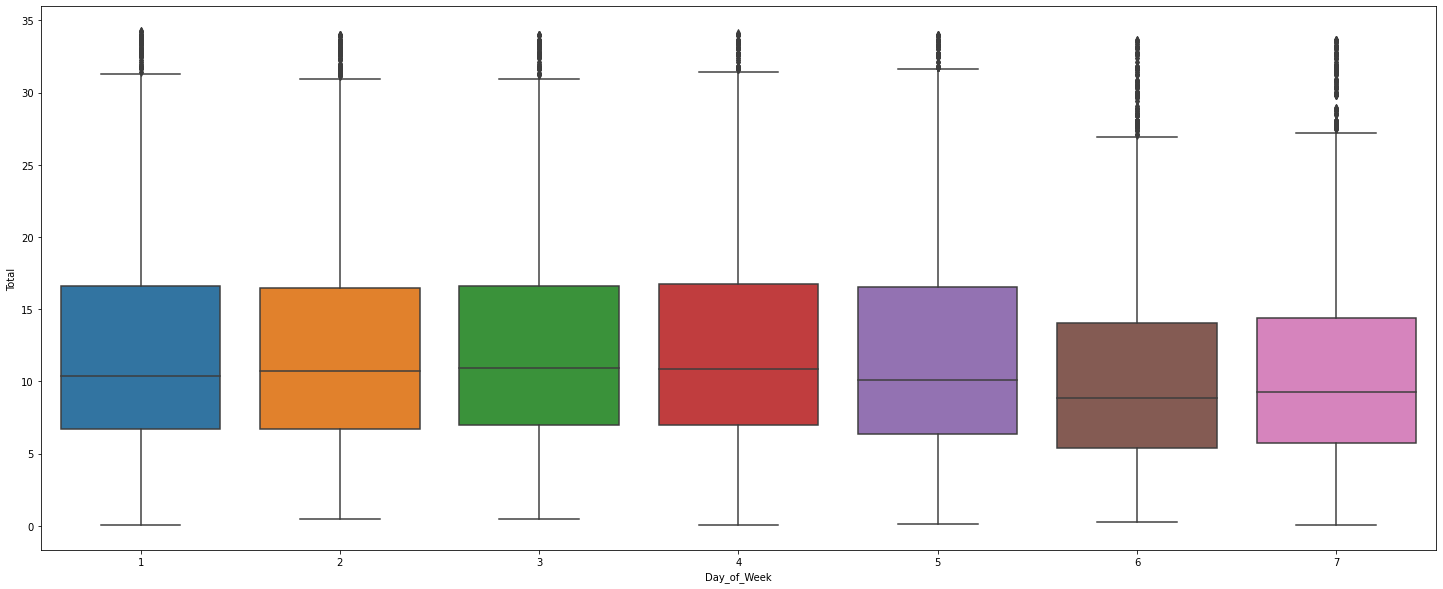

In [144]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Day_of_Week", y = "Total", data = dff_outlier_detected);
plt.savefig("mean_sales_weekly_boxplot.png")

* İstatistiki olarak yorumladığımız bu sonucun genel açıklaması şudur;
    * Haftanın herbir gününün satış fiyatları(ciro) ortalamaları ve medyanları birbirinden farklıdır. Cumartesi ve Pazar günlerinde hariç diğer günlerin satış ortalamaları ve medyanları anlamlı olarak daha yüksektir. Bu günlere özel reklam ve iskonto uygulamaları yapılması tavsiye edilir. Cumartesi günü en düşük satış ciro ortalamasına ve medyana sahip gün olup RFM analiz sonucu müsterilere özel kupon kodu tanımlaması ve indirim uygulanması tavsiye edilmektedir. 

### -- Quantity Bazlı Analiz

In [145]:
dff_outlier_detected["Day_of_Week"]

0        5
1        2
2        7
3        7
4        7
        ..
44756    4
44757    5
44758    5
44759    1
44760    4
Name: Day_of_Week, Length: 42359, dtype: int64

In [146]:
dff_Total_Day_of_Week_1 = dff_outlier_detected["Quantity"][dff_outlier_detected["Day_of_Week"] == 1]
dff_Total_Day_of_Week_2 = dff_outlier_detected["Quantity"][dff_outlier_detected["Day_of_Week"] == 2]
dff_Total_Day_of_Week_3 = dff_outlier_detected["Quantity"][dff_outlier_detected["Day_of_Week"] == 3]
dff_Total_Day_of_Week_4 = dff_outlier_detected["Quantity"][dff_outlier_detected["Day_of_Week"] == 4]
dff_Total_Day_of_Week_5 = dff_outlier_detected["Quantity"][dff_outlier_detected["Day_of_Week"] == 5]
dff_Total_Day_of_Week_6 = dff_outlier_detected["Quantity"][dff_outlier_detected["Day_of_Week"] == 6]
dff_Total_Day_of_Week_7 = dff_outlier_detected["Quantity"][dff_outlier_detected["Day_of_Week"] == 7]

### Normallik Varsayımı

#### Total_Day_of_Week_1

In [147]:
dff_Total_Day_of_Week_1.shape

(7721,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [148]:
#dff_Total_Day_of_Week_1

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_1) 
alpha = 0.05

print("dff_Total_Day_of_Week_1")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_1
Test istatistik değeri = 180102.77096408617
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_2

In [149]:
dff_Total_Day_of_Week_2.shape

(7177,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [150]:
#dff_Total_Day_of_Week_2

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_2) 
alpha = 0.05

print("dff_Total_Day_of_Week_2")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_2
Test istatistik değeri = 109296.01279304428
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_3

In [151]:
dff_Total_Day_of_Week_3.shape

(6044,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [152]:
#dff_Total_Day_of_Week_3

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_3) 
alpha = 0.05

print("dff_Total_Day_of_Week_3")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_3
Test istatistik değeri = 120914.15145645298
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_4

In [153]:
dff_Total_Day_of_Week_4.shape

(5893,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [154]:
#dff_Total_Day_of_Week_4

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_4) 
alpha = 0.05

print("dff_Total_Day_of_Week_4")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_4
Test istatistik değeri = 170751.91331683667
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_5

In [155]:
dff_Total_Day_of_Week_5.shape

(5802,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [156]:
#dff_Total_Day_of_Week_5

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_5) 
alpha = 0.05

print("dff_Total_Day_of_Week_5")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_5
Test istatistik değeri = 70520.20058944353
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_6

In [157]:
dff_Total_Day_of_Week_6.shape

(5188,)

* Gözlem sayılarımız 5000 den büyük olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [158]:
#dff_Total_Day_of_Week_6

jb, p = stats.jarque_bera(dff_Total_Day_of_Week_6) 
alpha = 0.05

print("dff_Total_Day_of_Week_6")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_6
Test istatistik değeri = 63972.8081717222
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


#### Total_Day_of_Week_7

In [159]:
dff_Total_Day_of_Week_7.shape

(4534,)

* Gözlem sayılarımız 5000 den küçük olduğundan "Shapiro Wilk" normallik testi uygulanmıştır.

In [160]:
#dff_Total_Day_of_Week_7

jb, p = stats.shapiro(dff_Total_Day_of_Week_7) 
alpha = 0.05

print("dff_Total_Day_of_Week_7")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
    


dff_Total_Day_of_Week_7
Test istatistik değeri = 0.3721342086791992
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


### Varyans Homojenliği Varsayımı

H0: Varyanslar homojendir.

H1: Varyanslar homojen değildir.

#### Barttlett Testi

In [161]:
stats.bartlett(dff_Total_Day_of_Week_1,dff_Total_Day_of_Week_2,dff_Total_Day_of_Week_3,dff_Total_Day_of_Week_4,
               dff_Total_Day_of_Week_5,dff_Total_Day_of_Week_6,dff_Total_Day_of_Week_7)

BartlettResult(statistic=184.17083908693624, pvalue=4.411577083891354e-37)

In [162]:
test, p = stats.bartlett(dff_Total_Day_of_Week_1,dff_Total_Day_of_Week_2,dff_Total_Day_of_Week_3,dff_Total_Day_of_Week_4,
               dff_Total_Day_of_Week_5,dff_Total_Day_of_Week_6,dff_Total_Day_of_Week_7)
alpha = 0.05

print("Barttlett Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Barttlett Testi
Test istatistik değeri = 184.17083908693624
p değeri = 4.411577083891354e-37
H1: Varyanslar homojen değildir.


#### Levene Testi

In [163]:
stats.levene(dff_Total_Day_of_Week_1,dff_Total_Day_of_Week_2,dff_Total_Day_of_Week_3,dff_Total_Day_of_Week_4,
               dff_Total_Day_of_Week_5,dff_Total_Day_of_Week_6,dff_Total_Day_of_Week_7)

LeveneResult(statistic=3.0395640477811523, pvalue=0.005672537187997063)

In [164]:
test, p = stats.levene(dff_Total_Day_of_Week_1,dff_Total_Day_of_Week_2,dff_Total_Day_of_Week_3,dff_Total_Day_of_Week_4,
               dff_Total_Day_of_Week_5,dff_Total_Day_of_Week_6,dff_Total_Day_of_Week_7)
alpha = 0.05

print("Levene Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Levene Testi
Test istatistik değeri = 3.0395640477811523
p değeri = 0.005672537187997063
H1: Varyanslar homojen değildir.


* Normallik testleri sonucu haftanın herbir gününün satış adetleri dağılımının normal dağılıma yaklaşmadığı ayrıca varyanslarının da homojen olmadığı görülmüştür. Varsayımlardan olan normallik varsayımı gerçeklemediğinden non-parametrik varyans analizi metodu olan "Kruskal Wallis" testini uygulayacağız.

### Hipotez Testi

* Ho: Haftanın herbir gününün satış adet ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik YOKTUR.
* H1: haftanın herbir gününün satış adet ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik VARDIR. (En az birinde)

In [165]:
#Non Parametrik Hipotez Testi

from scipy.stats import kruskal

kruskal(dff_Total_Day_of_Week_1,dff_Total_Day_of_Week_2,dff_Total_Day_of_Week_3,dff_Total_Day_of_Week_4,
               dff_Total_Day_of_Week_5,dff_Total_Day_of_Week_6,dff_Total_Day_of_Week_7)

KruskalResult(statistic=13.532971434783583, pvalue=0.035311218491065714)

* Ho hipotezi reddedilir. Yani haftanın herbir gününün satış adet ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik VARDIR.

In [166]:
# Mean
ll = ([dff_Total_Day_of_Week_1.mean(),dff_Total_Day_of_Week_2.mean(),dff_Total_Day_of_Week_3.mean(),
      dff_Total_Day_of_Week_4.mean(),dff_Total_Day_of_Week_5.mean(),dff_Total_Day_of_Week_6.mean(),
      dff_Total_Day_of_Week_7.mean()])

mean_quantity_weekly = pd.DataFrame(ll, index =["dff_Total_Day_of_Week_1","dff_Total_Day_of_Week_2","dff_Total_Day_of_Week_3",
                           "dff_Total_Day_of_Week_4","dff_Total_Day_of_Week_5","dff_Total_Day_of_Week_6",
                           "dff_Total_Day_of_Week_7"], columns = ["Mean"]).sort_values(by = "Mean", ascending = False)
import dataframe_image as dfi
df_styled = mean_quantity_weekly.style.background_gradient() #adding a gradient based on values in cell
dfi.export(mean_quantity_weekly,"mean_quantity_weekly.png")
mean_quantity_weekly

Mean
dff_Total_Day_of_Week_5 1.2199
dff_Total_Day_of_Week_6 1.2181
dff_Total_Day_of_Week_4 1.2128
dff_Total_Day_of_Week_1 1.2092
dff_Total_Day_of_Week_2 1.2017
dff_Total_Day_of_Week_3 1.1900
dff_Total_Day_of_Week_7 1.1842

In [167]:
# Median
ll = ([dff_Total_Day_of_Week_1.median(),dff_Total_Day_of_Week_2.median(),dff_Total_Day_of_Week_3.median(),
      dff_Total_Day_of_Week_4.median(),dff_Total_Day_of_Week_5.median(),dff_Total_Day_of_Week_6.median(),
      dff_Total_Day_of_Week_7.median()])

pd.DataFrame(ll, index =["dff_Total_Day_of_Week_1","dff_Total_Day_of_Week_2","dff_Total_Day_of_Week_3",
                           "dff_Total_Day_of_Week_4","dff_Total_Day_of_Week_5","dff_Total_Day_of_Week_6",
                           "dff_Total_Day_of_Week_7"], columns = ["Median"]).sort_values(by = "Median", ascending = False)

Median
dff_Total_Day_of_Week_1  1.0000
dff_Total_Day_of_Week_2  1.0000
dff_Total_Day_of_Week_3  1.0000
dff_Total_Day_of_Week_4  1.0000
dff_Total_Day_of_Week_5  1.0000
dff_Total_Day_of_Week_6  1.0000
dff_Total_Day_of_Week_7  1.0000

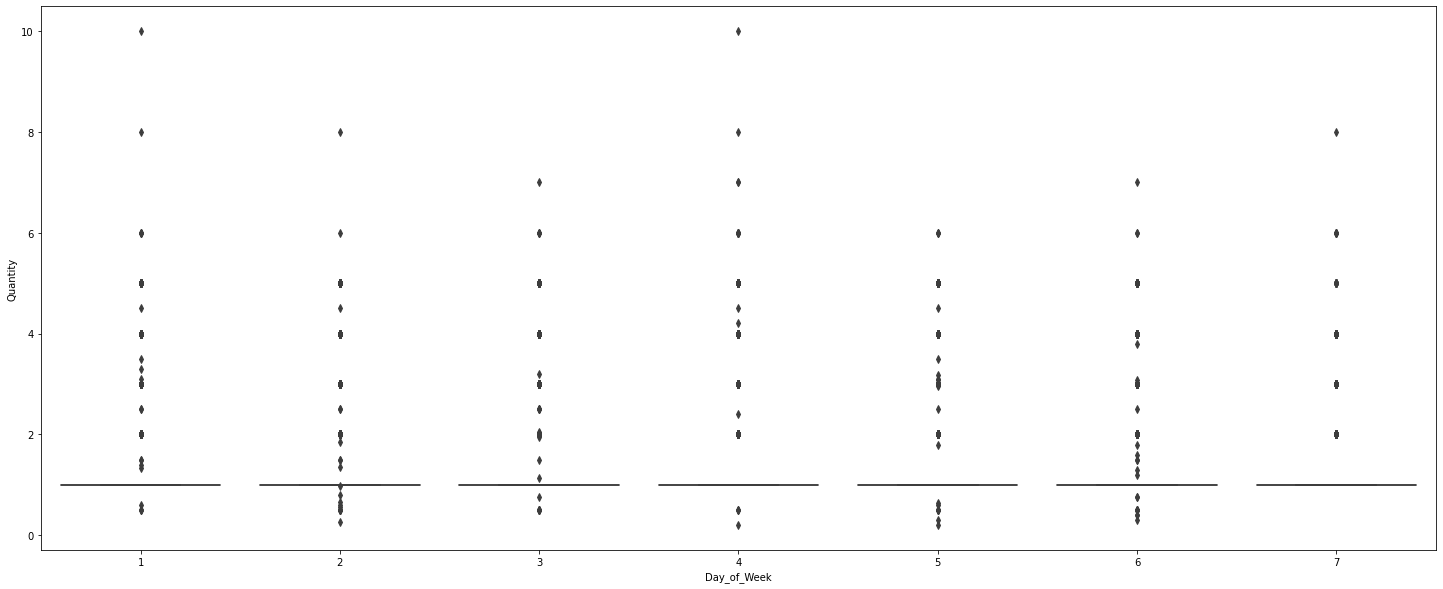

In [168]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Day_of_Week", y = "Quantity", data = dff_outlier_detected);

* İstatistiki olarak yorumladığımız bu sonucun genel açıklaması şudur;
    * Haftanın herbir gününün satış adet ortalamaları ve medyanları birbirinden farklıdır. Adet bazında satış miktarının PERŞEMBE, CUMA VE CUMARTESİ günleri arttığı görülmekte olup istatistiki açında bir farklılık vardır. Tesadüfi olmayarak gerçekleştiği bilimsel olarak değerlendirilebilir. Bu günlerde düşük fiyatlı ürünlere reklam ve kampanya planlanması ile birlikte stok arttırımı yapılması tavsiye edilmektedir.

## 3- Month of Year Anova Analizi

### -- Total Bazlı Analiz

In [169]:
dff_outlier_detected["Month_of_Year"].value_counts()

4     7743
3     5386
5     4052
2     3285
1     3168
6     3138
12    2997
11    2961
10    2914
8     2639
9     2146
7     1930
Name: Month_of_Year, dtype: int64

In [170]:
dff_Total_Month_of_Year_1 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 1]
dff_Total_Month_of_Year_2 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 2]
dff_Total_Month_of_Year_3 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 3]
dff_Total_Month_of_Year_4 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 4]
dff_Total_Month_of_Year_5 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 5]
dff_Total_Month_of_Year_6 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 6]
dff_Total_Month_of_Year_7 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 7]
dff_Total_Month_of_Year_8 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 8]
dff_Total_Month_of_Year_9 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 9]
dff_Total_Month_of_Year_10 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 10]
dff_Total_Month_of_Year_11 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 11]
dff_Total_Month_of_Year_12 = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"] == 12]


### Normallik Varsayımı

In [171]:

for j in dff_outlier_detected["Month_of_Year"].value_counts().index:
    namee = "dff_"+str(j)
    name = "dff_"+str(j)
    name = dff_outlier_detected["Total"][dff_outlier_detected["Month_of_Year"]== j]
    if name.shape[0] < 5000:
        jb, p = stats.shapiro(name) 
        alpha = 0.05
        print(namee)
        print(name.shape)
        print("Test istatistik değeri = {}".format(jb))
        print("p değeri = {}".format(p))
        if p > alpha:
            print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
        else:
            print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
        print("---------------------------------------------------------")
    else:
        jb, p = stats.jarque_bera(name) 
        alpha = 0.05
        print(namee)
        print(name.shape)
        print("Test istatistik değeri = {}".format(jb))
        print("p değeri = {}".format(p))
        if p > alpha:
            print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
        else:
            print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
        print("---------------------------------------------------------")




dff_4
(7743,)
Test istatistik değeri = 1942.864900798571
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
---------------------------------------------------------
dff_3
(5386,)
Test istatistik değeri = 1072.0497447753226
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
---------------------------------------------------------
dff_5
(4052,)
Test istatistik değeri = 0.9036592245101929
p değeri = 7.006492321624085e-45
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
---------------------------------------------------------
dff_2
(3285,)
Test istatistik değeri = 0.9168509244918823
p değeri = 3.2602315798303686e-39
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
---------------------------------------------------------
dff_1
(3168,)
Test istatistik değeri

### Varyans Homojenliği Varsayımı

H0: Varyanslar homojendir.

H1: Varyanslar homojen değildir.

#### Barttlett Testi

In [172]:
stats.bartlett(dff_Total_Month_of_Year_1, dff_Total_Month_of_Year_2, dff_Total_Month_of_Year_3, dff_Total_Month_of_Year_4, 
               dff_Total_Month_of_Year_5, dff_Total_Month_of_Year_6, dff_Total_Month_of_Year_7, dff_Total_Month_of_Year_8,
               dff_Total_Month_of_Year_9, dff_Total_Month_of_Year_10, dff_Total_Month_of_Year_11, dff_Total_Month_of_Year_12)

BartlettResult(statistic=315.00403370320385, pvalue=6.014237193491193e-61)

In [173]:
test, p = stats.bartlett(dff_Total_Month_of_Year_1, dff_Total_Month_of_Year_2, dff_Total_Month_of_Year_3, dff_Total_Month_of_Year_4, 
               dff_Total_Month_of_Year_5, dff_Total_Month_of_Year_6, dff_Total_Month_of_Year_7, dff_Total_Month_of_Year_8,
               dff_Total_Month_of_Year_9, dff_Total_Month_of_Year_10, dff_Total_Month_of_Year_11, dff_Total_Month_of_Year_12)
alpha = 0.05

print("Barttlett Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Barttlett Testi
Test istatistik değeri = 315.00403370320385
p değeri = 6.014237193491193e-61
H1: Varyanslar homojen değildir.


#### Levene Testi

In [174]:
stats.levene(dff_Total_Month_of_Year_1, dff_Total_Month_of_Year_2, dff_Total_Month_of_Year_3, dff_Total_Month_of_Year_4, 
               dff_Total_Month_of_Year_5, dff_Total_Month_of_Year_6, dff_Total_Month_of_Year_7, dff_Total_Month_of_Year_8,
               dff_Total_Month_of_Year_9, dff_Total_Month_of_Year_10, dff_Total_Month_of_Year_11, dff_Total_Month_of_Year_12)

LeveneResult(statistic=33.00161704444558, pvalue=8.876521754961128e-71)

In [175]:
test, p = stats.levene(dff_Total_Month_of_Year_1, dff_Total_Month_of_Year_2, dff_Total_Month_of_Year_3, dff_Total_Month_of_Year_4, 
               dff_Total_Month_of_Year_5, dff_Total_Month_of_Year_6, dff_Total_Month_of_Year_7, dff_Total_Month_of_Year_8,
               dff_Total_Month_of_Year_9, dff_Total_Month_of_Year_10, dff_Total_Month_of_Year_11, dff_Total_Month_of_Year_12)
alpha = 0.05

print("Levene Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Levene Testi
Test istatistik değeri = 33.00161704444558
p değeri = 8.876521754961128e-71
H1: Varyanslar homojen değildir.


* Normallik testleri sonucu yılın herbir ayının satış ciro miktarları dağılımının normal dağılıma yaklaşmadığı ayrıca varyanslarının da homojen olmadığı görülmüştür. Varsayımlardan olan normallik varsayımı gerçeklemediğinden non-parametrik varyans analizi metodu olan "Kruskal Wallis" testini uygulayacağız.

### Hipotez Testi

* Ho: Yılın herbir ayının satış ciro ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik YOKTUR.
* H1: Yılın herbir ayının satış ciro ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik VARDIR. (En az birinde)

In [176]:
#Non Parametrik Hipotez Testi

from scipy.stats import kruskal

kruskal(dff_Total_Month_of_Year_1, dff_Total_Month_of_Year_2, dff_Total_Month_of_Year_3, dff_Total_Month_of_Year_4, 
               dff_Total_Month_of_Year_5, dff_Total_Month_of_Year_6, dff_Total_Month_of_Year_7, dff_Total_Month_of_Year_8,
               dff_Total_Month_of_Year_9, dff_Total_Month_of_Year_10, dff_Total_Month_of_Year_11, dff_Total_Month_of_Year_12)

KruskalResult(statistic=1429.2600869403393, pvalue=5.852804089242108e-300)

* Ho hipotezi reddedilir. Yani Yılın herbir ayının satış ciro ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik VARDIR.

In [177]:
# Mean
ll = ([dff_Total_Month_of_Year_1.mean(), dff_Total_Month_of_Year_2.mean(), dff_Total_Month_of_Year_3.mean(), 
       dff_Total_Month_of_Year_4.mean(), dff_Total_Month_of_Year_5.mean(), dff_Total_Month_of_Year_6.mean(), 
       dff_Total_Month_of_Year_7.mean(), dff_Total_Month_of_Year_8.mean(), dff_Total_Month_of_Year_9.mean(), 
       dff_Total_Month_of_Year_10.mean(), dff_Total_Month_of_Year_11.mean(), dff_Total_Month_of_Year_12.mean()])

mean_sales_monthly = pd.DataFrame(ll, index =["dff_Total_Month_of_Year_1","dff_Total_Month_of_Year_2","dff_Total_Month_of_Year_3",
                         "dff_Total_Month_of_Year_4","dff_Total_Month_of_Year_5","dff_Total_Month_of_Year_6","dff_Total_Month_of_Year_7",
                         "dff_Total_Month_of_Year_8","dff_Total_Month_of_Year_9","dff_Total_Month_of_Year_10","dff_Total_Month_of_Year_11",
                         "dff_Total_Month_of_Year_12"], columns = ["Mean"]).sort_values(by = "Mean", ascending = False)

import dataframe_image as dfi
df_styled = mean_sales_monthly.style.background_gradient() #adding a gradient based on values in cell
dfi.export(mean_sales_monthly,"mean_sales_monthly.png")
mean_sales_monthly

Mean
dff_Total_Month_of_Year_10 13.9262
dff_Total_Month_of_Year_9  13.4152
dff_Total_Month_of_Year_8  13.0896
dff_Total_Month_of_Year_12 13.0782
dff_Total_Month_of_Year_11 12.9494
dff_Total_Month_of_Year_7  12.8054
dff_Total_Month_of_Year_1  12.5615
dff_Total_Month_of_Year_2  11.5984
dff_Total_Month_of_Year_3  11.3968
dff_Total_Month_of_Year_4  10.7328
dff_Total_Month_of_Year_6  10.5561
dff_Total_Month_of_Year_5  10.1966

In [178]:
# Median
ll = ([dff_Total_Month_of_Year_1.median(), dff_Total_Month_of_Year_2.median(), dff_Total_Month_of_Year_3.median(), 
       dff_Total_Month_of_Year_4.median(), dff_Total_Month_of_Year_5.median(), dff_Total_Month_of_Year_6.median(), 
       dff_Total_Month_of_Year_7.median(), dff_Total_Month_of_Year_8.median(), dff_Total_Month_of_Year_9.median(), 
       dff_Total_Month_of_Year_10.median(), dff_Total_Month_of_Year_11.median(), dff_Total_Month_of_Year_12.median()])

median_sales_monthly = pd.DataFrame(ll, index =["dff_Total_Month_of_Year_1","dff_Total_Month_of_Year_2","dff_Total_Month_of_Year_3",
                         "dff_Total_Month_of_Year_4","dff_Total_Month_of_Year_5","dff_Total_Month_of_Year_6","dff_Total_Month_of_Year_7",
                         "dff_Total_Month_of_Year_8","dff_Total_Month_of_Year_9","dff_Total_Month_of_Year_10","dff_Total_Month_of_Year_11",
                         "dff_Total_Month_of_Year_12"], columns = ["Median"]).sort_values(by = "Median", ascending = False)

import dataframe_image as dfi
df_styled = median_sales_monthly.style.background_gradient() #adding a gradient based on values in cell
dfi.export(median_sales_monthly,"median_sales_monthly.png")
median_sales_monthly

Median
dff_Total_Month_of_Year_10 12.5924
dff_Total_Month_of_Year_9  12.1402
dff_Total_Month_of_Year_7  11.6822
dff_Total_Month_of_Year_8  11.6822
dff_Total_Month_of_Year_12 11.6800
dff_Total_Month_of_Year_11 11.4190
dff_Total_Month_of_Year_1  11.1200
dff_Total_Month_of_Year_2   9.4000
dff_Total_Month_of_Year_3   9.3400
dff_Total_Month_of_Year_6   9.2500
dff_Total_Month_of_Year_4   8.9700
dff_Total_Month_of_Year_5   8.4000

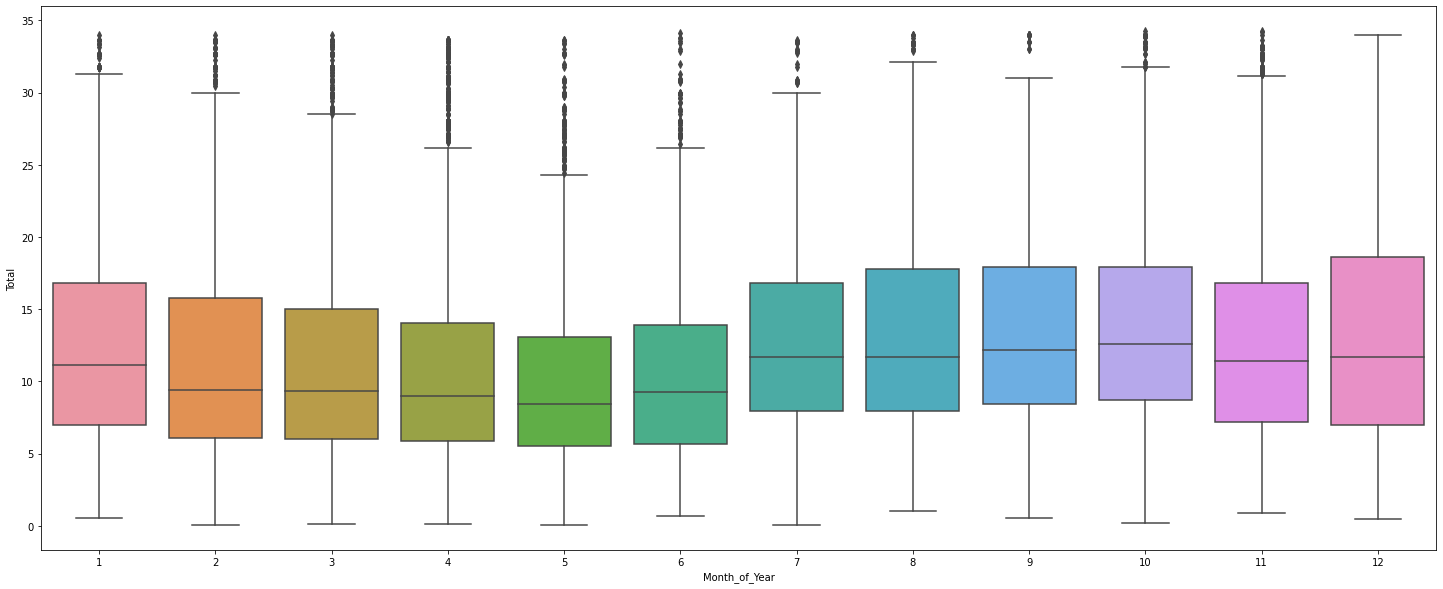

In [179]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Month_of_Year", y = "Total", data = dff_outlier_detected);
plt.savefig("monthly_sales_boxplot.png")

* İstatistiki olarak yorumladığımız bu sonucun genel açıklaması şudur;
    * Yılın herbir ayının satış gelir ortalamaları ve medyanları birbirinden farklıdır. Ciro bazında aylık satış ortalamalarının yılın son 6 ayında arttığı görülmekte olup istatistiki açıdan bir farklılık vardır. Tesadüfi olmayarak gerçekleştiği bilimsel olarak değerlendirilebilir. Ay bazında ciro  kıyaslaması yapıldığında yılın son 6 ayına yönelik özel reklam ve yatırım yapılması tavsiye edilir.

### -- Quantity Analiz

In [180]:
dff_outlier_detected["Month_of_Year"].value_counts()

4     7743
3     5386
5     4052
2     3285
1     3168
6     3138
12    2997
11    2961
10    2914
8     2639
9     2146
7     1930
Name: Month_of_Year, dtype: int64

In [181]:
dff_Total_Month_of_Year_1 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 1]
dff_Total_Month_of_Year_2 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 2]
dff_Total_Month_of_Year_3 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 3]
dff_Total_Month_of_Year_4 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 4]
dff_Total_Month_of_Year_5 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 5]
dff_Total_Month_of_Year_6 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 6]
dff_Total_Month_of_Year_7 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 7]
dff_Total_Month_of_Year_8 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 8]
dff_Total_Month_of_Year_9 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 9]
dff_Total_Month_of_Year_10 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 10]
dff_Total_Month_of_Year_11 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 11]
dff_Total_Month_of_Year_12 = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"] == 12]


### Normallik Varsayımı

In [182]:

for j in dff_outlier_detected["Month_of_Year"].value_counts().index:
    namee = "dff_"+str(j)
    name = "dff_"+str(j)
    name = dff_outlier_detected["Quantity"][dff_outlier_detected["Month_of_Year"]== j]
    if name.shape[0] < 5000:
        jb, p = stats.shapiro(name) 
        alpha = 0.05
        print(namee)
        print(name.shape)
        print("Test istatistik değeri = {}".format(jb))
        print("p değeri = {}".format(p))
        if p > alpha:
            print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
        else:
            print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
        print("---------------------------------------------------------")
    else:
        jb, p = stats.jarque_bera(name) 
        alpha = 0.05
        print(namee)
        print(name.shape)
        print("Test istatistik değeri = {}".format(jb))
        print("p değeri = {}".format(p))
        if p > alpha:
            print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
        else:
            print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
        print("---------------------------------------------------------")




dff_4
(7743,)
Test istatistik değeri = 348305.56356617226
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
---------------------------------------------------------
dff_3
(5386,)
Test istatistik değeri = 63779.224757422395
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
---------------------------------------------------------
dff_5
(4052,)
Test istatistik değeri = 0.4162524342536926
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
---------------------------------------------------------
dff_2
(3285,)
Test istatistik değeri = 0.4165313243865967
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
---------------------------------------------------------
dff_1
(3168,)
Test istatistik değeri = 0.39334630966186523
p değeri = 0.

### Varyans Homojenliği Varsayımı

H0: Varyanslar homojendir.

H1: Varyanslar homojen değildir.

#### Barttlett Testi

In [183]:
stats.bartlett(dff_Total_Month_of_Year_1, dff_Total_Month_of_Year_2, dff_Total_Month_of_Year_3, dff_Total_Month_of_Year_4, 
               dff_Total_Month_of_Year_5, dff_Total_Month_of_Year_6, dff_Total_Month_of_Year_7, dff_Total_Month_of_Year_8,
               dff_Total_Month_of_Year_9, dff_Total_Month_of_Year_10, dff_Total_Month_of_Year_11, dff_Total_Month_of_Year_12)

BartlettResult(statistic=386.6823624773222, pvalue=4.099852152483953e-76)

In [184]:
test, p = stats.bartlett(dff_Total_Month_of_Year_1, dff_Total_Month_of_Year_2, dff_Total_Month_of_Year_3, dff_Total_Month_of_Year_4, 
               dff_Total_Month_of_Year_5, dff_Total_Month_of_Year_6, dff_Total_Month_of_Year_7, dff_Total_Month_of_Year_8,
               dff_Total_Month_of_Year_9, dff_Total_Month_of_Year_10, dff_Total_Month_of_Year_11, dff_Total_Month_of_Year_12)
alpha = 0.05

print("Barttlett Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Barttlett Testi
Test istatistik değeri = 386.6823624773222
p değeri = 4.099852152483953e-76
H1: Varyanslar homojen değildir.


#### Levene Testi

In [185]:
stats.levene(dff_Total_Month_of_Year_1, dff_Total_Month_of_Year_2, dff_Total_Month_of_Year_3, dff_Total_Month_of_Year_4, 
               dff_Total_Month_of_Year_5, dff_Total_Month_of_Year_6, dff_Total_Month_of_Year_7, dff_Total_Month_of_Year_8,
               dff_Total_Month_of_Year_9, dff_Total_Month_of_Year_10, dff_Total_Month_of_Year_11, dff_Total_Month_of_Year_12)

LeveneResult(statistic=5.098383347426536, pvalue=4.9728412992631465e-08)

In [186]:
test, p = stats.levene(dff_Total_Month_of_Year_1, dff_Total_Month_of_Year_2, dff_Total_Month_of_Year_3, dff_Total_Month_of_Year_4, 
               dff_Total_Month_of_Year_5, dff_Total_Month_of_Year_6, dff_Total_Month_of_Year_7, dff_Total_Month_of_Year_8,
               dff_Total_Month_of_Year_9, dff_Total_Month_of_Year_10, dff_Total_Month_of_Year_11, dff_Total_Month_of_Year_12)
alpha = 0.05

print("Levene Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Levene Testi
Test istatistik değeri = 5.098383347426536
p değeri = 4.9728412992631465e-08
H1: Varyanslar homojen değildir.


* Normallik testleri sonucu yılın herbir ayının satış miktarları dağılımının normal dağılıma yaklaşmadığı ayrıca varyanslarının da homojen olmadığı görülmüştür. Varsayımlardan olan normallik varsayımı gerçeklemediğinden non-parametrik varyans analizi metodu olan "Kruskal Wallis" testini uygulayacağız.

### Hipotez Testi

* Ho: Haftanın herbir gününün satış adet ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik YOKTUR.
* H1: haftanın herbir gününün satış adet ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik VARDIR. (En az birinde)

In [187]:
#Non Parametrik Hipotez Testi

from scipy.stats import kruskal

kruskal(dff_Total_Month_of_Year_1, dff_Total_Month_of_Year_2, dff_Total_Month_of_Year_3, dff_Total_Month_of_Year_4, 
               dff_Total_Month_of_Year_5, dff_Total_Month_of_Year_6, dff_Total_Month_of_Year_7, dff_Total_Month_of_Year_8,
               dff_Total_Month_of_Year_9, dff_Total_Month_of_Year_10, dff_Total_Month_of_Year_11, dff_Total_Month_of_Year_12)

KruskalResult(statistic=53.20429801258913, pvalue=1.6480507188734461e-07)

* Ho hipotezi reddedilir. Yani haftanın herbir gününün satış adet ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik VARDIR.

In [188]:
# Mean
ll = ([dff_Total_Month_of_Year_1.mean(), dff_Total_Month_of_Year_2.mean(), dff_Total_Month_of_Year_3.mean(), 
       dff_Total_Month_of_Year_4.mean(), dff_Total_Month_of_Year_5.mean(), dff_Total_Month_of_Year_6.mean(), 
       dff_Total_Month_of_Year_7.mean(), dff_Total_Month_of_Year_8.mean(), dff_Total_Month_of_Year_9.mean(), 
       dff_Total_Month_of_Year_10.mean(), dff_Total_Month_of_Year_11.mean(), dff_Total_Month_of_Year_12.mean()])

mean_quantity_monthly = pd.DataFrame(ll, index =["dff_Total_Month_of_Year_1","dff_Total_Month_of_Year_2","dff_Total_Month_of_Year_3",
                         "dff_Total_Month_of_Year_4","dff_Total_Month_of_Year_5","dff_Total_Month_of_Year_6","dff_Total_Month_of_Year_7",
                         "dff_Total_Month_of_Year_8","dff_Total_Month_of_Year_9","dff_Total_Month_of_Year_10","dff_Total_Month_of_Year_11",
                         "dff_Total_Month_of_Year_12"], columns = ["Mean"]).sort_values(by = "Mean", ascending = False)

import dataframe_image as dfi
df_styled = mean_quantity_monthly.style.background_gradient() #adding a gradient based on values in cell
dfi.export(mean_quantity_monthly,"mean_quantity_monthly.png")
mean_quantity_monthly

Mean
dff_Total_Month_of_Year_3  1.2466
dff_Total_Month_of_Year_2  1.2260
dff_Total_Month_of_Year_1  1.2192
dff_Total_Month_of_Year_8  1.2182
dff_Total_Month_of_Year_6  1.2056
dff_Total_Month_of_Year_10 1.2031
dff_Total_Month_of_Year_7  1.2030
dff_Total_Month_of_Year_5  1.2028
dff_Total_Month_of_Year_12 1.1961
dff_Total_Month_of_Year_9  1.1874
dff_Total_Month_of_Year_4  1.1816
dff_Total_Month_of_Year_11 1.1755

In [189]:
# Median
ll = ([dff_Total_Month_of_Year_1.median(), dff_Total_Month_of_Year_2.median(), dff_Total_Month_of_Year_3.median(), 
       dff_Total_Month_of_Year_4.median(), dff_Total_Month_of_Year_5.median(), dff_Total_Month_of_Year_6.median(), 
       dff_Total_Month_of_Year_7.median(), dff_Total_Month_of_Year_8.median(), dff_Total_Month_of_Year_9.median(), 
       dff_Total_Month_of_Year_10.median(), dff_Total_Month_of_Year_11.median(), dff_Total_Month_of_Year_12.median()])

median_quantity_monthly = pd.DataFrame(ll, index =["dff_Total_Month_of_Year_1","dff_Total_Month_of_Year_2","dff_Total_Month_of_Year_3",
                         "dff_Total_Month_of_Year_4","dff_Total_Month_of_Year_5","dff_Total_Month_of_Year_6","dff_Total_Month_of_Year_7",
                         "dff_Total_Month_of_Year_8","dff_Total_Month_of_Year_9","dff_Total_Month_of_Year_10","dff_Total_Month_of_Year_11",
                         "dff_Total_Month_of_Year_12"], columns = ["Median"]).sort_values(by = "Median", ascending = False)


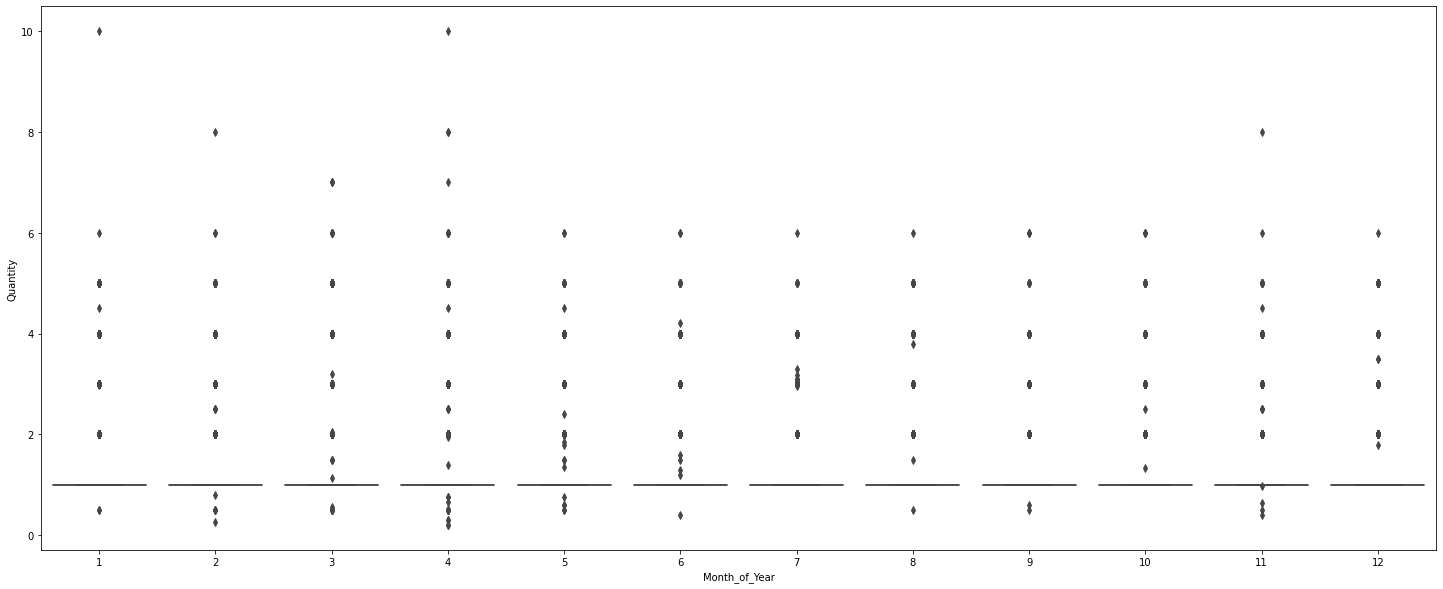

In [190]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Month_of_Year", y = "Quantity", data = dff_outlier_detected);

* İstatistiki olarak yorumladığımız bu sonucun genel açıklaması şudur;
    * Yılın herbir ayının satış adet ortalamaları ve medyanları birbirinden farklıdır. Adet bazında satış miktarının ilk üç ayda arttığı görülmekte olup istatistiki açıdan bir farklılık vardır. Tesadüfi olmayarak gerçekleştiği bilimsel olarak değerlendirilebilir. Ay bazında adet satışları kıyaslaması yapıldığında OCAK, ŞUBAT, MART ve AĞUSTOS aylarında düşük fiyatlı ürünlere reklam ve kampanya planlanması ile birlikte stok arttırımı yapılması tavsiye edilmektedir.

## 3- Subcategory Anova Analizi

H0: Subcategory ortalamalari arasinda istatistiksel olarak anlamlı bir farklilik yoktur.

H1: Fark vardir. (En az birisi farklıdır.)

In [191]:
dff_outlier_detected["Subcategory"]

0             HONIG
1        ZEYTINYAGI
2             HONIG
3             HONIG
4             HONIG
            ...    
44756         RECEL
44757         RECEL
44758         RECEL
44759         RECEL
44760         RECEL
Name: Subcategory, Length: 42359, dtype: object

In [192]:
dff_outlier_detected["Subcategory"].value_counts()

PEYNIR CESITLERI                                   3309
BAKLAVA VE TATLI CESITLERI                         2553
PEKMEZ-TAHIN-TAHIN HELVASI                         2422
HURMA                                              2247
ZEYTIN CESITLERI                                   2091
HASELNUSS                                          2070
WALNUSS                                            2065
MUTFAK ICIN YEMEKLIK URUNLER                       2002
SIRUP                                              1916
HONIG                                              1876
MEYVE KURUSU                                       1523
SUCUK VE ET URUNLERI                               1384
ESSKESTANIEN                                       1329
HASELNUSSCREME                                     1309
SEBZE VE MEYVE KURUSU                              1124
WABENHONIG                                         1121
ZEYTINYAGI                                         1023
DIGER CEREZ                                     

### Normallik Varsayımı

In [193]:

for j in dff_outlier_detected["Subcategory"].value_counts().index:
    namee = "dff_"+j
    name = "dff_"+j
    name = dff_outlier_detected["Total"][dff_outlier_detected["Subcategory"]== j]
    if name.shape[0] < 5000:
        jb, p = stats.shapiro(name) 
        alpha = 0.05
        print(namee)
        print(name.shape)
        print("Test istatistik değeri = {}".format(jb))
        print("p değeri = {}".format(p))
        if p > alpha:
            print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
        else:
            print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
        print("---------------------------------------------------------")
    else:
        jb, p = stats.jarque_bera(name) 
        alpha = 0.05
        print(namee)
        print(name.shape)
        print("Test istatistik değeri = {}".format(jb))
        print("p değeri = {}".format(p))
        if p > alpha:
            print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
        else:
            print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')
        print("---------------------------------------------------------")




dff_PEYNIR CESITLERI
(3309,)
Test istatistik değeri = 0.8662642240524292
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
---------------------------------------------------------
dff_BAKLAVA VE TATLI CESITLERI
(2553,)
Test istatistik değeri = 0.9506193399429321
p değeri = 1.6465556299900171e-28
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
---------------------------------------------------------
dff_PEKMEZ-TAHIN-TAHIN HELVASI
(2422,)
Test istatistik değeri = 0.9215366840362549
p değeri = 8.9390201585342e-34
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
---------------------------------------------------------
dff_HURMA
(2247,)
Test istatistik değeri = 0.9480750560760498
p değeri = 1.797588861788187e-27
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.
--------

### Varyans Homojenliği Varsayımı

H0: Varyanslar homojendir.

H1: Varyanslar homojen değildir.

In [194]:
#stats.bartlett(dff_paypal,dff_banka_havalesi,dff_kreditkart,dff_sofort,dff_other,dff_sepa,dff_giropay,dff_apple_pay)
d = {} 
subcat = []
for sub in dff_outlier_detected["Subcategory"].value_counts().index:
    d[sub] = dff_outlier_detected["Total"][dff_outlier_detected["Subcategory"]== sub]
    subcat.append(sub)
    

In [195]:
len(subcat)

42

#### Barttlett Testi

In [196]:
stats.bartlett(d[subcat[0]], d[subcat[1]], d[subcat[2]], d[subcat[3]], d[subcat[4]], d[subcat[5]], d[subcat[6]], d[subcat[7]],  
              d[subcat[8]], d[subcat[9]], d[subcat[10]], d[subcat[11]], d[subcat[12]], d[subcat[13]], d[subcat[14]], d[subcat[15]], 
              d[subcat[16]], d[subcat[17]], d[subcat[18]], d[subcat[19]], d[subcat[20]], d[subcat[21]], d[subcat[22]], d[subcat[23]], 
              d[subcat[-18]], d[subcat[-17]], d[subcat[-16]], d[subcat[-15]], d[subcat[-14]], d[subcat[-13]], d[subcat[-12]], d[subcat[-11]],  
              d[subcat[-10]], d[subcat[-9]], d[subcat[-8]], d[subcat[-7]], d[subcat[-6]], d[subcat[-5]], d[subcat[-4]], d[subcat[-3]], 
              d[subcat[-2]], d[subcat[-1]])

BartlettResult(statistic=2370.4208549729847, pvalue=0.0)

In [197]:
test, p = stats.bartlett(d[subcat[0]], d[subcat[1]], d[subcat[2]], d[subcat[3]], d[subcat[4]], d[subcat[5]], d[subcat[6]], d[subcat[7]],  
              d[subcat[8]], d[subcat[9]], d[subcat[10]], d[subcat[11]], d[subcat[12]], d[subcat[13]], d[subcat[14]], d[subcat[15]], 
              d[subcat[16]], d[subcat[17]], d[subcat[18]], d[subcat[19]], d[subcat[20]], d[subcat[21]], d[subcat[22]], d[subcat[23]], 
              d[subcat[-18]], d[subcat[-17]], d[subcat[-16]], d[subcat[-15]], d[subcat[-14]], d[subcat[-13]], d[subcat[-12]], d[subcat[-11]],  
              d[subcat[-10]], d[subcat[-9]], d[subcat[-8]], d[subcat[-7]], d[subcat[-6]], d[subcat[-5]], d[subcat[-4]], d[subcat[-3]], 
              d[subcat[-2]], d[subcat[-1]])
alpha = 0.05

print("Barttlett Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Barttlett Testi
Test istatistik değeri = 2370.4208549729847
p değeri = 0.0
H1: Varyanslar homojen değildir.


#### Levene Testi

In [198]:
stats.levene(d[subcat[0]], d[subcat[1]], d[subcat[2]], d[subcat[3]], d[subcat[4]], d[subcat[5]], d[subcat[6]], d[subcat[7]],  
              d[subcat[8]], d[subcat[9]], d[subcat[10]], d[subcat[11]], d[subcat[12]], d[subcat[13]], d[subcat[14]], d[subcat[15]], 
              d[subcat[16]], d[subcat[17]], d[subcat[18]], d[subcat[19]], d[subcat[20]], d[subcat[21]], d[subcat[22]], d[subcat[23]], 
              d[subcat[-18]], d[subcat[-17]], d[subcat[-16]], d[subcat[-15]], d[subcat[-14]], d[subcat[-13]], d[subcat[-12]], d[subcat[-11]],  
              d[subcat[-10]], d[subcat[-9]], d[subcat[-8]], d[subcat[-7]], d[subcat[-6]], d[subcat[-5]], d[subcat[-4]], d[subcat[-3]], 
              d[subcat[-2]], d[subcat[-1]])

LeveneResult(statistic=57.99243017427171, pvalue=0.0)

In [199]:
test, p = stats.levene(d[subcat[0]], d[subcat[1]], d[subcat[2]], d[subcat[3]], d[subcat[4]], d[subcat[5]], d[subcat[6]], d[subcat[7]],  
              d[subcat[8]], d[subcat[9]], d[subcat[10]], d[subcat[11]], d[subcat[12]], d[subcat[13]], d[subcat[14]], d[subcat[15]], 
              d[subcat[16]], d[subcat[17]], d[subcat[18]], d[subcat[19]], d[subcat[20]], d[subcat[21]], d[subcat[22]], d[subcat[23]], 
              d[subcat[-18]], d[subcat[-17]], d[subcat[-16]], d[subcat[-15]], d[subcat[-14]], d[subcat[-13]], d[subcat[-12]], d[subcat[-11]],  
              d[subcat[-10]], d[subcat[-9]], d[subcat[-8]], d[subcat[-7]], d[subcat[-6]], d[subcat[-5]], d[subcat[-4]], d[subcat[-3]], 
              d[subcat[-2]], d[subcat[-1]])
alpha = 0.05

print("Levene Testi")
print("Test istatistik değeri = {}".format(test))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0: Varyanslar homojendir.')
else:
    print('H1: Varyanslar homojen değildir.')

Levene Testi
Test istatistik değeri = 57.99243017427171
p değeri = 0.0
H1: Varyanslar homojen değildir.


* Normallik testleri sonucu subcategory satış fiyatları dağılımının normal dağılıma yaklaşmadığı ve varyanslarının homojen olmadığı görülmüştür. Varsayımlar gerçeklemediğinden nonparametrik varyans analizi metodu olan "Kruskal Wallis" testini uygulayacağız.

### Hipotez Testi

* Ho: Subcategory satış ortalamalari ve medyanları arasinda istatistiksek olarak anlamlı bir farklilik YOKTUR.
* H1: Subcategory satış ortalamalari ve medyanları arasinda istatistiksek olarak anlamlı bir farklilik VARDIR. (En az birinde)

In [200]:
#Non Parametrik Hipotez Testi

from scipy.stats import kruskal

kruskal(d[subcat[0]], d[subcat[1]], d[subcat[2]], d[subcat[3]], d[subcat[4]], d[subcat[5]], d[subcat[6]], d[subcat[7]],  
              d[subcat[8]], d[subcat[9]], d[subcat[10]], d[subcat[11]], d[subcat[12]], d[subcat[13]], d[subcat[14]], d[subcat[15]], 
              d[subcat[16]], d[subcat[17]], d[subcat[18]], d[subcat[19]], d[subcat[20]], d[subcat[21]], d[subcat[22]], d[subcat[23]], 
              d[subcat[-18]], d[subcat[-17]], d[subcat[-16]], d[subcat[-15]], d[subcat[-14]], d[subcat[-13]], d[subcat[-12]], d[subcat[-11]],  
              d[subcat[-10]], d[subcat[-9]], d[subcat[-8]], d[subcat[-7]], d[subcat[-6]], d[subcat[-5]], d[subcat[-4]], d[subcat[-3]], 
              d[subcat[-2]], d[subcat[-1]])

KruskalResult(statistic=11087.765079352886, pvalue=0.0)

* Ho hipotezi reddedilir. Yani payment metodların satış ortalamalari ve medyanları arasinda istatistiksel olarak anlamlı bir farklilik vardır. (En az birinde)

In [201]:
# Mean
ll = ([d[subcat[0]].mean(), d[subcat[1]].mean(), d[subcat[2]].mean(), d[subcat[3]].mean(), d[subcat[4]].mean(), d[subcat[5]].mean(),
       d[subcat[6]].mean(), d[subcat[7]].mean(), d[subcat[8]].mean(), d[subcat[9]].mean(), d[subcat[10]].mean(), d[subcat[11]].mean(),
       d[subcat[12]].mean(), d[subcat[13]].mean(), d[subcat[14]].mean(), d[subcat[15]].mean(), d[subcat[16]].mean(), d[subcat[17]].mean(),
       d[subcat[18]].mean(), d[subcat[19]].mean(), d[subcat[20]].mean(), d[subcat[21]].mean(), d[subcat[22]].mean(), d[subcat[23]].mean(),
       d[subcat[-18]].mean(), d[subcat[-17]].mean(), d[subcat[-16]].mean(), d[subcat[-15]].mean(), d[subcat[-14]].mean(),
       d[subcat[-13]].mean(), d[subcat[-12]].mean(), d[subcat[-11]].mean(), d[subcat[-10]].mean(), d[subcat[-9]].mean(),
       d[subcat[-8]].mean(), d[subcat[-7]].mean(), d[subcat[-6]].mean(), d[subcat[-5]].mean(), d[subcat[-4]].mean(), d[subcat[-3]].mean(), 
       d[subcat[-2]].mean(), d[subcat[-1]].mean()])

mean_subcategory = pd.DataFrame(ll, index =subcat, columns = ["Mean"]).sort_values(by = "Mean", ascending = False)

import dataframe_image as dfi
df_styled = mean_subcategory.style.background_gradient() #adding a gradient based on values in cell
dfi.export(mean_subcategory,"mean_subcategory.png")
mean_subcategory


Mean
ESSKESTANIEN                                    18.0969
HASELNUSS                                       17.5994
WALNUSS                                         17.2397
WABENHONIG                                      16.8300
ZEYTINYAGI                                      15.9550
BAKLAVA VE TATLI CESITLERI                      15.4540
PISTACHIO                                       15.1538
HURMA                                           13.9077
DIGER CEREZ                                     13.7310
HONIG                                           13.1582
ERDNUSS                                         13.1423
KAHVE VE CAY CESITLERI                          11.7642
GLUTENSIZ UN VE KEK VE PASTA ICIN MEYVE TOZLARI 11.6719
CAY CESITLERI                                   11.4552
HASELNUSSCREME                                  11.4235
KAHVE CESITLERI                                 11.3921
SUCUK VE ET URUNLERI                            11.2422
SEBZE VE MEYVE KURUSU                           11.2371
MEYVESUYU                                       11.1503
BITKISEL GIDA TAKVIYESI                         11.0347
KAMPANYALI PAKET URUNLERI                       11.0308
KOZMETIK                                        10.4050
PEKMEZ-TAHIN-TAHIN HELVASI                      10.2083
SIRUP                                           10.0650
LOKUM                                           10.0294
ATISTIRMALIK LOKUM VE PESTIL                     9.9554
SALCA                                            9.4747
MEYVE KURUSU                                     9.3511
MUTFAK ICIN YEMEKLIK URUNLER                     9.0920
PESTIL                                           8.8820
PEYNIR CESITLERI                                 8.7331
ZEYTIN CESITLERI                                 8.5394
TEREYAGI                                         8.3258
SOS                                              7.8994
KREMA                                            7.5515
RECEL                                            6.9670
SIRKE                                            6.6487
SEBZE KURUSU                                     5.7023
EZME                                             5.6021
SUT URUNLERI                                     5.2279
KAYMAK                                           4.9882
BAHARATLAR                                       3.8349

In [202]:
# Median
ll = ([d[subcat[0]].median(), d[subcat[1]].median(), d[subcat[2]].median(), d[subcat[3]].median(), d[subcat[4]].median(), d[subcat[5]].median(),
       d[subcat[6]].median(), d[subcat[7]].median(), d[subcat[8]].median(), d[subcat[9]].median(), d[subcat[10]].median(), d[subcat[11]].median(),
       d[subcat[12]].median(), d[subcat[13]].median(), d[subcat[14]].median(), d[subcat[15]].median(), d[subcat[16]].median(), d[subcat[17]].median(),
       d[subcat[18]].median(), d[subcat[19]].median(), d[subcat[20]].median(), d[subcat[21]].median(), d[subcat[22]].median(), d[subcat[23]].median(),
       d[subcat[-18]].median(), d[subcat[-17]].median(), d[subcat[-16]].median(), d[subcat[-15]].median(), d[subcat[-14]].median(),
       d[subcat[-13]].median(), d[subcat[-12]].median(), d[subcat[-11]].median(), d[subcat[-10]].median(), d[subcat[-9]].median(),
       d[subcat[-8]].median(), d[subcat[-7]].median(), d[subcat[-6]].median(), d[subcat[-5]].median(), d[subcat[-4]].median(), d[subcat[-3]].median(), 
       d[subcat[-2]].median(), d[subcat[-1]].median()])


median_subcategory = pd.DataFrame(ll, index = subcat, columns = ["Median"]).sort_values(by = "Median", ascending = False)

import dataframe_image as dfi
df_styled = median_subcategory.style.background_gradient() #adding a gradient based on values in cell
dfi.export(median_subcategory,"median_subcategory.png")
median_subcategory

Median
ZEYTINYAGI                                      17.6355
HASELNUSS                                       16.6075
WALNUSS                                         16.5327
ESSKESTANIEN                                    16.3100
WABENHONIG                                      14.9400
MEYVESUYU                                       13.8571
BAKLAVA VE TATLI CESITLERI                      13.4112
DIGER CEREZ                                     12.8500
HURMA                                           12.5126
PISTACHIO                                       12.0000
HONIG                                           11.6800
ERDNUSS                                         11.6700
CAY CESITLERI                                   11.0093
KAHVE CESITLERI                                 10.6355
KAMPANYALI PAKET URUNLERI                       10.0500
HASELNUSSCREME                                   9.4952
SUCUK VE ET URUNLERI                             9.4650
GLUTENSIZ UN VE KEK VE PASTA ICIN MEYVE TOZLARI  9.3400
KAHVE VE CAY CESITLERI                           9.3400
SEBZE VE MEYVE KURUSU                            9.3400
LOKUM                                            9.3400
PEKMEZ-TAHIN-TAHIN HELVASI                       9.3364
KOZMETIK                                         9.3271
SIRUP                                            9.1494
MEYVE KURUSU                                     8.4100
BITKISEL GIDA TAKVIYESI                          8.4019
ATISTIRMALIK LOKUM VE PESTIL                     8.3200
MUTFAK ICIN YEMEKLIK URUNLER                     8.0700
SALCA                                            7.9400
TEREYAGI                                         7.5600
PESTIL                                           7.3320
PEYNIR CESITLERI                                 7.0200
ZEYTIN CESITLERI                                 7.0000
KREMA                                            6.0748
EZME                                             5.0100
SEBZE KURUSU                                     4.8000
RECEL                                            4.6700
SIRKE                                            4.0300
SOS                                              3.0000
BAHARATLAR                                       2.8000
KAYMAK                                           2.7944
SUT URUNLERI                                     1.9850

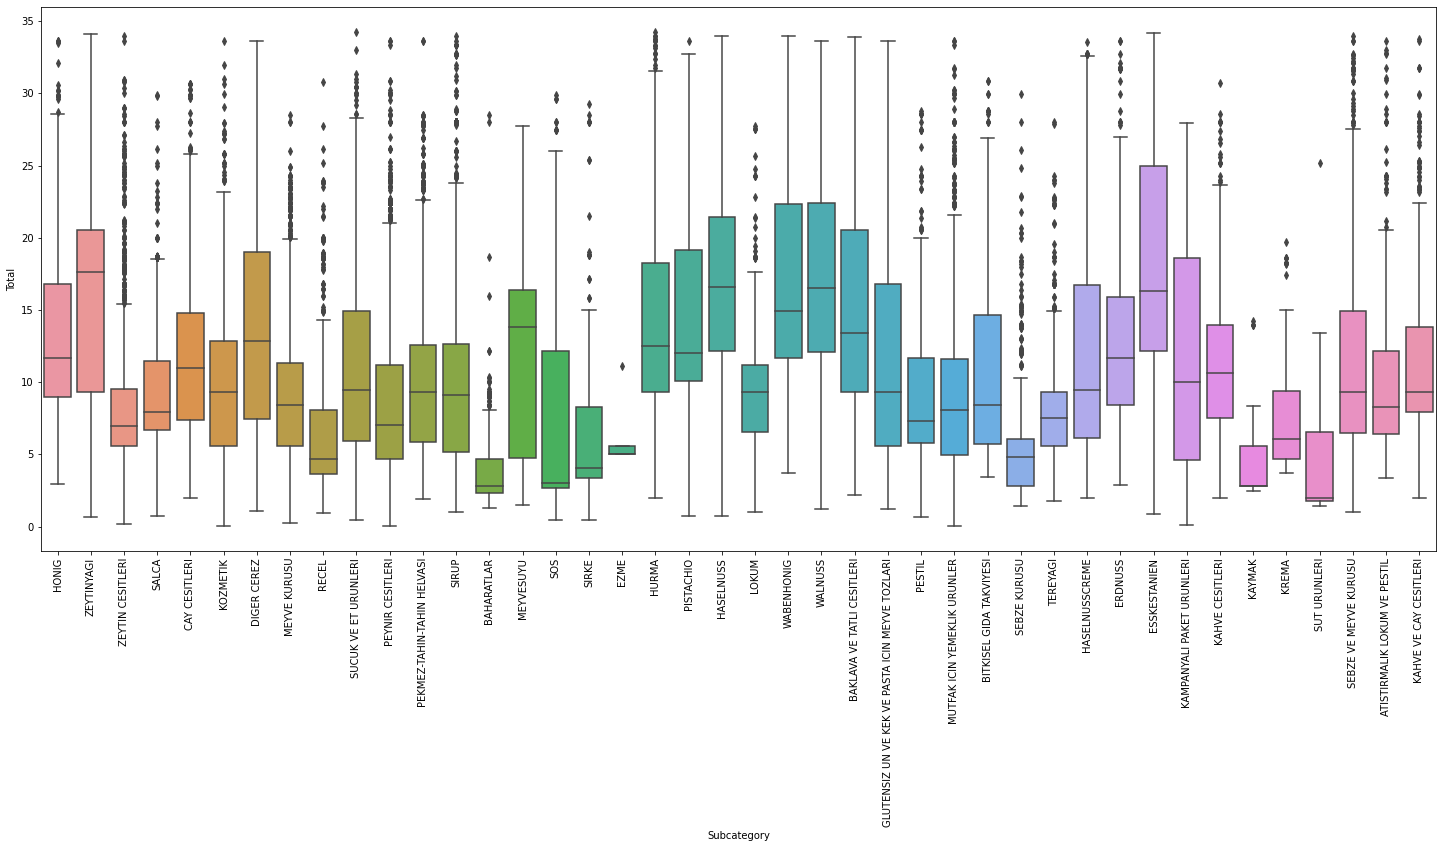

In [203]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Subcategory", y = "Total", data = dff_outlier_detected)
plt.xticks(rotation=90)
plt.savefig("subcategory_sales_boxplot.png")
plt.show()

* İstatistiki olarak yorumladığımız bu sonucun genel açıklaması şudur;
    * Subcategorilerin satış fiyatları(ciro) ortalamaları ve medyanları birbirinden farklıdır. ZEYTINYAGI, HASELNUSS, WALNUSS, ESSKESTANIEN VE WABENHONIG subcategorileri en yüksek ciro ortalaması ve medyana sahiptir. SOS, BAHARATLAR, KAYMAK ve SUT URUNLERI en düşük ciro ortalaması ve medyana sahiptir. 
    * Subcategori bazlı reklam, iskonto ve stok planlaması ciro ortalaması ve medyan büyüklüğüne göre planlanması tavsiye edilmektedir.

## Korelasyon Analizi <a class="anchor" id="korelasyon"></a>

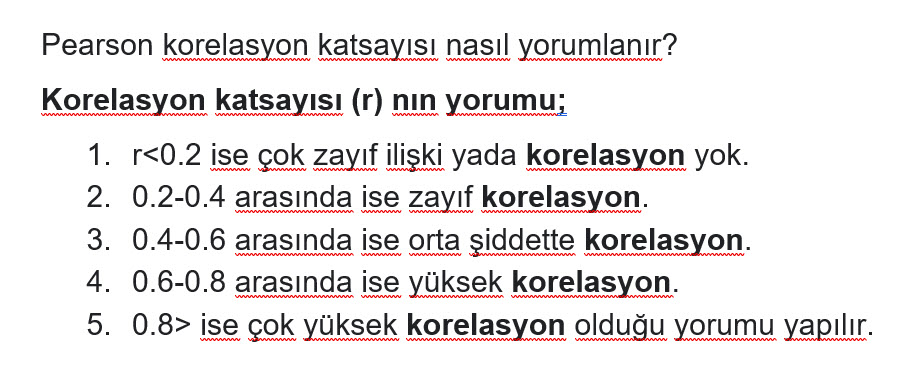

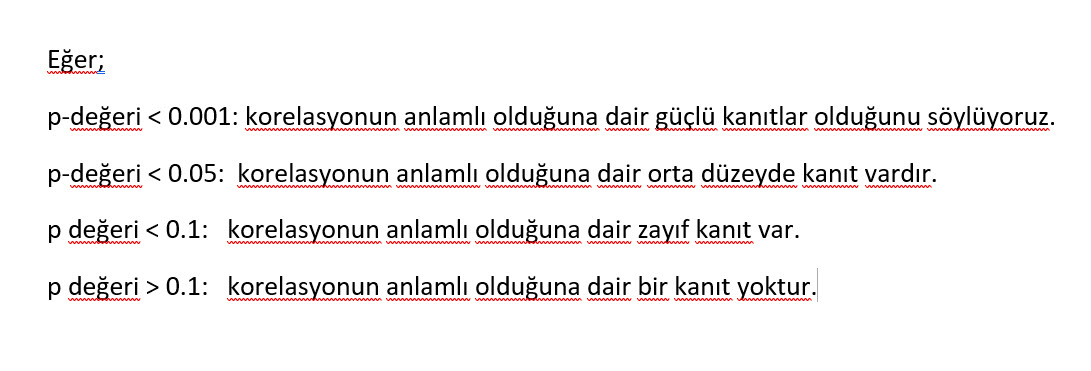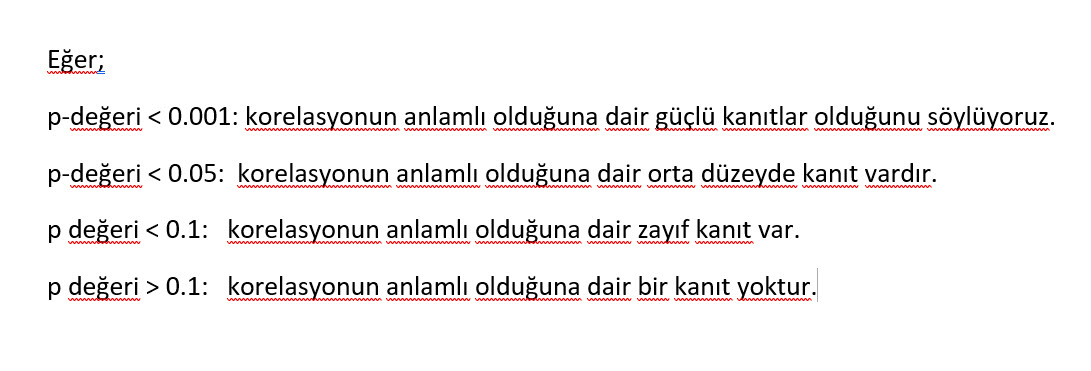

### Korelasyonun Anlamlılığının Testi

* Ho: ro == 0 (Değişkenler arasında korelasyon yoktur.)
* H1: ro != 0 (Değişkenler arasında anlamlı bir ilişki vardır.)

* Normallik varsayımı sağlanıyorsa Pearson Korelasyon Katsayısını kullanacağız.
* Normallik varsayımı sağlanmıyorsa Spearman Korelasyon Katsayısını kullanacağız.

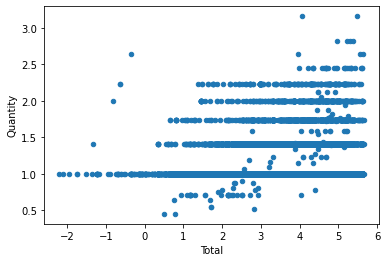

In [204]:
dff.plot.scatter("Total","Quantity");

#### Normallik Varsayımı

In [205]:
dff.Total.shape

(42359,)

* Gözlem sayılarımız 5000 den çok fazla olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [206]:
#Total

jb, p = stats.jarque_bera(dff.Total) 
alpha = 0.05
print("Total")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')

Total
Test istatistik değeri = 348.5463824092386
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


In [207]:
dff.Quantity.shape

(42359,)

* Gözlem sayılarımız 5000 den çok fazla olduğundan "Jarque Bera" normallik testi uygulanmıştır.

In [208]:
# Quantity

jb, p = stats.jarque_bera(dff.Quantity) 
alpha = 0.05
print("Profit")
print("Test istatistik değeri = {}".format(jb))
print("p değeri = {}".format(p))

if p > alpha:
    print('H0 hipotezi red edilemez. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt yoktur.')
else:
    print('H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.')

Profit
Test istatistik değeri = 266986.83783321275
p değeri = 0.0
H0 hipotezi red edilir. Verinin normal dağılıma sahip olmadığını söylemek için yeterli kanıt vardır.


* Quantity sütunu normal dağılıma yaklaştıramadığımız için non parametrik testler uygulanacaktır.

#### Parametrik Test

In [209]:
# 1.gösterim:

np.corrcoef(dff.Total,dff.Quantity)

array([[1.        , 0.25693396],
       [0.25693396, 1.        ]])

In [210]:
# 2.gösterim:

dff["Total"].corr(dff.Quantity)

0.25693396105776867

In [211]:
# 3.gösterim:

from scipy.stats.stats import pearsonr

test_istatistigi, pvalue = pearsonr(dff["Total"],dff["Quantity"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.2569, p-değeri = 0.0000


Total sütununu normal dağılıma yaklaştıramadığımız için non parametrik testler uygulayacağız.

#### Non Parametrik Test

In [212]:
from scipy.stats import spearmanr

test_istatistigi, pvalue = spearmanr(dff["Total"],dff["Quantity"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.2693, p-değeri = 0.0000


* İlişkinin yönünü ve şiddetini veren Korelasyon katsayısı yorumu;
    * Korelasyon katsayısı 0.2 ile 0.4 aralığında olduğundan Total İle Quantity arasında zayıf korelasyon- zayıf pozitif ilişki vardır.
* Korelasyonun anlamlılığını gösteren P-value yorumu;
    * P-value değeri 0.001 den küçük olduğundan Total İle Quantity arasındaki korelasyonun anlamlı olduğuna dair güçlü kanıtlar olduğu söylenebilir.

## Effect Size <a class="anchor" id="effect"></a>

* [Table Content](#content)

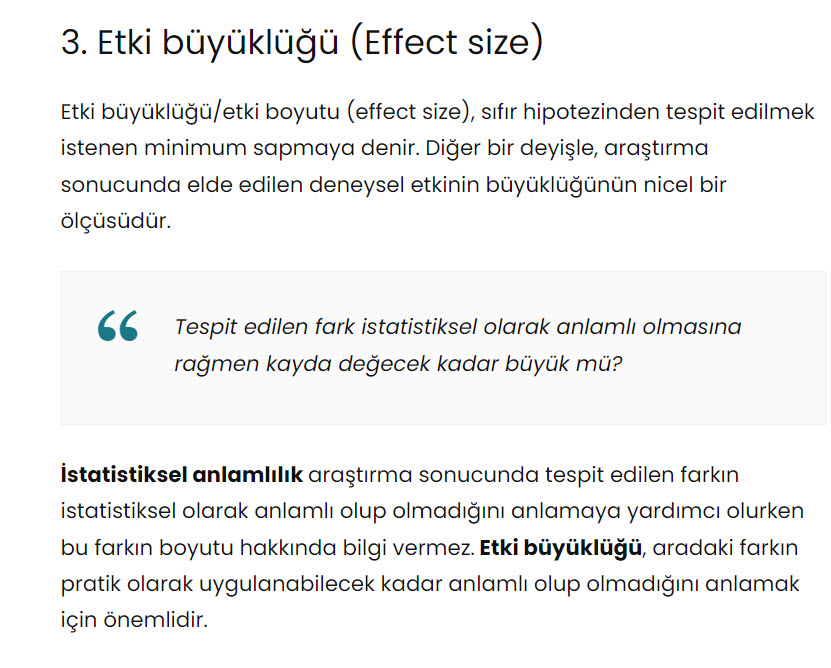

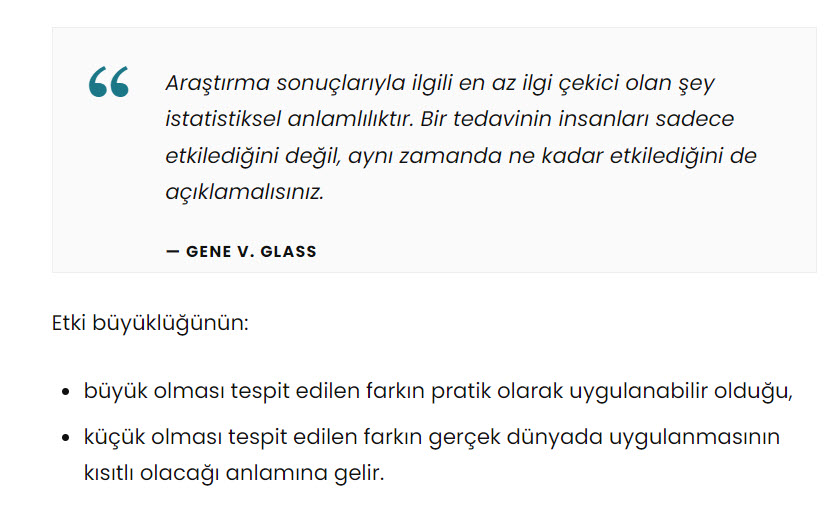

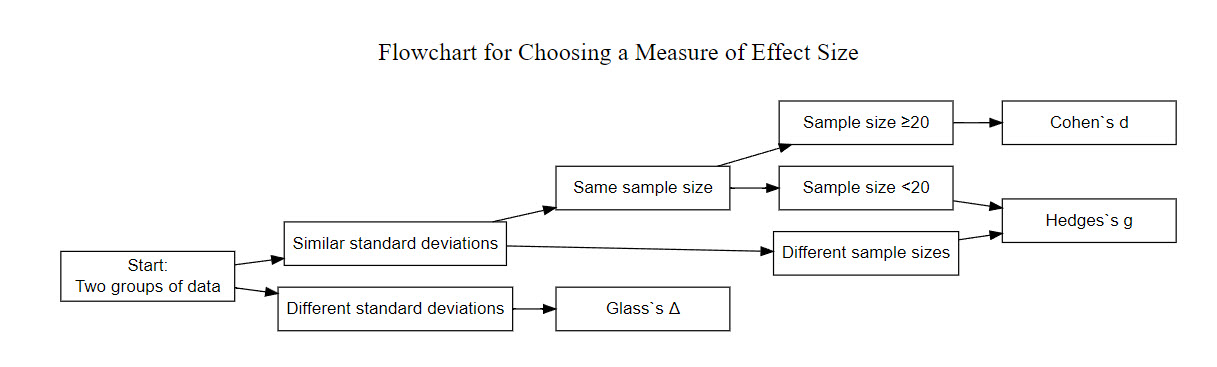

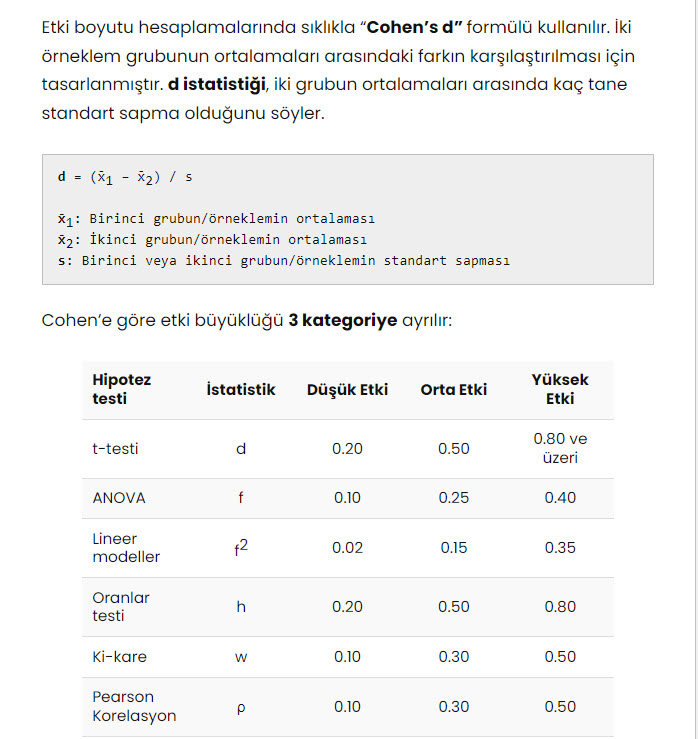

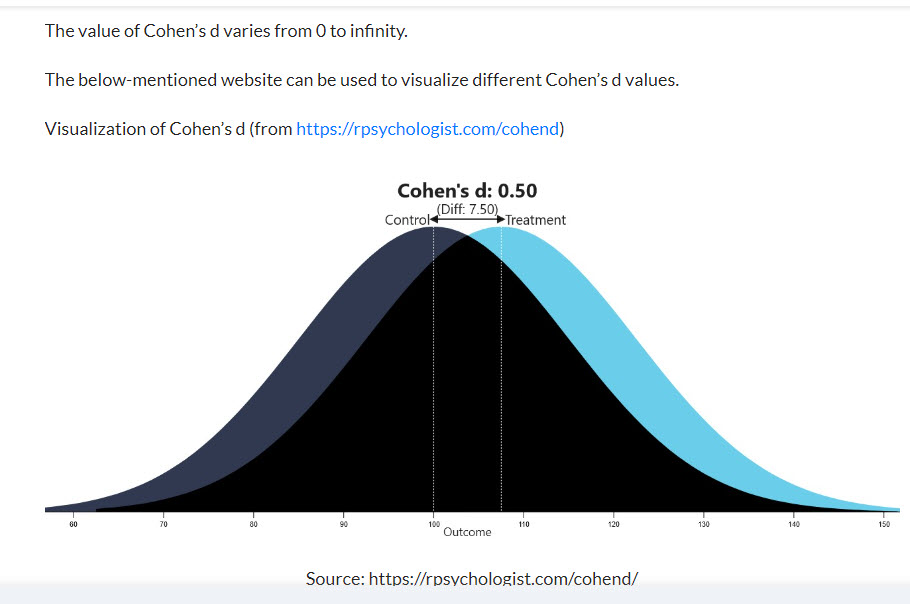

* Anova Analizinde Ho hipotezi reddedilerek AMAZON, WOCOMMERCE, B2B, EBAY, KAUFLAND ve OTHER satış ortalamalari arasinda istatistik olarak anlamlı bir farklilik olduğunu tespit etmiştik. AMAZON, WOCOMMERCE, B2B, EBAY, KAUFLAND ve OTHER dağılımlarının varyansları homojenlik varsayımını sağlamadığından Effect Size metodu olarak sadece Glass's delta istatistiğini kullanacağız.

In [213]:
variances = dff_outlier_detected.groupby('Marketplace').var(ddof=1)
variances

Quantity   Total  Day_of_Week  Month_of_Year
Marketplace                                              
AMAZON         0.2337 48.3647       3.4394        12.8366
B2B            0.7716 44.3229       3.5542        16.6747
EBAY           0.7001 49.2587       3.5854        12.3208
Kaufland       0.0000 71.8125       3.9647        21.8507
WOCOMMERCE     0.3192 29.9785       4.4257         6.4443
other          1.7878 46.8396       1.1439         1.6024

In [214]:
dff_outlier_detected.groupby('Marketplace').mean().diff()['Total']

Marketplace
AMAZON           NaN
B2B          -5.8717
EBAY          3.7127
Kaufland      0.2372
WOCOMMERCE   -4.3922
other         0.4786
Name: Total, dtype: float64

#### Glass’s Δ(delta)

In [215]:
# Variances
variances = dff_outlier_detected.groupby('Marketplace').var(ddof=1)
# Difference of the means
diff_mean = abs(dff_outlier_detected.groupby('Marketplace').mean().diff()['Total'][-1])
# Glass's delta
glasss_delta = diff_mean / np.sqrt(variances['Total'].to_list()[0])

print(f"Glass's delta = {glasss_delta:.3f}")

Glass's delta = 0.069


* AMAZON, WOCOMMERCE, B2B, EBAY, KAUFLAND ve OTHER Marketplacelerinin Anova testi sonucunda ortalamaları ve medyanları arasında anlamlı bir fark olduğunu bilimsel olarak tespit etmiştik. Varsayımlarımızdan birisi olan varyans homojenliği olmadığı için Effect Size metodlarından Glass's delta metodunu kullandık. Glass's delta: 0.069 sonucu bize, AMAZON, WOCOMMERCE, B2B, EBAY, KAUFLAND ve OTHER Marketplacelerinin satış ortalamalarının ve medyanlarının düşük derecede farklı olduğunu göstermektedir.

* Kaynakça: 
  * 1- https://ravenfo.com/
  * 2- https://rowannicholls